# Deterministic annealing in Python

## TOC:
* [Introduction Simullated annealing](#simu-annel)
* [Deterministic annealing](#det-annel)
    * [Deterministic annealing trial 1](#det-annel-trial-1)
    * [Deterministic annealing trial 2 2D](#det-2)
    * [Deterministic annealing trial 3 2D](#det-annel-trial-3)
    * [Deterministic annealing trial 3 3D](#det-annel-trial-4)
    * [DA analyzing convergence  (not working)](#det-annel-trial-5)
        * [DA analyzing convergence 2 (working)](#det-annel-trial-6)
        * [DA analyzing convergence 2 (3D)](#det-annel-trial-7)
    * [DA Generating 2D N cluster data](#det-annel-trial-8)
        * [DA Last test for more clusters (working)](#det-annel-trial-9)
    * [DA testing fase transition](#det-annel-trial-10)
        * [DA Free energy](#det-annel-trial-11)
        * [DA Covariance matrix](#det-annel-trial-12)
    


Based on https://perso.crans.org/besson/publis/notebooks/Simulated_annealing_in_Python.html

For a real-world use of simulated annealing, this Python module seems useful:            
    https://github.com/perrygeo/simanneal

$   $ 

### Introduction Simullated annealing <a class="anchor" id="simu-annel"></a>                         
-----------------------------------                        
* Introduction Simullated annealing              

In [1]:
from __future__ import print_function, division  # Python 2 compatibility if needed

In [2]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl

from scipy import optimize       # to compare

import seaborn as sns
sns.set(context="talk", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.05)

FIGSIZE = (10, 7)  #: Figure size, in inches!
mpl.rcParams['figure.figsize'] = FIGSIZE

In [3]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

Algorithm
<ol>
<li>The following pseudocode presents the simulated annealing heuristic.</li>
<li>It starts from a state s0 and continues to either a maximum of kmax steps or until a state with an energy of emin or less is found. </li>
<li>In the process, the call neighbour(s)  should generate a randomly chosen neighbour of a given state s.</li>
<li>The annealing schedule is defined by the call temperature(r) , which should yield the temperature to use, given the fraction r of the time budget that has been expended so far. </li>
</ol>             

<b>Simulated Annealing: </b>

 
- Let $s=s_0$ 
    * For $k=0$ through $k_{max}$ (exclusive) 
        * T:=temperature($1- (k∕k_{max})$) 
        * Pick a random neighbour, $s_{new}$:=neighbour(s)
        * If $P(E(s),E(s_{new}),T)\geq random(0,1)$:
            * $s:=s_{new}$ 
- Output: the final state s

## Basic but generic Python code

In [26]:
def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = random_start()  # starting with a uniform randow gess through the interval
    cost = cost_function(state)  # the function that we whant to minimize
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)  # fraction will increase
        T = temperature(fraction)   # T decreases because temperature(fraction) is max(0.01, min(1, 1 - fraction)). Therefore 1 - fraction , fraction increases and "1 - fraction"  decreases.
        new_state = random_neighbour(state, fraction) 
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

### Basic example              

We will use this to find the global minimum of the function $x\rightarrow x^2$ on $[−10,10]$.

In [4]:
interval = (-10, 10)

def f(x):
    """ Function to minimize."""
    return x ** 2

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

In [5]:
def random_start():
    """ Random point in the interval."""
    a, b = interval
    return a + (b - a) * rn.random_sample()

In [6]:
def cost_function(x):
    """ Cost of x = f(x)."""
    return f(x)

In [7]:
def random_neighbour(x, fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample() # (b - a) * random_sample() + a
    return clip(x + delta) # Force x to be in the interval.

In [25]:
def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p

In [27]:
def acceptance_probability_for_DA(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost)**2 / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p

In [12]:
def temperature(fraction):
    """ Example of temperature dicreasing as the process goes on."""
    return max(0.01, min(1, 1 - fraction))

In [17]:
annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=30, debug=True);

Step # 0/30 : T =    1, state = 3.61, cost =   13, new_state = 3.61, new_cost =   13 ...
Step # 1/30 : T = 0.967, state = 3.61, cost =   13, new_state =  3.6, new_cost = 12.9 ...
Step # 2/30 : T = 0.933, state =  3.6, cost = 12.9, new_state = 3.64, new_cost = 13.2 ...
Step # 3/30 : T =  0.9, state = 3.64, cost = 13.2, new_state = 3.65, new_cost = 13.3 ...
Step # 4/30 : T = 0.867, state = 3.65, cost = 13.3, new_state = 3.65, new_cost = 13.3 ...
Step # 5/30 : T = 0.833, state = 3.65, cost = 13.3, new_state = 3.53, new_cost = 12.5 ...
Step # 6/30 : T =  0.8, state = 3.53, cost = 12.5, new_state = 3.34, new_cost = 11.2 ...
Step # 7/30 : T = 0.767, state = 3.34, cost = 11.2, new_state = 3.52, new_cost = 12.4 ...
Step # 8/30 : T = 0.733, state = 3.34, cost = 11.2, new_state =  3.6, new_cost = 12.9 ...
Step # 9/30 : T =  0.7, state = 3.34, cost = 11.2, new_state = 3.55, new_cost = 12.6 ...
Step #10/30 : T = 0.667, state = 3.34, cost = 11.2, new_state = 3.32, new_cost =   11 ...
Step #11/30 : 

Now with more steps:

In [18]:
state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)
print("state",state)
print("c",c)

state -0.16232884050651697
c 0.026350652460190225


#### Visualizing the steps

In [19]:
def see_annealing(states, costs):
    plt.figure(figsize=(10,5)) 
    #plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing \n")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.grid()
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.grid()
    plt.title("Costs")
    plt.show()

##### Antonio's code to visualize function

In [20]:
def visualize_cost_function(cost_function,):
    plt.figure(figsize=(5,4))
    xpts = np.linspace(interval[0], interval[1], 1000)
    #test = lambda x: np.array(x)*.5 + .5
    #print (xpts, test(xpts))
    plt.xlabel('range')
    plt.ylabel('Cost function')
    plt.grid()
    plt.plot(xpts, cost_function(xpts))
    plt.show() 

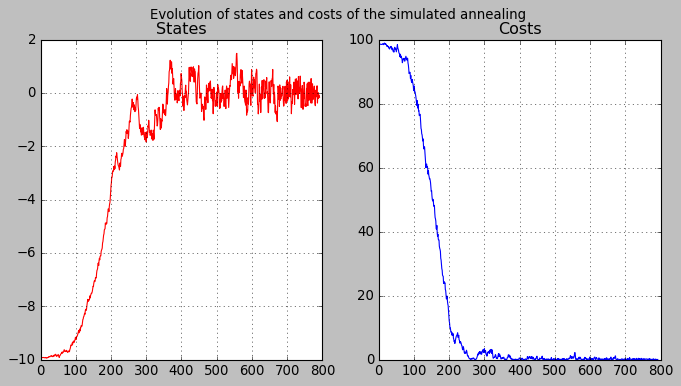

In [21]:
see_annealing(states, costs)

#### More visualizations

In [22]:
def visualize_annealing(cost_function):
    state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)
    see_annealing(states, costs)
    return state, c

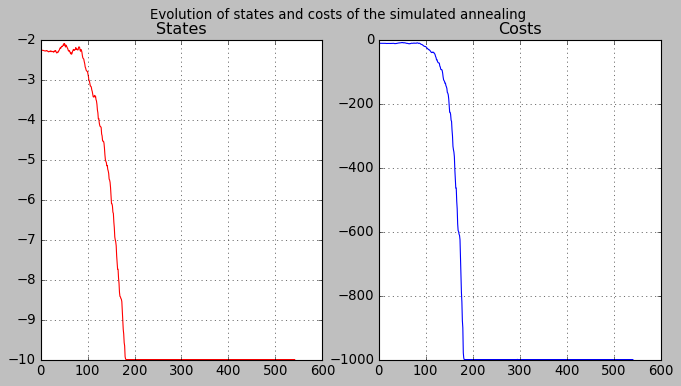

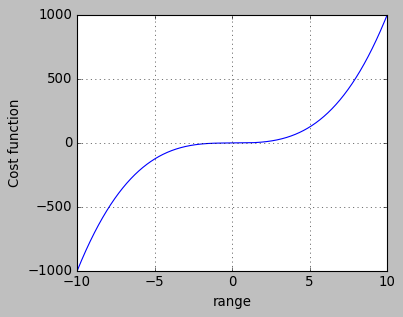

In [23]:
visualize_annealing(lambda x: x**3)
visualize_cost_function(lambda x: x**3,)

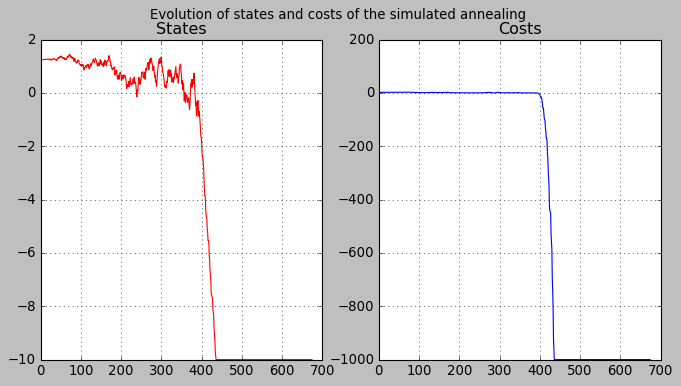

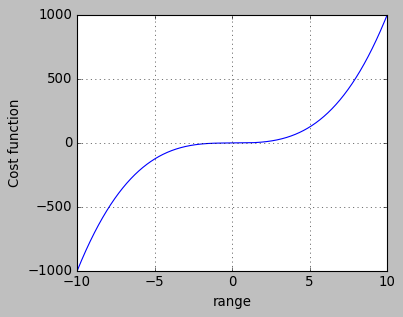

In [101]:
visualize_annealing(lambda x: x**3)
visualize_cost_function(lambda x: x**3,)

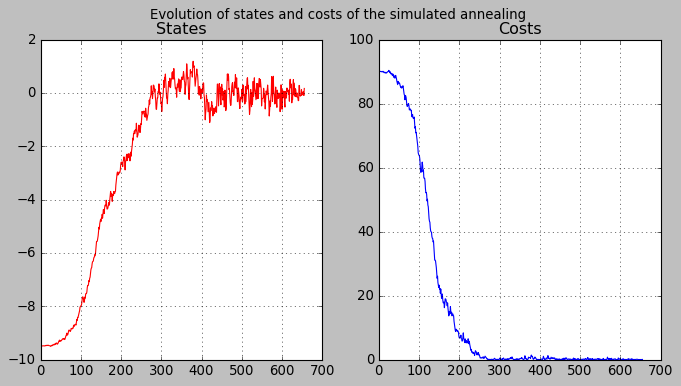

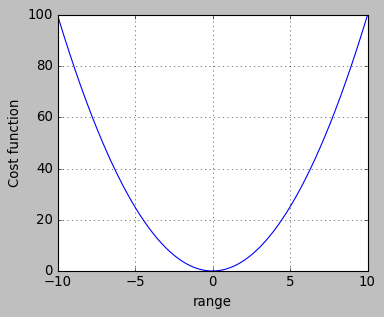

In [102]:
visualize_annealing(lambda x: x**2)

## Deterministic Annealing <a class="anchor" id="det-annel"></a>                         
-----------------------------------                        
* Introduction Deterministic annealing    



<div class="alert alert-block alert-success">
<b>Deterministic Annealing 1D</b> 
</div>

Fist example let's start with a simple example:            
                      
#### $\   \ $ <font color='green'>*A deterministic annealing approach to clustering*</font>                       
Autors: Kenneth ROSE, Eitan GUREWITZ* and Geoffrey FOX. *Pattern Recognition Letters 11 (1990)589-594* (**1990**).          



*Deterministic Annealing for Vertex Finding at CMS*            
E. Chabanat, N. Estre, IPNL-Université Claude Bernard Lyon 1, Villeurbanne, France (10.5170/CERN-2005-002.287)
<img src="files/daCMS35.png" width="400">

For each point in the data there exists a cost (or
energy) for associating it with a given cluster ($C_j$). We
therefore define a Gibbs distribution for all possible associations as follows

\begin{equation*} 
Pr(x \in C_j)= \frac{\exp(-\beta E_x(j))}{Z_x}= \frac{\exp(-E_x(j)/T)}{Z_x},
\label{eq:Pr1} \tag{1}
\end{equation*}
\begin{equation*}
Z_x= \sum_{k=1}^c \exp(-\beta E_x(k)).
\label{eq:Z_x} \tag{2}
\end{equation*}
or
\begin{equation*}
F= -\frac{1}{\beta} \sum_{x} \log Z_x.
\label{eq:F} \tag{3}
\end{equation*}
 


Using a squared distance cost 
\begin{equation*}
E_x= |x-y_j|^2. 
\label{eq:E_x}   \tag{4}
\end{equation*}

With this, applying $\eqref{eq:E_x}$ in $\eqref{eq:Pr1}$  we have
\begin{equation*}
Pr(x \in C_j)= \frac{\exp(-\beta |x-y_j|^2)}{\sum_{k=1}^c \exp(-\beta |x-y_j|^2)}. 
\label{eq:Pr2}   \tag{5}
\end{equation*}

Substituting $\eqref{eq:Z_x},\eqref{eq:E_x}$ in $\eqref{eq:F}$ gives 
\begin{equation*}
F=  -\frac{1}{\beta} \sum_{x} \log \left(\sum_{k=1}^c \exp(-\beta |x-y_j|^2) \right). 
\label{eq:F2}   \tag{6}
\end{equation*}

Calculating $\partial F/ \partial y_j =0$ we can obtain a rule for $y_j$
\begin{equation*}
y_j= \frac{\sum_{x} x \frac{\exp(-\beta |x-y_j|^2)}{\sum_{k=1}^c \exp(-\beta |x-y_k|^2)} }{\sum_{x} \frac{\exp(-\beta |x-y_j|^2)}{\sum_{k=1}^c \exp(-\beta |x-y_k|^2)}  } .
\label{eq:yj1}   \tag{7}
\end{equation*}
or
\begin{equation*}
y^{(n+1)}=f(y^{(n)})
\label{eq:f1}   \tag{8}
\end{equation*}

which gives
\begin{equation*}
y^{(n+1)}= \frac{\sum_{x} x \frac{\exp(-\beta |x-y_j|^2)}{\sum_{k=1}^c \exp(-\beta |x-y_k|^2)} }{\sum_{x} \frac{\exp(-\beta |x-y_j|^2)}{\sum_{k=1}^c \exp(-\beta |x-y_k|^2)}  } 
\label{eq:y_j+1}   \tag{9}
\end{equation*}

Including uncertanties

\begin{equation*}
E_x= \frac{|x-y_j|^2}{\sigma^2}. 
\label{eq:E_xsig}   \tag{9}
\end{equation*}




In [4]:
# Def helpful functions

def create_1Dlist(dimensao):
    return [0 for i in range(dimensao)]

def create_2Dlist(dim_x,dim_y):
    return [[0 for i in range(dim_x)] for i in range(dim_y)]

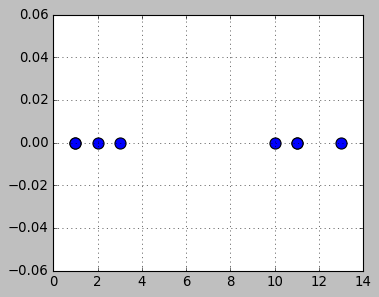

In [5]:
# Data clusters for first example
x = [1,1,2,3,10,11,11,13]   #,67,71
z = [0.0 for i in range(len(x))]
plt.figure(figsize=(5,4))
plt.grid()
plt.scatter(x,z,s=100,label='Data')
plt.show()

In [6]:
def dot_help(x):
    return np.dot(x,x)
 
def sum_k(x,y,x_index,beta):
    return sum([np.exp(-1.*beta*dot_help(x[x_index]-y[k])) for k in range(len(y))])

def sum_x_denominator(x,y,x_samples,j,beta):
    return sum([ np.exp(-1.*beta*dot_help(x[i]-y[j]))/sum_k(x,y,i,beta) for i in range(x_samples)])

def sum_x_numerator(x,y,x_samples,j,beta):
    return sum([x[i]*np.exp(-1.*beta*dot_help(x[i]-y[j]))/sum_k(x,y,i,beta) for i in range(x_samples)])

def y_plus_1(x,y,beta,x_samples,n_y_centroids):
    return  [ sum_x_numerator(x,y,len(x)-1,j,beta)/sum_x_denominator(x,y,len(x)-1,j,beta) for j in range(n_y_centroids)]

In [7]:

"""beta=0.2
outro = sum_k(x,y,i,beta)
j=0
outro2 = sum_x_denominator(x,y,len(x)-1,j,beta)
outro3 = sum_x_numerator(x,y,len(x)-1,0,beta)
outro4 = sum_x_numerator(x,y,len(x)-1,1,beta)"""

y =  [-8,15]    # fist cluster
y0 =  [-8,15]  
x_samples = len(x)
n_y_centroids = len(y)
beta=0.2
#y  = y_plus_1(x,y,beta,x_samples,n_y_centroids)

for beta in range(1,30):
    y  = y_plus_1(x,y,beta,x_samples,n_y_centroids)
    #print("beta",beta,"y",y)

In [8]:
print("==================")
print("beta",beta) 
print("y_plus_1(beta,x_samples,n_y_centroids)",y)

print(x)

beta 29
y_plus_1(beta,x_samples,n_y_centroids) [1.75, 10.666666666666666]
[1, 1, 2, 3, 10, 11, 11, 13]


In [9]:
sum(x)/len(x)

6.5

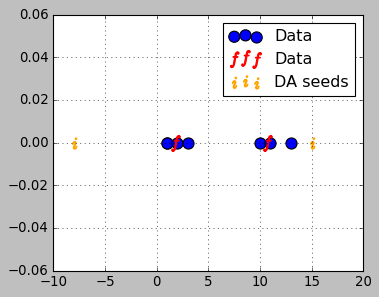

In [10]:
# Data
x = [1,1,2,3,10,11,13]   #,67,71
z = [0.0 for i in range(len(x))]
plt.figure(figsize=(5,4))
plt.scatter(x,z,s=100,label='Data')
plt.scatter(y,[0 for i in range(len(y))],s=200,marker=r'$f$',color='red',label='Data')
plt.scatter(y0,[0 for i in range(len(y0))],s=100,marker=r'$i$',color='orange',label='DA seeds')
plt.legend()
plt.grid()
plt.show()



In [11]:
beta=2.#0.0001
y =[5.0,30.,50.]
y0 =[5.0,30.,50.]
n_y_centroids=len(y)
a = np.array([10,11,9,23,21,11,45,20,11,12]).reshape(-1, 1)
x_samples=len(a)
y  = y_plus_1(a,y,beta,x_samples,n_y_centroids)
print(y)

[array([10.4]), array([21.33333333]), array([45.])]


/home/antonio/anaconda3/envs/MLBase/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


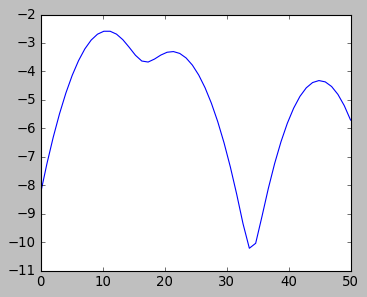

In [12]:
# Data based on 
#https://stackoverflow.com/questions/35094454/how-would-one-use-kernel-density-estimation-as-a-1d-clustering-method-in-scikit/35151947#35151947
from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot

a = array([10,11,9,23,21,11,45,20,11,12]).reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(a)
s = linspace(0,50)
e = kde.score_samples(s.reshape(-1,1))
plt.figure(figsize=(5,4))
plot(s, e)

In [13]:
from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print ("Minima:", s[mi])
print ("Maxima:", s[ma])

Minima: [17.34693878 33.67346939]
Maxima: [10.20408163 21.42857143 44.89795918]


In [14]:
print (a[a < mi[0]], a[(a >= mi[0]) * (a <= mi[1])], a[a >= mi[1]])

[10 11  9 11 11 12] [23 21 20] [45]


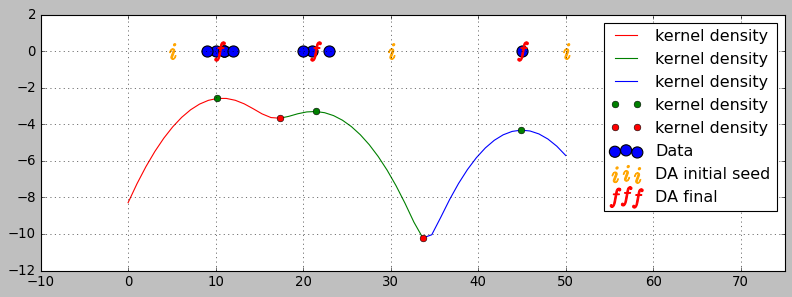

In [15]:
plt.figure(figsize=(12,4))
plot(s[:mi[0]+1], e[:mi[0]+1], 'r',
     s[mi[0]:mi[1]+1], e[mi[0]:mi[1]+1], 'g',
     s[mi[1]:], e[mi[1]:], 'b',
     s[ma], e[ma], 'go',
     s[mi], e[mi], 'ro',label='kernel density')
plt.grid() 
plt.scatter(a,[0 for i in range(len(a))],s=100,label='Data')
plt.scatter(y0,[0 for i in range(len(y))],s=200,marker=r'$i$',color='orange',label='DA initial seed')
plt.scatter(y,[0 for i in range(len(y))],s=300,marker=r'$f$',color='red',label='DA final')
plt.xlim(-10.,75)
plt.legend(loc="best")
plt.show()


Other example

In [16]:
x = [916,684,613,612,593,552,487,484,475,474,438,431,421,418,409,391,389,388,380,374,371,369,357,356,340,338,328,317,316,315,313,303,283,257,255,254,245,234,232,227,227,222,221,221,219,214,201,200,194,169,155,140]
x = sorted(x)
print(x)


[140, 155, 169, 194, 200, 201, 214, 219, 221, 221, 222, 227, 227, 232, 234, 245, 254, 255, 257, 283, 303, 313, 315, 316, 317, 328, 338, 340, 356, 357, 369, 371, 374, 380, 388, 389, 391, 409, 418, 421, 431, 438, 474, 475, 484, 487, 552, 593, 612, 613, 684, 916]


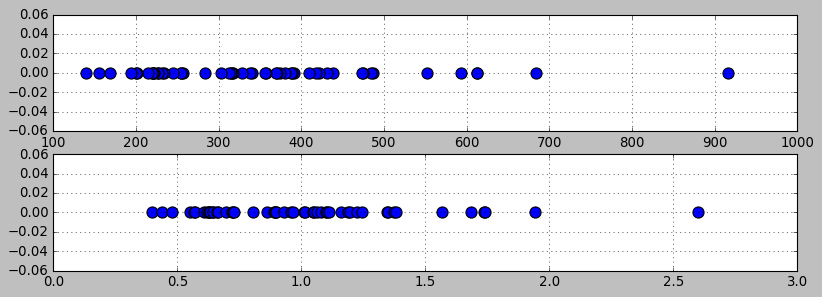

In [17]:
x = [916,684,613,612,593,552,487,484,475,474,438,431,421,418,409,391,389,388,380,374,371,369,357,356,340,338,328,317,316,315,313,303,283,257,255,254,245,234,232,227,227,222,221,221,219,214,201,200,194,169,155,140]
#plt.figure(figsize=(12,4))
ig, axs = plt.subplots(2,figsize=(12,4))

axs[0].scatter(x,[0.0 for i in range(len(x))],s=100)
plt.grid()

xcopy = np.copy(x)
mean_x = 1.*sum(x)/len(x)
x = [x[i]/mean_x for i in range(len(x))]
x = sorted(x)
axs[1].scatter(x,[0.0 for i in range(len(x))],s=100)
axs[0].grid()
axs[1].grid()
plt.grid()
plt.show()

In [18]:
np.arange(3,7,2)

array([3, 5])

In [19]:
def mean_point_seed(x,N):
    step = 1*(max(x)-min(x))/N
    return [step*i for i in range(1,N+1)]

print("aqui",mean_point_seed(x,4))

beta=1.#0.0001
y =mean_point_seed(x,5)
y0 =mean_point_seed(x,5)
n_y_centroids=len(y)
x_samples=len(x)

outro =sum_k(x,y,2,beta)

y  = y_plus_1(x,y,beta,x_samples,n_y_centroids)

#for i in range(9):
#    y  = y_plus_1(x,y,beta,x_samples,n_y_centroids)


print(y)

aqui [0.5505949132190808, 1.1011898264381617, 1.6517847396572425, 2.2023796528763233]
[0.8202763639786254, 0.9003518066773414, 0.9996040250234981, 1.1186321252565752, 1.252507424159374]


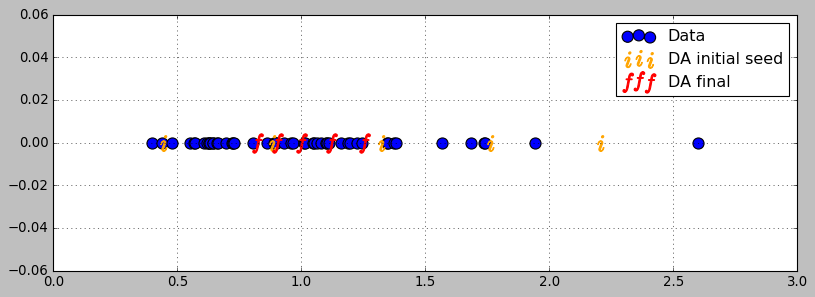

In [20]:
plt.figure(figsize=(12,4))
plt.scatter(x,[0.0 for i in range(len(x))],s=100,label="Data")
plt.scatter(y0,[0 for i in range(len(y))],s=200,marker=r'$i$',color='orange',label='DA initial seed')
plt.scatter(y,[0 for i in range(len(y))],s=300,marker=r'$f$',color='red',label='DA final')
plt.grid()
plt.legend()
plt.show()
#plt.plot(x,[0.0 for i in range(len(x))])

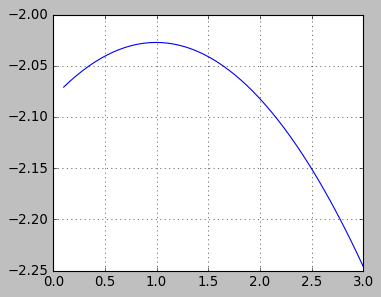

In [21]:
# Data based on 
#https://stackoverflow.com/questions/35094454/how-would-one-use-kernel-density-estimation-as-a-1d-clustering-method-in-scikit/35151947#35151947
from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot

a = array(x).reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(a)
s = linspace(0.1,3)
e = kde.score_samples(s.reshape(-1,1))
plt.figure(figsize=(5,4))
plot(s, e)
plt.grid()
plt.show()

In [22]:
#from scipy.signal import argrelextrema
#mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
#mi, ma = e.index(min(e)),e.index(max(e))  #min(e),max(e)
#print(mi, ma)
def max_min_index(x):
    xmin,xmax= min(e),max(e)
    for i in range(len(e)):
        if xmin == e[i]:
            index_min=i
        if xmax == e[i]:
            index_max=i
    return [index_min],[index_max]


mi, ma = max_min_index(e)# min(e),max(e)

print (mi, ma)
print ("Minima:", s[mi])
print ("Maxima:", s[ma])

[49] [15]
Minima: [3.]
Maxima: [0.9877551]


In [23]:
mi = [mi, ma]
print (a[a < mi[0]], a[(a >= mi[0]) * (a <= mi[1])], a[a >= mi[1]])

[0.39733654 0.43990831 0.47964196 0.55059491 0.56762362 0.57046174
 0.60735728 0.62154787 0.6272241  0.6272241  0.63006222 0.64425281
 0.64425281 0.6584434  0.66411964 0.69533894 0.720882   0.72372012
 0.72939635 0.80318742 0.85994979 0.88833097 0.8940072  0.89684532
 0.89968344 0.93090274 0.95928392 0.96496016 1.01037005 1.01320817
 1.04726558 1.05294182 1.06145617 1.07848488 1.10118983 1.10402794
 1.10970418 1.16079031 1.18633337 1.19484772 1.22322891 1.24309573
 1.34526798 1.3481061  1.37364916 1.38216352 1.5666412  1.68300404
 1.73692828 1.7397664  1.94127279 2.59971619] [] []


In [24]:
s[mi[0]],s[mi[1]],e[mi[0]],e[mi[1]]

(array([3.]), array([0.9877551]), array([-2.24622401]), array([-2.02722711]))

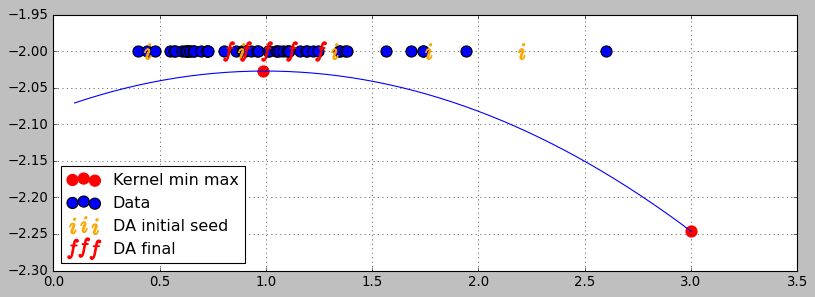

In [25]:
plt.figure(figsize=(12,4))
plot(s, e)
plt.grid() 
y_axis = -2.

#plt.scatter([s[mi],s[ma]],[e[mi],e[ma]],s=100,color='red',label='Kernel min max')
plt.scatter([s[mi[0]],s[mi[1]]],[e[mi[0]],e[mi[1]]],s=100,color='red',label='Kernel min max')
plt.scatter(x,[y_axis for i in range(len(x))],s=100,label='Data')
plt.scatter(y0,[y_axis for i in range(len(y))],s=200,marker=r'$i$',color='orange',label='DA initial seed')
plt.scatter(y,[y_axis for i in range(len(y))],s=300,marker=r'$f$',color='red',label='DA final')
plt.xlim(0.,3.5)
plt.legend(loc="best")


---------------------------------------

---------------------------------------

---------------------------------------

---------------------------------------

## Deterministic Annealing 2D <a class="anchor" id="det-annel-trial-1"></a>       

### DA in 2D




*Deterministic Annealing for Vertex Finding at CMS*            
E. Chabanat, N. Estre, IPNL-Université Claude Bernard Lyon 1, Villeurbanne, France (10.5170/CERN-2005-002.287)
<img src="files/daCMS35.png" width="400">

In [26]:
# from https://github.com/niruhan/k-means-clustering
dataPoints = [[6,1],[5,2],[5,3],[6,3],[7,2],[2,4],[1,5],[1,6],[2,6],[3,5],[3,6]]
x_dataPoints = [dataPoints[i][0] for i in range(len(dataPoints))];y_dataPoints = [dataPoints[i][1] for i in range(len(dataPoints))]

In [8]:
def mean_point_seed_2D(x):
    x_mean = 1*(max(x[:][0])-min(x[:][0]))/len(x[:][0])   
    y_mean =  1*(max(x[:][1])-min(x[:][1]))/len(x[:][1])   
    return [x_mean*i for i in range(1,len(x[:][0])+1)],[y_mean*i for i in range(1,len(x[:][1])+1)]      #x_mean , y_mean

def mean_point_seed_3D(x):
    x_mean = 1*(max(x[:][0])-min(x[:][0]))/len(x[:][0])   
    y_mean =  1*(max(x[:][1])-min(x[:][1]))/len(x[:][1])   
    z_mean =  1*(max(x[:][2])-min(x[:][2]))/len(x[:][2])   
    return [x_mean*i for i in range(1,len(x[:][0])+1)],[y_mean*i for i in range(1,len(x[:][1])+1)],[z_mean*i for i in range(1,len(x[:][2])+1)]      #x_mean , y_mean


def easy_2D_plot(x):
    return [ x[i][0] for i in range(len(x))],[ x[i][1] for i in range(len(x))]

    #step = 1*(max(x)-min(x))/N
    #return [step*i for i in range(1,N+1)]




In [ ]:
x_mean , y_mean = mean_point_seed_2D(dataPoints)
print(x_mean , y_mean)

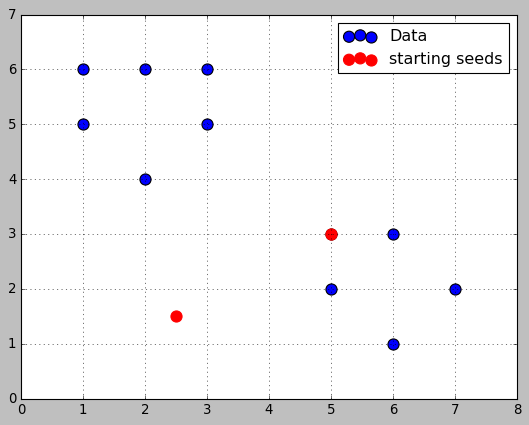

In [28]:
plt.scatter(x_dataPoints, y_dataPoints,s=100,label="Data")
plt.scatter(x_mean , y_mean,s=100,color='red',label="starting seeds")
plt.legend()
plt.grid() 
plt.show()

In [29]:
dataPoints = [[6,1],[5,2],[5,3],[6,3],[7,2],[2,4],[1,5],[1,6],[2,6],[3,5],[3,6]] 
print(dataPoints[0],dataPoints[1])
print(dataPoints[0][0],dataPoints[0][1],dataPoints[1][0],dataPoints[1][1])


[6, 1] [5, 2]
6 1 5 2


In [30]:
def create_2Dlist(dim_x,dim_y):
    return [[0 for i in range(dim_x)] for i in range(dim_y)]


def dot_help(x):
    return np.dot(x,x)

"""def sub_x_yk(x,y,x_index,k): 
    return [ x[x_index][j]-y[k][j]  for j in range(len(x[0])) ]"""

def sub_x_yk(x,y,x_index,k): 
    return [x[x_index][j]-y[k][j]  for j in range(len(x[0]))]

def squared_modulus_2D(x,y,x_index,k): 
    return dot_help([ x[x_index][j]-y[k][j] for j in range(len(x[0]))])

def exp_2D(x,y,x_index,k,beta): 
    return np.exp(-1*beta*dot_help([x[x_index][j]-y[k][j] for j in range(len(x[0]))]))

def den_den_sum_2D(x,y,x_index,beta): 
    return sum([np.exp(-1*beta*dot_help([x[x_index][j]-y[k][j] for j in range(len(x[0]))])) for k in range(len(y))])

def den_num_sum_2D(x,y,j,beta):
    # x = data
    # y = cluster centroids
    # x_index = x x_index-th data point
    # j = y_j _index-th data point
    # beta = 1/Temperature
    #return [den_den_sum_2D(x,y,i,k,beta) for i in range(len(x))]
    return sum([exp_2D(x,y,i,j,beta)/den_den_sum_2D(x,y,i,beta) for i in range(len(x))])

def sum_x_numerator_2D(x,y,j,beta):
    #      it gives the yjth element 
    # x =  data
    # y =  cluster centroids
    # j =  y_j index   < = you need to run this function over a loop in y
    # beta = 1/Temperature
    return sum([exp_2D(x,y,i,j,beta)/den_den_sum_2D(x,y,i,beta) for i in range(len(x))])   
 




#******************#
def num_sum_2D(x,y,x_index,y_index,beta): 
    #[exp_2D(x,y,x_index,k,beta) ]
    
    #exp_2D(x,y,x_index,j,beta)/den_num_sum_2D(x,y,j,beta)
    
    #sum_x_numerator_2D(x,y,j,beta)/den_num_sum_2D(x,y,j,beta)
    
    
    #exp =>return np.exp(-1*beta*dot_help([x[x_index][j]-y[k][j] for j in range(len(x[0]))]))
    return [(x[x_index][w]*exp_2D(x,y,x_index,y_index,beta)/den_den_sum_2D(x,y,x_index,beta))/den_num_sum_2D(x,y,y_index,beta) for w in range(len(x[0]))]

def y_plus_1_2D(x,y,beta,x_samples):
    
    x1,x2 = num_sum_2D(x,y,0,y_index,beta)
    y_n=create_2Dlist(len(y[0]),len(y))
    for j in range(len(y)):
        for i in range(1,len(x)):
            #       num_sum_2D(x,y,x_index,y_index,k,beta)
            x3,x4 = num_sum_2D(x,y,i,j,beta)
            x1 += x3
            x2 += x4
        y_n[j][0] = x1;y_n[j][1] = x2;
            
    return y_n           
        
    
    a,b =num_sum_2D(x,y,x_index,y_index,k,beta)

     

#([np.exp(-1*beta*dot_help([x[x_index][j]-y[k][j] for j in range(len(x[0]))])) for k in range(len(y))])


#def squared_modulus_2D(x,k):
#    return sum([ np.dot(x[i],x[i]) for i in range(len(x))])
   
dataPoints = [[6,1],[5,2],[5,3],[6,3],[7,2],[2,4],[1,5],[1,6],[2,6],[3,5],[3,6]]    
    
teste=[[6,1],[5,3]]
teste1=[[5,2],[6,3]]
print(np.dot(teste[0],teste1[0]))
print(np.dot(teste[0],teste1[1]))



x_index = 4
k=0
beta = 1.
#def sum_k_2d(x,y,x_index,k): 

#aqui = squared_modulus_2D(dataPoints,teste,x_index,k)#sub_x_yk(dataPoints,teste,x_index,k) 
aqui = exp_2D(dataPoints,teste,x_index,k,beta)
print("exp_2D",aqui)
#aqui = den_den_sum_2D(dataPoints,teste,x_index,beta)
#aqui = den_num_sum_2D(dataPoints,teste,x_index,k,beta)
#aqui = den_num_sum_2D(dataPoints,teste,x_index,k,beta)

y_index = 0
j=0
aqui = den_num_sum_2D(dataPoints,teste,j,beta)
print("den_num_sum_2D",aqui,"j=0")
print(dot_help(aqui))
j=1
aqui = den_num_sum_2D(dataPoints,teste,j,beta) #(dataPoints,teste,y_index,k,beta) #(x,y,y_index,k,beta): 
print("den_num_sum_2D",aqui,"j=1")
print(dot_help(aqui))

#aqui = num_sum_2D(dataPoints,teste,x_index,y_index,k,beta)
#def num_sum_2D(x,y,x_index,y_index,beta): 
aqui = num_sum_2D(dataPoints,teste,x_index,y_index,beta)
print("num_sum_2D",aqui)
print(dot_help(aqui))


#def y_plus_1_2D(x,y,beta,x_samples):
aqui = y_plus_1_2D(dataPoints,teste,beta,x_samples)
print("y_plus_1_2D",aqui)


#print(dot_help(aqui))
#print(squared_modulus_2D(aqui))


#for i in range(2):
#    print(teste[0]-teste[1],dot_help(x))


32
39
exp_2D 0.1353352832366127
den_num_sum_2D 2.268941770304617 j=0
5.1480967570330485
den_num_sum_2D 8.731058229695384 j=1
76.23137781033148
num_sum_2D [2.938823276571711, 0.8396637933062031]
9.34171753670905
y_plus_1_2D [[6.298349877918759, 1.5860679654765337], [9.352876954802303, 6.098076734090412]]


In [31]:
aqui=[[6,1],[5,3],[1,5]] 

for beta in range(2):
    aqui = y_plus_1_2D(dataPoints,aqui,beta,x_samples)
print("y_plus_1_2D",aqui)

y_plus_1_2D [[3.727272821618972, 3.909090614367754], [6.8135136204110776, 9.820666562128073], [9.815108970896034, 15.819068009943123]]


In [32]:
y_x = [ aqui[i][0] for i in range(len(aqui))    ]
y_y = [ aqui[i][1] for i in range(len(aqui))    ]
print(y_x)
print(y_y)

[3.727272821618972, 6.8135136204110776, 9.815108970896034]
[3.909090614367754, 9.820666562128073, 15.819068009943123]


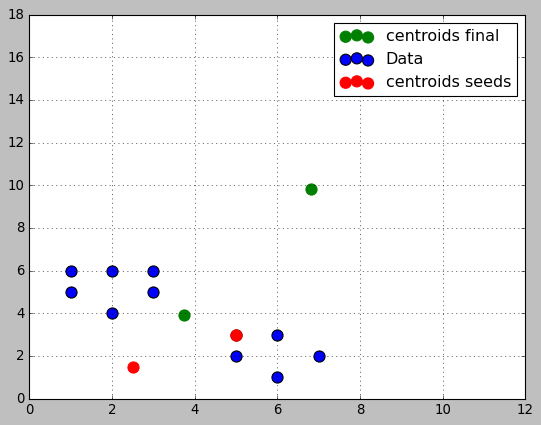

In [33]:
#plt.scatter([6.298349877918759, 1.5860679654765337], [9.352876954802303, 6.098076734090412],s=100,color='green')
plt.scatter(y_x , y_y,s=100,color='green',label="centroids final")
plt.scatter(x_dataPoints, y_dataPoints,s=100,label="Data")
plt.scatter(x_mean , y_mean,s=100,color='red',label="centroids seeds")
plt.legend()
plt.grid() 
plt.show()

In [34]:
teste1= np.array([5,1])
teste2= np.array([[1,2],[6,2]])
teste3= np.array([5,1])
print(teste1-teste2[1])
print(teste1*2)
print(teste1*teste3)
print(np.dot(teste1,teste3))


[-1 -1]
[10  2]
[25  1]
26


In [35]:
teste1= np.array([1,2])
teste2= np.array([[1,2],[6,2]])
teste1-teste2[1]

y = np.array([[1,2],[6,2]])
dataPoints = np.array([[6,1],[5,2],[5,3],[6,3],[7,2],[2,4],[1,5],[1,6],[2,6],[3,5],[3,6]] )  

def y_2D(x,y,beta):
    
    new_y = [numerador(x,y,beta,j)/den(x,y,beta,j) for j in range(len(y))]
    
    return new_y


---------------------------------------------------------------------

## Deterministic annealing v2 <a class="anchor" id="det-2"></a>

### DA in 2D v2

<div class="alert alert-block alert-success">
<b>Deterministic Annealing 2D v2</b> 
</div>

In [67]:
#def numerador_do_denominador(x,y,beta,j):
#    return sum[np.exp(-beta*np.dot(x[x_index]- y[k],x[x_index]- y[j]))/denominador_do_denominador(x,y,beta,x_index) for x_index in range(len(x))]
 
def denominador_completo(x,y,beta,j):
    #return np.exp(-beta*np.dot(x[x_index]- y[k],x[x_index]- y[j]))
    return sum([np.exp(-beta*np.dot(x[x_index]- y[j],x[x_index]- y[j]))/denominador_do_denominador(x,y,beta,x_index) for x_index in range(len(x))])
    
    
def numerador(x,y,beta,j):
    soma =0.0
    for x_index in range(len(x)):
        algo = x[x_index]*exponencial(x,y,x_index,j)/denominador_do_denominador(x,y,beta,x_index) 
        soma = soma + algo
    return soma

def y_j_2D(x,y,beta):
    return [numerador(x,y,beta,j)/denominador_completo(x,y,beta,j) for j in range(len(y))]

def exponencial(x,y,x_index,j):
    return np.exp(-beta*np.dot(x[x_index]- y[j],x[x_index]- y[j]))
    
def denominador_do_denominador(x,y,beta,x_index):
    return sum([np.exp(-beta*np.dot(x[x_index]- y[k],x[x_index]- y[k])) for k in range(len(y))])    

In [68]:
y = np.array([[1,2]]) #,[6,2],[3,2]
#dataPoints = np.array([[6,1],[5,2],[5,3],[6,3],[7,2],[2,4],[1,5],[1,6],[2,6],[3,5],[3,6]] ) 
dataPoints = np.array([[2,4],[1,5],[1,6],[2,6],[3,5],[3,6]] )
x_index = 0
beta =1.
j=0
print("denominador_do_denominador",denominador_do_denominador(dataPoints,y,beta,x_index))
print("denominador_completo",denominador_completo(dataPoints,y,beta,j))
teste = numerador(dataPoints,y,beta,0)
print("numerador 0",teste)
#teste = numerador(dataPoints,y,beta,1)
print("numerador 1",teste)
aqui = y_j_2D(dataPoints,y,beta)
print("y_j_2D",aqui)


for beta in range(5):
    y = y_j_2D(dataPoints,y,beta)
    
print("y",y)

denominador_do_denominador 0.006737946999085467
denominador_completo 6.0
numerador 0 [12. 32.]
numerador 1 [12. 32.]
y_j_2D [array([2.        , 5.33333333])]
y [array([2.        , 5.33333333])]


In [69]:

aqui=sum([denominador_do_denominador(dataPoints,y,beta,x_index) for x_index in range(len(dataPoints))])
print("denominador_do_denominador",aqui)


denominador_do_denominador 0.19950773385991116


In [70]:
"""y_x = [ aqui[i][0] for i in range(len(aqui))    ]
y_y = [ aqui[i][1] for i in range(len(aqui))    ]"""

y_x,y_y =  easy_2D_plot(y)
dataPoints_x,dataPoints_y =  easy_2D_plot(dataPoints)
 

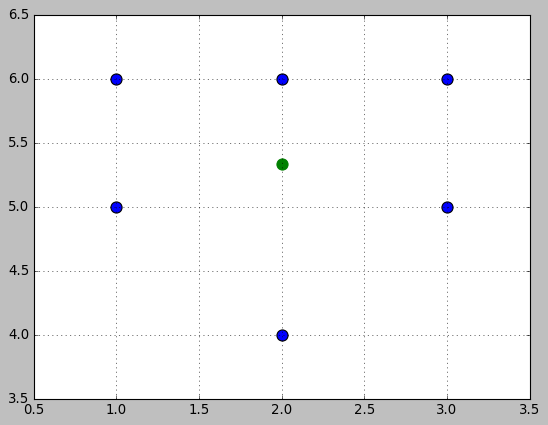

In [71]:
#plt.scatter([6.298349877918759, 1.5860679654765337], [9.352876954802303, 6.098076734090412],s=100,color='green')
plt.scatter(y_x , y_y,s=100,color='green')

plt.scatter(dataPoints_x, dataPoints_y,s=100)
#plt.scatter(x_dataPoints, y_dataPoints,s=100)
#plt.scatter(x_mean , y_mean,s=100,color='red')
plt.grid() 
plt.show()

In [41]:
dataPoints = np.array([[2,4],[1,5],[1,6],[2,6],[3,5],[3,6]] )

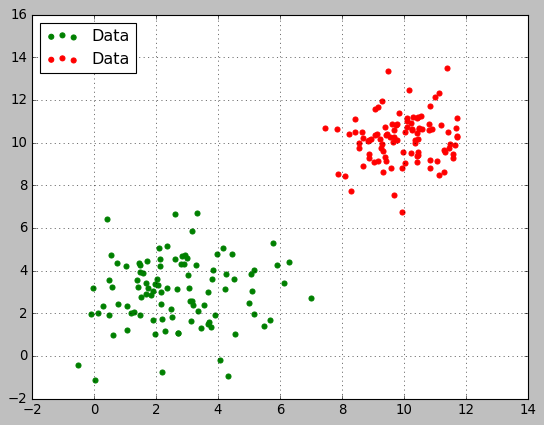

In [13]:
gauss_points = 100
gaussian1=np.random.normal(3, 1.5, size=(gauss_points, 2))
gaussian1_x,gaussian1_y =  easy_2D_plot(gaussian1)

gauss_points2 = 100
gaussian2=np.random.normal(10, 1., size=(gauss_points, 2))
gaussian2_x,gaussian2_y =  easy_2D_plot(gaussian2)
 
plt.scatter(gaussian1_x,gaussian1_y,color='green',label="Data")
plt.scatter(gaussian2_x,gaussian2_y,color='red',label="Data")
plt.legend(loc=0)
plt.grid()
plt.show()

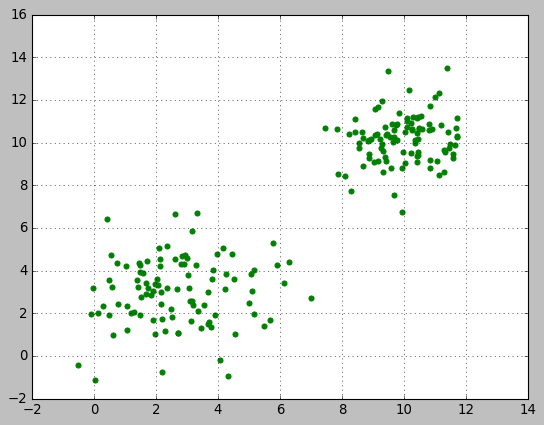

In [14]:
gaussian3 = np.concatenate([gaussian1, gaussian2], axis=0)  
gaussian3_x,gaussian3_y =  easy_2D_plot(gaussian3)
plt.scatter(gaussian3_x,gaussian3_y,color='green')
plt.grid()
plt.show()


In [75]:
y0 = np.array([[2,4],[12,8]]) 
y = np.array([[2,4],[12,8]])  
dataPoints = gaussian3

for beta in range(5):
    #print("beta",beta,"1/beta",1.*beta/30,end="")
    y = y_j_2D(gaussian3,y,beta)
    
print("y",y)


    

y0_x,y0_y = easy_2D_plot(y0)  
y_x,y_y = easy_2D_plot(y)  


y [array([6.52156663, 6.33612063]), array([6.52156663, 6.33612063])]


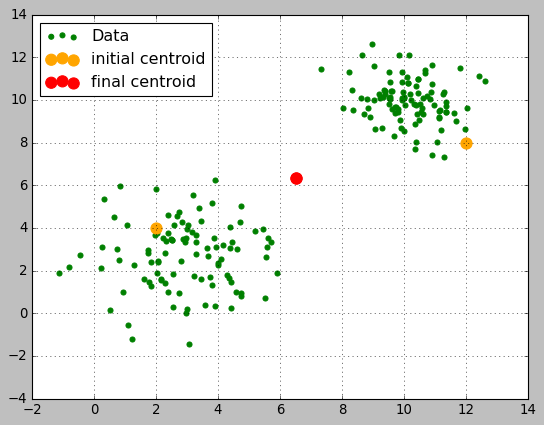

In [76]:
plt.scatter(gaussian3_x,gaussian3_y,color='green',label="Data")
plt.scatter(y0_x,y0_y,color='orange',label="initial centroid",s=100)
plt.scatter(y_x,y_y,color='red',label="final centroid",s=100)
plt.legend(loc=0)
plt.grid()
plt.show()

In [48]:
#Based on https://www.kaggle.com/timi01/k-means-clustering-and-3d-plotting
# import K-means algorithm from sklearn
from sklearn.cluster import KMeans

# set up hyperparameter (number of clusters)
k_means = KMeans(n_clusters=2)

# compute k-means clustering
k_means.fit(gaussian3)

# compute cluster centers and predict cluster index for each sample
k_means_predicted = k_means.predict(gaussian3)

#https://machinelearningmastery.com/clustering-algorithms-with-python/
# retrieve unique clusters
clusters = np.unique(k_means_predicted)

centroids = k_means.cluster_centers_

In [49]:
#centroids
centroids_x,centroids_y = easy_2D_plot(centroids)

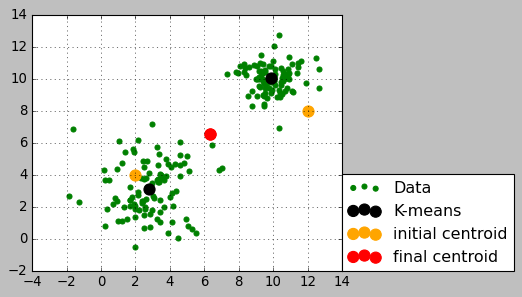

In [51]:
plt.figure('K-Means on Iris Dataset', figsize=(5,4))
plt.scatter(gaussian3_x,gaussian3_y,color='green',label="Data")
plt.scatter(centroids_x,centroids_y,color='black',label="K-means",s=100)
plt.scatter(y0_x,y0_y,color='orange',label="initial centroid",s=100)
plt.scatter(y_x,y_y,color='red',label="final centroid",s=100)
plt.legend(loc=(1,0))
plt.grid()
plt.show()


--------------------------------------------------------------------

## Deterministic annealing trial 3 <a class="anchor" id="det-annel-trial-3"></a> 

### DA in 2D v3

<div class="alert alert-block alert-success">
<b>Deterministic Annealing 2D v3</b> 
</div>

In [456]:

def distance(a,b):
    return np.linalg.norm(a-b)**2

def dot_help(a):
    return np.dot(a,a)

def squa_dist(a):
    return np.dot(a,a)
# both above fuction gives the same results
x = np.array([[2,4],[12,8],[3,2]]) 

y = np.array([[2,4],[7,5]]) 
y0= np.copy(y)
print("np.dot",np.dot(x[1]-y[0],x[1]-y[0]))
teste = x[1]-y[0]
print("dot_help",dot_help(teste))
print("squa_dist",squa_dist(teste))


print("distance",distance(x[1],y[0]))
print("distance",distance(x[1],y[0]))
for i in range(len(x)):
    for j in range(len(y)):
        print(i,j,"distance",distance(x[i],y[j]),"squa_dist",squa_dist(x[i]-y[j]))

np.dot 116
dot_help 116
squa_dist 116
distance 115.99999999999999
distance 115.99999999999999
0 0 distance 0.0 squa_dist 0
0 1 distance 25.999999999999996 squa_dist 26
1 0 distance 115.99999999999999 squa_dist 116
1 1 distance 34.0 squa_dist 34
2 0 distance 5.000000000000001 squa_dist 5
2 1 distance 25.0 squa_dist 25


In [6]:
#np.exp(-beta*squa_dist(x[i]-y[j]))
#np.exp(-beta*squa_dist(x[i]-y[j]))

def f_u(x,y,beta,i,k):
    
    denom = sum([np.exp(-beta*squa_dist(x[k]-y[j])) for j in range(len(y))])
    num   = np.exp(-beta*squa_dist(x[k]-y[i]))
    #print (num)
    return num/denom

def f_v(x,y,beta,i):
    
    denom =  sum([f_u(x,y,beta,i,k)  for k in range(len(x)) ])
    num   =  np.sum([ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ], axis=0)
    #num   =  [ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ]
    return num 
    #np.sum([[0, 1], [0, 5]], axis=0)



beta=10.
print("f_u",f_u(x,y,beta,0,0))
y1=f_v(x,y,beta,0)
print("f_v",f_v(x,y,beta,0))
y2=f_v(x,y,beta,1)
print("f_v",f_v(x,y,beta,1))


f_u 1.0
f_v [2.5 3. ]
f_v [12.  8.]


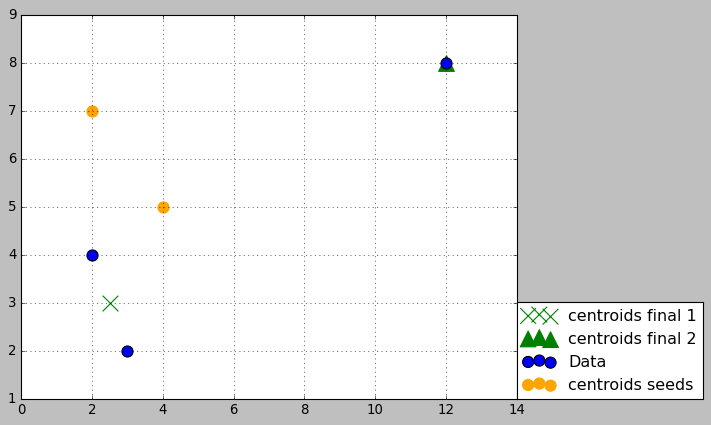

In [9]:
x_x,x_y = easy_2D_plot(x)
#y0_x,y0_y = easy_2D_plot(y0)
#y1_x,y1_y = easy_2D_plot(y1)
#y2_x,y2_y = easy_2D_plot(y2)

plt.scatter(y1[0],y1[1],s=200,color='green',label="centroids final 1",marker="x")
plt.scatter(y2[0],y2[1],s=200,color='green',label="centroids final 2",marker="^")
plt.scatter(x_x,x_y,s=100,label="Data")
plt.scatter(y0[0],y0[1],s=100,color='orange',label="centroids seeds")
plt.legend(loc=(1,0))
plt.grid() 
plt.show()

In [134]:
str(1./beta)[:4]

'1.0'

In [10]:
x = np.array([[2,4],[12,8],[3,2]]) 
y = np.array([[2,4],[7,5]]) 
y0= np.copy(y)

beta=0.
print("f_u",f_u(x,y,beta,0,0))
y1=f_v(x,y,beta,0)
print("f_v",f_v(x,y,beta,0))
y2=f_v(x,y,beta,1)
print("f_v",f_v(x,y,beta,1))
print(" ")
for beta in range(1,6):
    y1=f_v(x,y1,beta,0)
    y2=f_v(x,y2,beta,1)
    print("Temper",str(1./beta)[:4],"beta",beta,"y1",y1,"y2",y2)

f_u 0.5
f_v [5.66666667 4.66666667]
f_v [5.66666667 4.66666667]
 
Temper 1.0 beta 1 y1 [11.99806857  7.9991715 ] y2 [2.50003725 2.99992556]
Temper 0.5 beta 2 y1 [12.  8.] y2 [7.13442489 5.73097472]
Temper 0.33 beta 3 y1 [12.  8.] y2 [2.5 3. ]
Temper 0.25 beta 4 y1 [12.  8.] y2 [7.05960146 5.88079708]
Temper 0.2 beta 5 y1 [12.  8.] y2 [2.5 3. ]


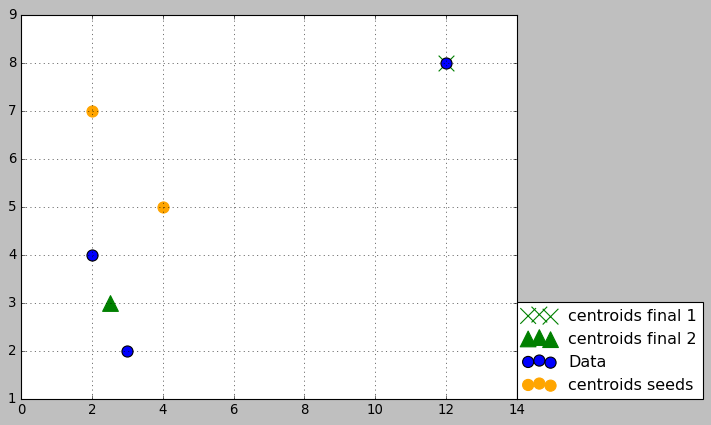

In [11]:
x_x,x_y = easy_2D_plot(x)
#y0_x,y0_y = easy_2D_plot(y0)
#y1_x,y1_y = easy_2D_plot(y1)
#y2_x,y2_y = easy_2D_plot(y2)

plt.scatter(y1[0],y1[1],s=200,color='green',label="centroids final 1",marker="x")
plt.scatter(y2[0],y2[1],s=200,color='green',label="centroids final 2",marker="^")
plt.scatter(x_x,x_y,s=100,label="Data")
plt.scatter(y0[0],y0[1],s=100,color='orange',label="centroids seeds")
plt.legend(loc=(1,0))
plt.grid() 
plt.show()

In [141]:
x = gaussian3
y = mean_point_seed_2D(x)
print (y)

([1.2449014732706085, 2.489802946541217], [0.6496032939454435, 1.299206587890887])


In [15]:

x = gaussian3
y = np.array(mean_point_seed_2D(x))
y0= np.copy(y)

beta=0.
print("f_u",f_u(x,y,beta,0,0))
y1=f_v(x,y,beta,0)
print("f_v",f_v(x,y,beta,0))
y2=f_v(x,y,beta,1)
print("f_v",f_v(x,y,beta,1))
print(" ")
for beta in range(1,3):
    y1=f_v(x,y1,beta,0)
    y2=f_v(x,y2,beta,1)
    print("Temper",str(1./beta)[:4],"beta",beta,"y1",y1,"y2",y2)



f_u 0.5
f_v [6.31723077 6.58625337]
f_v [6.31723077 6.58625337]
 
Temper 1.0 beta 1 y1 [2.82056343 3.14142074] y2 [9.7420174  9.96027086]
Temper 0.5 beta 2 y1 [1.93796383 2.29957402] y2 [10.29221023 10.52551753]


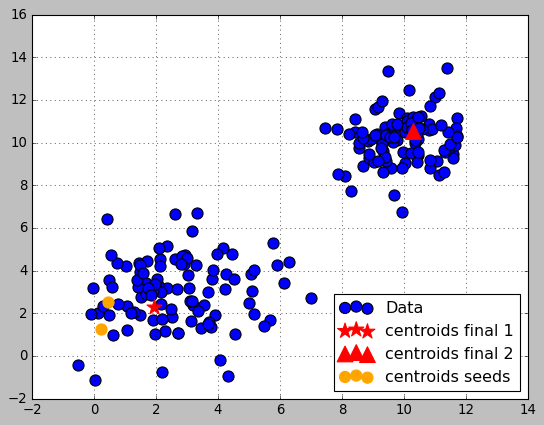

In [16]:
x_x,x_y = easy_2D_plot(x)
#y0_x,y0_y = easy_2D_plot(y0)
#y1_x,y1_y = easy_2D_plot(y1)
#y2_x,y2_y = easy_2D_plot(y2)


plt.scatter(x_x,x_y,s=100,label="Data")
plt.scatter(y1[0],y1[1],s=200,color='red',label="centroids final 1",marker="*")
plt.scatter(y2[0],y2[1],s=200,color='red',label="centroids final 2",marker="^")
plt.scatter(y0[0],y0[1],s=100,color='orange',label="centroids seeds")
plt.legend(loc=4)
plt.grid() 
plt.savefig("Deterministic-Annel_working.pdf")
plt.savefig("Deterministic-Annel_working.png")
plt.show()

## Deterministic annealing trial 1 3D<a class="anchor" id="det-annel-trial-4"></a> 

<div class="alert alert-block alert-success">
<b>Deterministic Annealing 3D v1</b> 
</div>

In [154]:
def easy_3D_plot(x):
    return [ x[i][0] for i in range(len(x))],[ x[i][1] for i in range(len(x))],[ x[i][2] for i in range(len(x))]

In [206]:
gauss_points1_3D = 100
gaussian1_3D=np.random.normal(3, 1.5, size=(gauss_points1_3D, 3))
gaussian1_x_3D,gaussian1_y_3D,gaussian1_z_3D =  easy_3D_plot(gaussian1_3D)

gauss_points2_3D = 100
gaussian2_3D=np.random.normal(10, 1., size=(gauss_points2_3D, 3))
gaussian2_x,gaussian2_y,gaussian2_z =  easy_3D_plot(gaussian2_3D)

gaussian_3D = np.concatenate([gaussian1_3D, gaussian2_3D], axis=0)  
gaussian3_x,gaussian3_y,gaussian3_z =  easy_3D_plot(gaussian_3D)

<IPython.core.display.Javascript object>


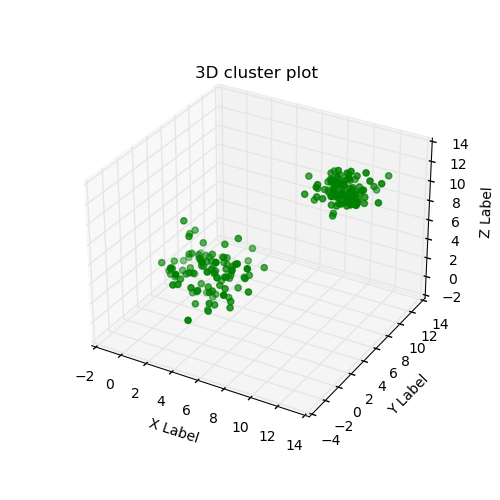

In [235]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook 
#https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph/47311878

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
# Creating figure
fig = plt.figure(figsize = (5, 5))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(gaussian3_x, gaussian3_y, gaussian3_z, color = "green")
plt.title("3D cluster plot")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
 
# show plot
plt.show()



In [205]:
print( mean_point_seed_3D(x))
print("gaussian_3D[0]",gaussian_3D[150])
#print("gaussian1_3D[0]",gaussian1_3D[0])

([0.45119219597935123, 0.9023843919587025, 1.3535765879380537], [0.35674989230162607, 0.7134997846032521, 1.0702496769048782], [1.2541776153456787, 2.5083552306913575, 3.762532846037036])
gaussian_3D[0] [10.25181686 10.50301026 10.29520422]


In [186]:
np.arange(1,3,0.2)

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8])

In [237]:
x = gaussian_3D
y = np.array([[2.0, 2.433, 1.97],[2.0, 2.433, 1.97]])#[16.32557491, 16.43322262, 11.97199832]
y0= np.copy(y)

beta=0.
print("f_u",f_u(x,y,beta,0,0))
y1=f_v(x,y,beta,0)
print("f_v 0",f_v(x,y,beta,0))
y2=f_v(x,y,beta,1)
print("f_v 1",f_v(x,y,beta,1))
print(" ")
for beta in np.arange(0.1,2.6,0.5):
    y1=f_v(x,y1,beta,0)
    y2=f_v(x,y2,beta,1)
    print("Temper",str(1./beta)[:4],"beta",beta,"y1",y1,"y2",y2)

f_u 0.5
f_v 0 [6.45611549 6.3833081  6.44907059]
f_v 1 [6.45611549 6.3833081  6.44907059]
 
Temper 10.0 beta 0.1 y1 [6.65396329 6.58992752 6.64449501] y2 [6.11358428 6.02557728 6.11070639]
Temper 1.66 beta 0.6 y1 [7.54646185 7.52226034 7.52643914] y2 [4.23949311 4.06684048 4.2563382 ]
Temper 0.90 beta 1.1 y1 [7.66057539 7.64075505 7.63772975] y2 [2.76420016 2.54447958 2.79517881]
Temper 0.62 beta 1.6 y1 [8.10558014 8.1052218  8.07638954] y2 [2.27301287 2.0285136  2.28245916]
Temper 0.47 beta 2.1 y1 [8.37327073 8.38707006 8.34404923] y2 [2.01081128 1.70269773 2.05242804]


<IPython.core.display.Javascript object>


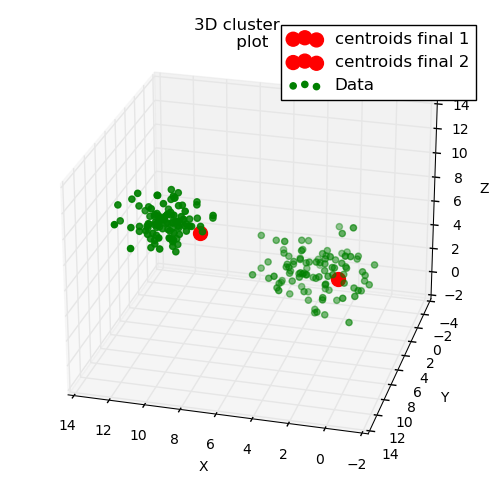

In [248]:
# Import libraries
from mpl_toolkits import mplot3d  

%matplotlib notebook 
#https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph/47311878

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
# Creating figure
fig = plt.figure(figsize = (5, 5))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(y1[0], y1[1], y1[2],s=100 ,color = "red",label="centroids final 1")
ax.scatter3D(y2[0], y2[1], y2[2],s=100,color = "red",label="centroids final 2")
ax.scatter3D(gaussian3_x, gaussian3_y, gaussian3_z, color = "green",label="Data")

plt.title("3D cluster     \n plot")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z') 

# The fix
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
ax.view_init(elev=25., azim=105)
ax.legend(loc="best")
plt.savefig("DA_3D_v1.pdf")
plt.savefig("DA_3D_v1.png") 
# show plot
plt.show()



---------------------------------------------------------

## Deterministic annealing analyzing convergence <a class="anchor" id="det-annel-trial-5"></a> 

#### DA analyzing convergence 

In [4]:
def f_u(x,y,beta,i,k):
    
    denom = sum([np.exp(-beta*squa_dist(x[k]-y[j])) for j in range(len(y))])
    num   = np.exp(-beta*squa_dist(x[k]-y[i]))
    if num < 1.e-35 and denom < 1.e-35: 
        result =0.5
    else:
        result =num/denom
        
    """print ("f_u num",num)
    print ("f_u denom",denom)
    print ("f_u num/denom",num/denom,"result",result)
    print ("           ")"""
    return result

def f_v(x,y,beta,i):
    
    denom =  sum([f_u(x,y,beta,i,k)  for k in range(len(x)) ])
    num   =  np.sum([ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ], axis=0)
    #num   =  [ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ]
    #print ("f_V num",num)
    #print ("f_V denom",denom)
    return num 
    #np.sum([[0, 1], [0, 5]], axis=0)



beta=10.
print("f_u",f_u(x,y,beta,0,0))
y1=f_v(x,y,beta,0)
print("f_v 0",f_v(x,y,beta,0))
y2=f_v(x,y,beta,1)
print("f_v 1",f_v(x,y,beta,1))


NameError: name 'x' is not defined

In [309]:
1.8614690123069782e-22/3.7229380246139564e-22

0.5

In [294]:
gauss_points = 100
gaussian1=np.random.normal(3, 1.5, size=(gauss_points, 2))
gaussian1_x,gaussian1_y =  easy_2D_plot(gaussian1)

gauss_points2 = 100
gaussian2=np.random.normal(10, 1., size=(gauss_points, 2))
gaussian2_x,gaussian2_y =  easy_2D_plot(gaussian2)

#**********************************#

In [274]:
%matplotlib inline

In [ ]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

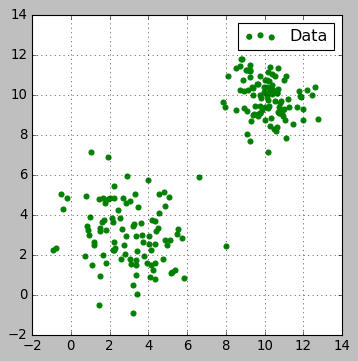

In [295]:

fig = plt.figure(figsize = (5, 5))
gaussian3 = np.concatenate([gaussian1, gaussian2], axis=0)  
gaussian3_x,gaussian3_y =  easy_2D_plot(gaussian3)
plt.scatter(gaussian3_x,gaussian3_y,color='green',label="Data")
#plt.scatter(gaussian1_x,gaussian1_y,color='green',label="Data")
#plt.scatter(gaussian2_x,gaussian2_y,color='red',label="Data")
plt.legend(loc=0)
plt.grid()
plt.show()


In [296]:
gaussian3[0]
def simple_mean_2D(x,number_of_seeds):
    mean_x = sum([x[i][0] for i in range(len(x))])/len(x)
    mean_y = sum([x[i][1] for i in range(len(x))])/len(x)
    return np.array([[mean_x,mean_y] for i in range(number_of_seeds)])
    
    

In [305]:
x = np.copy(gaussian3)
number_of_seeds = 2
#y = np.copy(simple_mean_2D(x,number_of_seeds))
y = np.copy([[6.94526689, 6.78666998],[6.94526689, 6.78666998]])
y0 = y

In [307]:
beta =1.
y1=f_v(x,y,beta,0)
y2=f_v(x,y,beta,1)

"""for beta in np.arange(0.1,10.6,0.5):
    y1=f_v(x,y1,beta,0)
    y2=f_v(x,y2,beta,1)
    print("Temper",str(1./beta)[:4],"beta",beta,"y1",y1,"y2",y2)"""
    

'for beta in np.arange(0.1,10.6,0.5):\n    y1=f_v(x,y1,beta,0)\n    y2=f_v(x,y2,beta,1)\n    print("Temper",str(1./beta)[:4],"beta",beta,"y1",y1,"y2",y2)'

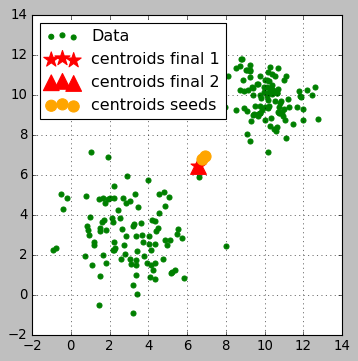

In [308]:

fig = plt.figure(figsize = (5, 5))
gaussian3 = np.concatenate([gaussian1, gaussian2], axis=0)  
gaussian3_x,gaussian3_y =  easy_2D_plot(gaussian3)
plt.scatter(gaussian3_x,gaussian3_y,color='green',label="Data")
plt.scatter(y1[0],y1[1],s=200,color='red',label="centroids final 1",marker="*")
plt.scatter(y2[0],y2[1],s=200,color='red',label="centroids final 2",marker="^")
plt.scatter(y0[0],y0[1],s=100,color='orange',label="centroids seeds")
#plt.scatter(gaussian1_x,gaussian1_y,color='green',label="Data")
#plt.scatter(gaussian2_x,gaussian2_y,color='red',label="Data")
plt.legend(loc=0)
plt.grid()
plt.show()


## DA analyzing convergence v2<a class="anchor" id="det-annel-trial-6"></a> 

#### DA analyzing convergence v2 (2D)

In [149]:
def easy_2D_plot(x):
    return [ x[i][0] for i in range(len(x))],[ x[i][1] for i in range(len(x))]

def mean_point_seed_2D(x):
    x_mean = 1*(max(x[:][0])-min(x[:][0]))/len(x[:][0])   
    y_mean =  1*(max(x[:][1])-min(x[:][1]))/len(x[:][1])   
    return [x_mean*i for i in range(1,len(x[:][0])+1)],[y_mean*i for i in range(1,len(x[:][1])+1)]      #x_mean , y_mean


In [150]:
gauss_points = 100
gaussian1=np.random.normal(3, 1.5, size=(gauss_points, 2))
gaussian1_x,gaussian1_y =  easy_2D_plot(gaussian1)

gauss_points2 = 100
gaussian2=np.random.normal(10, 1., size=(gauss_points, 2))
gaussian2_x,gaussian2_y =  easy_2D_plot(gaussian2)

gaussian3 = np.concatenate([gaussian1, gaussian2], axis=0)  
gaussian3_x,gaussian3_y =  easy_2D_plot(gaussian3)

In [151]:
def f_u(x,y,beta,i,k):
    
    denom = sum([np.exp(-beta*squa_dist(x[k]-y[j])) for j in range(len(y))])
    num   = np.exp(-beta*squa_dist(x[k]-y[i]))
    #print (num)
    return num/denom

def f_v(x,y,beta,i_clusters):
    new_y = []
    for i in i_clusters:
        denom =  sum([f_u(x,y,beta,i,k)  for k in range(len(x)) ])
        num   =  np.sum([ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ], axis=0)
        
        new_y.append(num)
        
    print("beta",beta,new_y)
    #num   =  [ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ]
    

    return new_y#num 
    #np.sum([[0, 1], [0, 5]], axis=0)

    
x = gaussian3    
y = mean_point_seed_2D(x)
y0 = np.copy(y)
print ("y",y)

y1= np.copy(y)
y2= np.copy(y)

beta=.1
evolution =[]

for beta in np.arange(0.01,20,0.6):
    
    y=f_v(x,y,beta,[0,1]) # f_v(x,y,beta,i_clusters)
    evolution.append(y)

y ([0.1430161672379946, 0.2860323344759892], [2.6318696657176233, 5.2637393314352465])
beta 0.01 [array([5.09310791, 5.1964964 ]), array([6.9705908 , 7.13300521])]
beta 0.61 [array([2.73077196, 2.9369616 ]), array([9.81766027, 9.89424163])]
beta 1.21 [array([2.73326178, 2.96480352]), array([9.84993262, 9.90052613])]
beta 1.8099999999999998 [array([2.73326179, 2.96480375]), array([9.84993288, 9.90052617])]
beta 2.4099999999999997 [array([2.73326179, 2.96480375]), array([9.84993288, 9.90052617])]
beta 3.01 [array([2.73326179, 2.96480375]), array([9.84993288, 9.90052617])]
beta 3.6099999999999994 [array([2.73326179, 2.96480375]), array([9.84993288, 9.90052617])]
beta 4.21 [array([2.73326179, 2.96480375]), array([9.84993288, 9.90052617])]
beta 4.81 [array([2.73326179, 2.96480375]), array([9.84993288, 9.90052617])]
beta 5.409999999999999 [array([2.73326179, 2.96480375]), array([9.84993288, 9.90052617])]
beta 6.01 [array([2.73326179, 2.96480375]), array([9.84993288, 9.90052617])]
beta 6.6099

In [53]:
evolution

[[array([6.51426995, 6.5303957 ]), array([6.6925282 , 6.71523117])],
 [array([4.23415285, 4.25096386]), array([8.94714093, 8.96939533])],
 [array([3.07383653, 3.10669379]), array([10.1404075, 10.1466537])],
 [array([3.07383654, 3.10669382]), array([10.14040753, 10.14665372])],
 [array([3.07383654, 3.10669382]), array([10.14040753, 10.14665372])],
 [array([3.07383654, 3.10669382]), array([10.14040753, 10.14665372])],
 [array([3.07383654, 3.10669382]), array([10.14040753, 10.14665372])],
 [array([3.07383654, 3.10669382]), array([10.14040753, 10.14665372])],
 [array([3.07383654, 3.10669382]), array([10.14040753, 10.14665372])],
 [array([3.07383654, 3.10669382]), array([10.14040753, 10.14665372])],
 [array([3.07383654, 3.10669382]), array([10.14040753, 10.14665372])],
 [array([3.07383654, 3.10669382]), array([10.14040753, 10.14665372])],
 [array([3.07383654, 3.10669382]), array([10.14040753, 10.14665372])],
 [array([3.07383654, 3.10669382]), array([10.14040753, 10.14665372])],
 [array([3.0

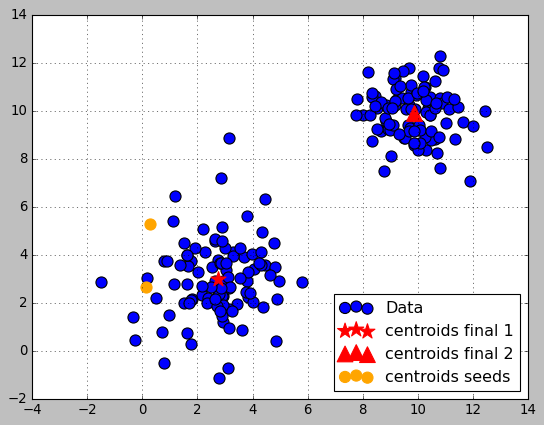

In [152]:

x_x,x_y = easy_2D_plot(x)

y1=y[0]
y2=y[1]
#y0_x,y0_y = easy_2D_plot(y0)
#y1_x,y1_y = easy_2D_plot(y1)
#y2_x,y2_y = easy_2D_plot(y2)


plt.scatter(x_x,x_y,s=100,label="Data")
plt.scatter(y1[0],y1[1],s=200,color='red',label="centroids final 1",marker="*")
plt.scatter(y2[0],y2[1],s=200,color='red',label="centroids final 2",marker="^")
plt.scatter(y0[0],y0[1],s=100,color='orange',label="centroids seeds")
plt.legend(loc=4)
plt.grid() 
plt.savefig("Deterministic-Annel_working.pdf")
plt.savefig("Deterministic-Annel_working.png")
plt.show()

### DA analyzing convergence v2 (3D)<a class="anchor" id="det-annel-trial-7"></a> 

#### DA analyzing convergence v2 (3D)

In [38]:
def easy_3D_plot(x):
    return [ x[i][0] for i in range(len(x))],[ x[i][1] for i in range(len(x))],[ x[i][2] for i in range(len(x))]

def mean_point_seed_3D(x):
    x_mean = 1*(max(x[:][0])-min(x[:][0]))/len(x[:][0])   
    y_mean =  1*(max(x[:][1])-min(x[:][1]))/len(x[:][1])   
    z_mean =  1*(max(x[:][2])-min(x[:][2]))/len(x[:][2])   
    return [x_mean*i for i in range(1,len(x[:][0])+1)],[y_mean*i for i in range(1,len(x[:][1])+1)],[z_mean*i for i in range(1,len(x[:][2])+1)]      #x_mean , y_mean

def squa_dist(a):
    return np.dot(a,a)

In [110]:
gauss_points1_3D = 100
gaussian1_3D=np.random.normal(3, 1.5, size=(gauss_points1_3D, 3)) 

#gauss_points2_3D = 200
#gaussian2_3D=np.random.normal(10, 1., size=(gauss_points2_3D, 3)) 

gaussian_3D = gaussian1_3D

clusters = 10 
media = 100
for i in range(clusters):
    print("| i",i,end=" ")
    ppc  = 100 #points_per_cluster
    mean = float(np.random.uniform(0,media,1))
    var  = float(np.random.uniform(1.,3,1))
    gaussian2_3D = np.random.normal(mean, var, size=(ppc, 3)) 
    gaussian_3D  = np.concatenate([gaussian_3D, gaussian2_3D], axis=0)  

    
gaussian3_x,gaussian3_y,gaussian3_z =  easy_3D_plot(gaussian_3D)  
print("gaussian_3D.shape",gaussian_3D.shape)
#gaussian_3D=gaussian1_3D
#gaussian_3D = np.concatenate([gaussian1_3D, gaussian2_3D], axis=0)  
#gaussian3_x,gaussian3_y,gaussian3_z =  easy_3D_plot(gaussian_3D)  

| i 0 | i 1 | i 2 | i 3 | i 4 | i 5 | i 6 | i 7 | i 8 | i 9 gaussian_3D.shape (1100, 3)


In [138]:
y = mean_point_seed_3D(x)
y = [[0.9330023459963218, 1.8660046919926436, 2.7990070379889653], 
     [0.6583659391140575, 1.316731878228115, 1.9750978173421725], 
     [0.9593322204728869, 1.9186644409457738, 2.8779966614186607], 
     [0.9593322204728869, 1.9186644409457738, 2.8779966614186607], 
     [0.9593322204728869, 1.9186644409457738, 2.8779966614186607],
    [0.9330023459963218, 1.8660046919926436, 2.7990070379889653], 
     [0.6583659391140575, 1.316731878228115, 1.9750978173421725], 
     [0.9593322204728869, 1.9186644409457738, 2.8779966614186607], 
     [0.9593322204728869, 1.9186644409457738, 2.8779966614186607], 
     [0.9593322204728869, 1.9186644409457738, 2.8779966614186607]]

In [139]:
def f_u(x,y,beta,i,k):
    
    denom = sum([np.exp(-beta*squa_dist(x[k]-y[j])) for j in range(len(y))])
    num   = np.exp(-beta*squa_dist(x[k]-y[i]))
    #print (num)
    return num/denom

def f_v(x,y,beta,i_clusters):
    new_y = []
    for i in i_clusters:
        denom =  sum([f_u(x,y,beta,i,k)  for k in range(len(x)) ])
        num   =  np.sum([ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ], axis=0)
        new_y.append(num)
        #num   =  [ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ]

    return new_y  #num  

    
x = gaussian_3D    
#y = mean_point_seed_3D(x)
y0 = np.copy(y)
print ("y",y)

y1= np.copy(y)
y2= np.copy(y)

beta=.1
evolution =[]
count =0
for beta in np.arange(0.01,.9,0.05):
    print(" ")    
    y=f_v(x,y,beta,[0,1,2,3,4,5,6,7,8,9]) # f_v(x,y,beta,i_clusters)
    evolution.append(y)
    for i in range(len(y)):
        print("beta",beta,"i",i,y[i])
    count = count +1
print("count =",count )    

y [[0.9330023459963218, 1.8660046919926436, 2.7990070379889653], [0.6583659391140575, 1.316731878228115, 1.9750978173421725], [0.9593322204728869, 1.9186644409457738, 2.8779966614186607], [0.9593322204728869, 1.9186644409457738, 2.8779966614186607], [0.9593322204728869, 1.9186644409457738, 2.8779966614186607], [0.9330023459963218, 1.8660046919926436, 2.7990070379889653], [0.6583659391140575, 1.316731878228115, 1.9750978173421725], [0.9593322204728869, 1.9186644409457738, 2.8779966614186607], [0.9593322204728869, 1.9186644409457738, 2.8779966614186607], [0.9593322204728869, 1.9186644409457738, 2.8779966614186607]]
 
beta 0.01 i 0 [59.03813647 59.02912719 58.96699257]
beta 0.01 i 1 [16.82252038 16.73896088 16.66684189]
beta 0.01 i 2 [63.48663318 63.48591541 63.42335618]
beta 0.01 i 3 [63.48663318 63.48591541 63.42335618]
beta 0.01 i 4 [63.48663318 63.48591541 63.42335618]
beta 0.01 i 5 [59.03813647 59.02912719 58.96699257]
beta 0.01 i 6 [16.82252038 16.73896088 16.66684189]
beta 0.01 i 7

beta 0.66 i 0 [76.30997756 76.52652518 76.43731303]
beta 0.66 i 1 [10.17620004 10.06526247 10.02154012]
beta 0.66 i 2 [92.14669669 92.13134622 92.0631579 ]
beta 0.66 i 3 [92.14669669 92.13134622 92.0631579 ]
beta 0.66 i 4 [92.14669669 92.13134622 92.0631579 ]
beta 0.66 i 5 [76.30997756 76.52652518 76.43731303]
beta 0.66 i 6 [10.17620004 10.06526247 10.02154012]
beta 0.66 i 7 [92.14669669 92.13134622 92.0631579 ]
beta 0.66 i 8 [92.14669669 92.13134622 92.0631579 ]
beta 0.66 i 9 [92.14669669 92.13134622 92.0631579 ]
 
beta 0.7100000000000001 i 0 [76.30997756 76.52652518 76.43731303]
beta 0.7100000000000001 i 1 [10.17620004 10.06526247 10.02154012]
beta 0.7100000000000001 i 2 [92.14669669 92.13134622 92.0631579 ]
beta 0.7100000000000001 i 3 [92.14669669 92.13134622 92.0631579 ]
beta 0.7100000000000001 i 4 [92.14669669 92.13134622 92.0631579 ]
beta 0.7100000000000001 i 5 [76.30997756 76.52652518 76.43731303]
beta 0.7100000000000001 i 6 [10.17620004 10.06526247 10.02154012]
beta 0.710000000

In [136]:
print(y[0])
print(y[0][0])

[nan nan nan]
nan


In [135]:
y1 = y[0]
y2 = y[1]
y3 = y[2]
y4 = y[3]
y5 = y[4]
y6 = y[5]
y7 = y[6]
y8 = y[7]
y9 = y[8]
y10 = y[9]

<IPython.core.display.Javascript object>


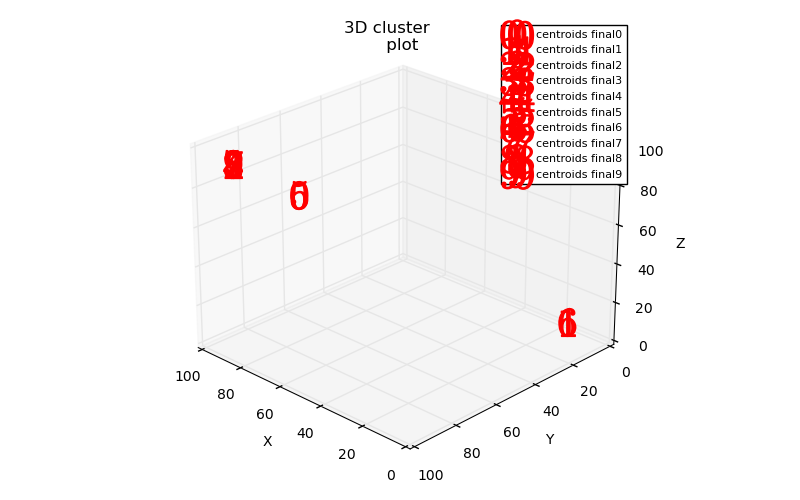

In [144]:
# Import libraries
from mpl_toolkits import mplot3d  

%matplotlib notebook 
#https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph/47311878

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")
 
# Creating plot

size_marker = 400

for i in range(len(y)):
    ax.scatter3D(y[i][0], y[i][1], y[i][2],s=size_marker, marker='$'+str(i)+'$',color = "red",
                 label="centroids final"+str(i),zorder=10)
    


#ax.scatter3D(gaussian3_x, gaussian3_y, gaussian3_z,s=10, color = "green",label="Data",zorder=1,alpha=.4)

plt.title("3D cluster     \n plot")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z') 

# The fix
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
ax.view_init(elev=25., azim=105)

if True:
    ax.legend(loc="best", prop={'size': 8})
    
plt.savefig("DA_3D_v1.pdf")
plt.savefig("DA_3D_v1.png") 
# show plot
plt.show()


In [146]:
%matplotlib inline    
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic') 

#### 2D not working

In [197]:
gauss_points1_2D = 100
gaussian1_2D=np.random.normal(3, 1.5, size=(gauss_points1_2D, 2)) 

#gauss_points2_3D = 200
#gaussian2_3D=np.random.normal(10, 1., size=(gauss_points2_3D, 3)) 

gaussian_2D = gaussian1_2D 
clusters = 10 
media = 10
for i in range(clusters):
    print("| i",i,end=" ")
    ppc  = 100 #points_per_cluster
    mean = float(np.random.uniform(0,media,1))
    var  = float(np.random.uniform(1.,3,1))
    gaussian2_2D = np.random.normal(mean, var, size=(ppc, 2)) 
    gaussian_2D  = np.concatenate([gaussian_2D, gaussian2_2D], axis=0)  
    globals()['gaussian_2D_cluster%s' % i] = gaussian2_2D

    
gaussian2_x,gaussian2_y=  easy_2D_plot(gaussian_2D)   
print("gaussian_3D.shape",gaussian_2D.shape) 
#gaussian_3D=gaussian1_3D
#gaussian_3D = np.concatenate([gaussian1_3D, gaussian2_3D], axis=0)  
#gaussian3_x,gaussian3_y,gaussian3_z =  easy_3D_plot(gaussian_3D)  

| i 0 | i 1 | i 2 | i 3 | i 4 | i 5 | i 6 | i 7 | i 8 | i 9 gaussian_3D.shape (1100, 2)


In [202]:
np.array([1,2])+1

array([2, 3])

In [198]:

for i in range(clusters):
    globals()['gaussian_2D_cluster%s_x' % i],globals()['gaussian_2D_cluster%s_y' % i] = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i])  


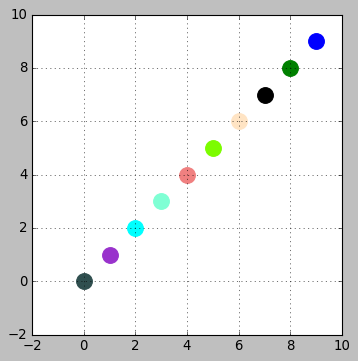

In [252]:
cor = ['darkslategrey', 'darkorchid', 'aqua', 'aquamarine', 'lightcoral', 
       'lawngreen', 'bisque', 'black', 'green', 'blue']
plt.figure(figsize=(5,5)) 
for i in range(len(cor)):
    plt.scatter(i,i,s=200,color=cor[i],label="Data"+str(i))
plt.grid()    
plt.show()



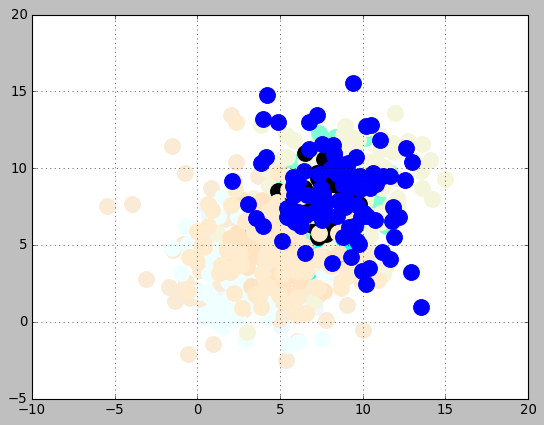

In [200]:
for i in range(clusters):
     
    plt.scatter(globals()['gaussian_2D_cluster%s_x' % i],globals()['gaussian_2D_cluster%s_y' % i],s=200,color=cor[i],label="Data"+str(i))
plt.grid()    
plt.show()

#### Trying another gauss distrib

In [232]:
mean = (1, 7)
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal(mean, cov, (100, 2))

mean1 = (1, 20)
cov1 = [[1, 0], [0, 1]]
x1 = np.random.multivariate_normal(mean1, cov1, (100, 2))

mean2= (5, 15)
cov2 = [[1, 0], [0, 1]]
x2 = np.random.multivariate_normal(mean2, cov2, (100, 2))
 
    
    
    
print("x.shape",x.shape,x.shape[0],"\n x",x[1][0])

multi_gaussian_2D = [x[0][0]]
multi_gaussian_2D1 = [x1[0][0]]
multi_gaussian_2D2 = [x2[0][0]]

for i in range(1,x.shape[0]):
    multi_gaussian_2D = np.concatenate([multi_gaussian_2D, [x[i][0]]], axis=0) 
    multi_gaussian_2D1 = np.concatenate([multi_gaussian_2D1, [x1[i][0]]], axis=0) 
    multi_gaussian_2D2 = np.concatenate([multi_gaussian_2D2, [x2[i][0]]], axis=0) 

#multi_gaussian_2D

x.shape (100, 2, 2) 100 
 x [1.54982895 7.26402041]


In [233]:
multi_gaussian_2D_x,multi_gaussian_2D_y = easy_2D_plot(multi_gaussian_2D)
multi_gaussian_2D1_x,multi_gaussian_2D1_y = easy_2D_plot(multi_gaussian_2D1)
multi_gaussian_2D2_x,multi_gaussian_2D2_y = easy_2D_plot(multi_gaussian_2D2)

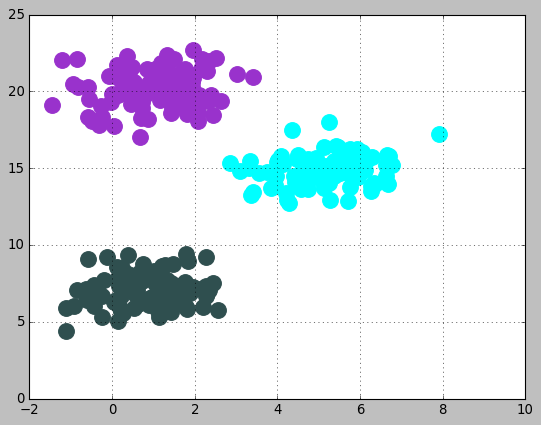

In [253]:
label = "Data"+str(0)
plt.scatter(multi_gaussian_2D_x,multi_gaussian_2D_y,s=200,color=cor[0],label=label,alpha=1.0)
plt.scatter(multi_gaussian_2D1_x,multi_gaussian_2D1_y,s=200,color=cor[1],label=label,alpha=1.0)
plt.scatter(multi_gaussian_2D2_x,multi_gaussian_2D2_y,s=200,color=cor[2],label=label,alpha=1.0)
plt.grid()    
plt.show()

---------------------------------------------------------------------

---------------------------------------------------------------------

### DA Generating 2D N cluster data<a class="anchor" id="det-annel-trial-8"></a> 

### Generalizando good 2D data for n cluster

In [14]:
def easy_2D_plot(x):
    return [ x[i][0] for i in range(len(x))],[ x[i][1] for i in range(len(x))]

def mean_point_seed_2D(x):
    x_mean = 1*(max(x[:][0])-min(x[:][0]))/len(x[:][0])   
    y_mean =  1*(max(x[:][1])-min(x[:][1]))/len(x[:][1])   
    return [x_mean*i for i in range(1,len(x[:][0])+1)],[y_mean*i for i in range(1,len(x[:][1])+1)]      #x_mean , y_mean

def squa_dist(a):
    return np.dot(a,a)

In [15]:
mean = (1, 7)
cov = [[1, 0], [0, 1]]
n_point_per_cluster = 50
x = np.random.multivariate_normal(mean, cov, (n_point_per_cluster, 2))

mean1 = (1, 20)
cov1 = [[1, 0], [0, 1]]
x1 = np.random.multivariate_normal(mean1, cov1, (n_point_per_cluster, 2))

mean2= (5, 15)
cov2 = [[1, 0], [0, 1]]
x2 = np.random.multivariate_normal(mean2, cov2, (n_point_per_cluster, 2)) 

#print("x.shape",x.shape,x.shape[0],"\n x",x[1][0])

multi_gaussian_2D = [x[0][0]]
multi_gaussian_2D1 = [x1[0][0]]
multi_gaussian_2D2 = [x2[0][0]]

mean_x_array = []
mean_y_array = []

n_clusters = 10
for i in range(n_clusters):
    mean_x = int(np.random.uniform(1.,20,1))
    mean_y = int(np.random.uniform(1.,50,1))
    mean = (mean_x, mean_y)
    cov = [[1, 0], [0, 2]]
    x = np.random.multivariate_normal(mean, cov, (n_point_per_cluster, 2)) 
    mean_x_array.append([mean_x])
    mean_y_array.append([mean_y])
    globals()['gaussian_2D_cluster%s' % i] = [[x[k][0][0],x[k][0][1]] for k in range(len(x)) ]
    for j in range(1,x.shape[0]):
        multi_gaussian_2D = np.concatenate([multi_gaussian_2D, [x[j][0]]], axis=0) 

print("multi_gaussian_2D.shape",multi_gaussian_2D.shape)

multi_gaussian_2D.shape (491, 2)


In [16]:
print(x[0],"\n x[0][0]",x[0][0],"\n x[0][0][0]",x[0][0][0],"<|> x[0][0][1]",x[0][0][1]) 

[[15.15560332 12.51753442]
 [14.46399266 12.65274769]] 
 x[0][0] [15.15560332 12.51753442] 
 x[0][0][0] 15.155603320383534 <|> x[0][0][1] 12.517534421756247


##### Creating different colors

In [18]:
count =0 
cor = []
for name, hex in matplotlib.colors.cnames.items():
    #print(name)
    if count<10:
        cor.append(name)        
    count = count +1    
print(cor, end="")

['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue']

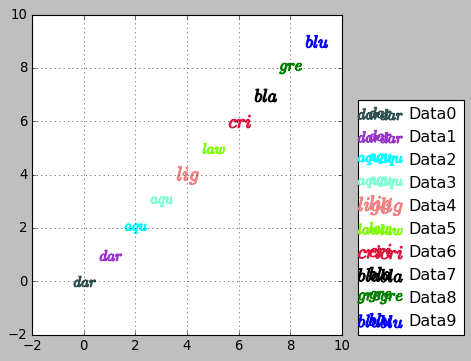

In [19]:
cor = ['darkslategrey', 'darkorchid', 'aqua', 'aquamarine', 'lightcoral', 
       'lawngreen', 'crimson', 'black', 'green', 'blue']
plt.figure(figsize=(5,5)) 
for i in range(len(cor)):
    #plt.scatter(i,i,s=200,color=cor[i],label="Data"+str(i))
    plt.scatter(i,i,s=400,color=cor[i],label="Data"+str(i),marker="$"+str(cor[i])[:3]+"$")
plt.grid()    
plt.legend(loc=(1.05,0))
plt.show()

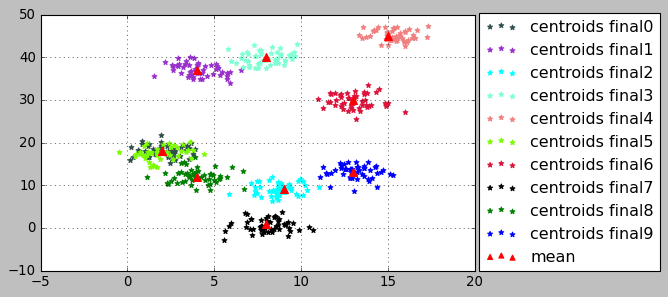

In [20]:
plt.figure(figsize=(7,4)) 
if True:
    for i in range(n_clusters):
        y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
        #y_x,y_y = easy_2D_plot(multi_gaussian_2D)
        plt.scatter(y_x,y_y,s=20,color=cor[i],label="centroids final"+str(i),marker="*",zorder=1)

plt.scatter(mean_x_array ,mean_y_array,s=50,color="red",marker="^",zorder=10) #,label="mean"

plt.scatter([] ,[],s=20,color="red",label="mean",marker="^",zorder=10)


plt.legend(loc=(1.01,0))
plt.grid() 
plt.show()

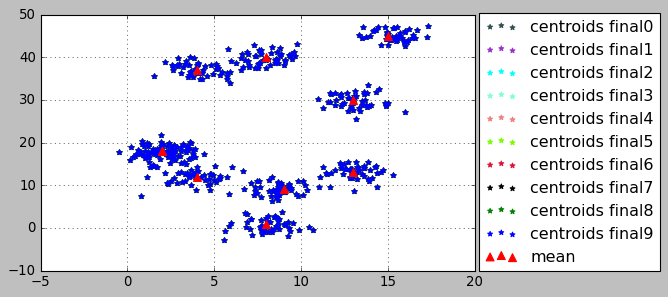

In [21]:
plt.figure(figsize=(7,4)) 
if True:
    for i in range(n_clusters):
        #y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
        y_x,y_y = easy_2D_plot(multi_gaussian_2D)
        plt.scatter(y_x,y_y,s=20,color=cor[i],label="centroids final"+str(i),marker="*",zorder=1)

plt.scatter(mean_x_array ,mean_y_array,s=50,color="red",label="mean",marker="^",zorder=10)
plt.legend(loc=(1.01,0))
plt.grid() 
plt.show()

In [246]:
def mean_point_seed_2D(x,n_clusters):
    x_mean = 1*(max(x[:][0])-min(x[:][0]))/n_clusters
    y_mean =  1*(max(x[:][1])-min(x[:][1]))/n_clusters
    return [[x_mean*i,y_mean*i] for i in range(1,n_clusters+1)]
n_clusters =10
y= mean_point_seed_2D(multi_gaussian_2D,n_clusters)
print("y.shape",len(y),len(y[0]))

y.shape 10 2


In [25]:
def mean_point_seed_2D(x,n_clusters):
    x_mean = 1*(max(x[:][0])-min(x[:][0]))/n_clusters
    y_mean =  1*(max(x[:][1])-min(x[:][1]))/n_clusters
    return [[x_mean*i,y_mean*i] for i in range(1,n_clusters+1)]

def mean_point_seed_2D_one_pos(x,n_clusters):
    x_mean = 1*(max(x[:][0])-min(x[:][0])) 
    y_mean =  1*(max(x[:][1])-min(x[:][1])) 
    return [[x_mean,y_mean] for i in range(1,n_clusters+1)]


In [247]:
print('{:.2e}'.format(23.88))

2.39e+01


In [248]:
beta_increment = 0.9

In [249]:
def f_u(x,y,beta,i,k):
    
    denom = sum([np.exp(-beta*squa_dist(x[k]-y[j])) for j in range(len(y))])
    num   = np.exp(-beta*squa_dist(x[k]-y[i]))
    #print("num",num)
    if denom<1.e-40 and num<1.e-40 : 
        result = .001 # 1.0
    else:
        result = num/denom
        
    ##print ("f_u num",num)
    ##print("f_u num",'{:.3e}'.format(num),"| denom",'{:.3e}'.format(denom),"| num/denom",'{:.3e}'.format(num/denom),"y",y)
    #print("f_u num",'{:.3e}'.format(num),"| denom",'{:.3e}'.format(denom),"| num/denom",'{:.3e}'.format(result),"y",y)
    return result

def f_v(x,y,beta,i_clusters):
    new_y = []
    for i in i_clusters:
        denom =  sum([f_u(x,y,beta,i,k)  for k in range(len(x)) ])
        num   =  np.sum([ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ], axis=0)
        new_y.append(num)
        #print("f_v num",num)
        #print("f_v denom",denom)
        #num   =  [ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ]

    return new_y  #num  
    #np.sum([[0, 1], [0, 5]], axis=0)

    
x = np.copy(multi_gaussian_2D)    
n_clusters =10
y = mean_point_seed_2D(multi_gaussian_2D,n_clusters)  #
#y  = mean_point_seed_2D_one_pos(multi_gaussian_2D,n_clusters) 
y0 = np.copy(y)
print ("y",y)

y1= np.copy(y)
y2= np.copy(y)

beta=.1
evolution =[]

beta_max =2
beta_min =0.001
beta_increment = .01
repeat = 3
n_cluster = [i for i in range(n_clusters)]
for beta in np.arange(beta_min,beta_max,beta_increment):
    print("beta",beta,"of ",beta_max,"y",y)
    if False and beta>3.:#beta>3.:
        print(y)
    #for i in range(repeat):   
    y=f_v(x,y,beta,n_cluster)
    #y=f_v(x,y,beta,[0,1]) # f_v(x,y,beta,i_clusters)
    evolution.append(y)

y [[0.4837238890310022, 0.7585237711783467], [0.9674477780620044, 1.5170475423566934], [1.4511716670930066, 2.27557131353504], [1.9348955561240089, 3.0340950847133867], [2.418619445155011, 3.7926188558917335], [2.902343334186013, 4.55114262707008], [3.3860672232170157, 5.309666398248427], [3.8697911122480178, 6.0681901694267735], [4.35351500127902, 6.82671394060512], [4.837238890310022, 7.585237711783467]]
beta 0.001 of  2 y [[0.4837238890310022, 0.7585237711783467], [0.9674477780620044, 1.5170475423566934], [1.4511716670930066, 2.27557131353504], [1.9348955561240089, 3.0340950847133867], [2.418619445155011, 3.7926188558917335], [2.902343334186013, 4.55114262707008], [3.3860672232170157, 5.309666398248427], [3.8697911122480178, 6.0681901694267735], [4.35351500127902, 6.82671394060512], [4.837238890310022, 7.585237711783467]]
beta 0.011 of  2 y [array([ 6.02812689, 21.79439525]), array([ 6.0725302, 21.9629433]), array([ 6.11804358, 22.13354443]), array([ 6.16468991, 22.30617429]), array

beta 0.21099999999999997 of  2 y [array([0.91365177, 9.88243596]), array([10.93299881, 11.04481345]), array([ 8.19395807, 14.15490803]), array([ 8.77425031, 17.03957541]), array([ 1.58198346, 17.15963074]), array([ 2.86764284, 21.00975103]), array([ 1.86777703, 27.72133666]), array([ 4.84435102, 30.83774467]), array([ 4.75392429, 37.79243992]), array([17.92847973, 39.5497666 ])]
beta 0.22099999999999997 of  2 y [array([0.91193924, 9.88121988]), array([10.94945318, 11.03476822]), array([ 8.16873661, 14.14193084]), array([ 8.7867335 , 17.07237447]), array([ 1.575121  , 17.14734917]), array([ 2.87480585, 21.02871555]), array([ 1.85632084, 27.71898583]), array([ 4.86109906, 30.84867356]), array([ 4.75362716, 37.79617799]), array([17.92847973, 39.5497666 ])]
beta 0.23099999999999996 of  2 y [array([0.91040192, 9.88042753]), array([10.96377887, 11.02588286]), array([ 8.14790491, 14.12933611]), array([ 8.797251  , 17.09976157]), array([ 1.56942755, 17.1372729 ]), array([ 2.88096958, 21.044010

beta 0.43099999999999994 of  2 y [array([0.89922062, 9.88371899]), array([11.05072993, 10.96810114]), array([ 8.01756258, 14.03206306]), array([ 8.87214762, 17.28169048]), array([ 1.53101517, 17.06981273]), array([ 2.92273976, 21.11247184]), array([ 1.78441656, 27.71001938]), array([ 4.97701262, 30.89580939]), array([ 4.75616219, 37.80673934]), array([17.92847973, 39.5497666 ])]
beta 0.44099999999999995 of  2 y [array([0.89907747, 9.88397993]), array([11.05174796, 10.96730128]), array([ 8.01608744, 14.03049989]), array([ 8.87350481, 17.28522698]), array([ 1.5303764 , 17.06856841]), array([ 2.92333971, 21.11228002]), array([ 1.78370341, 27.71026281]), array([ 4.97906619, 30.89593477]), array([ 4.75634857, 37.80641577]), array([17.92847973, 39.5497666 ])]
beta 0.45099999999999996 of  2 y [array([0.89894816, 9.88423306]), array([11.05268066, 10.96655822]), array([ 8.01478311, 14.02906286]), array([ 8.87477334, 17.28860274]), array([ 1.5297803 , 17.06739067]), array([ 2.92389337, 21.112005

beta 0.6509999999999999 of  2 y [array([0.89783426, 9.88773675]), array([11.06197424, 10.95833843]), array([ 8.00764459, 14.01553158]), array([ 8.88854623, 17.33494702]), array([ 1.52292052, 17.05136196]), array([ 2.92935667, 21.09971791]), array([ 1.77723401, 27.7143438 ]), array([ 5.00464278, 30.89380538]), array([ 4.7596046 , 37.79907739]), array([17.92847973, 39.5497666 ])]
beta 0.6609999999999999 of  2 y [array([0.8978137 , 9.88784681]), array([11.06219245, 10.95811924]), array([ 8.00774119, 14.01525014]), array([ 8.8888688 , 17.33652443]), array([ 1.52272208, 17.05075135]), array([ 2.92945599, 21.09902775]), array([ 1.7771038 , 27.71446561]), array([ 5.00532393, 30.8936125 ]), array([ 4.75972703, 37.79876262]), array([17.92847973, 39.5497666 ])]
beta 0.6709999999999999 of  2 y [array([0.89779462, 9.88795212]), array([11.06239827, 10.95791083]), array([ 8.0078548 , 14.01498481]), array([ 8.88916917, 17.33804874]), array([ 1.52253178, 17.05014901]), array([ 2.92954402, 21.09834172]

beta 0.8709999999999999 of  2 y [array([0.89759277, 9.8893068 ]), array([11.06482541, 10.9552715 ]), array([ 8.01185872, 14.01135748]), array([ 8.89181424, 17.3596798 ]), array([ 1.51998529, 17.03906074]), array([ 2.92938024, 21.08590391]), array([ 1.77527646, 27.71601078]), array([ 5.01427511, 30.88957789]), array([ 4.76174461, 37.79336151]), array([17.92847973, 39.5497666 ])]
beta 0.8809999999999999 of  2 y [array([0.89758781, 9.88934721]), array([11.06489329, 10.95518937]), array([ 8.01209352, 14.0112115 ]), array([ 8.89182635, 17.36041763]), array([ 1.51990561, 17.03853001]), array([ 2.9292924 , 21.08534966]), array([ 1.77521552, 27.71605123]), array([ 5.01452608, 30.88940405]), array([ 4.76181829, 37.79315825]), array([17.92847973, 39.5497666 ])]
beta 0.8909999999999999 of  2 y [array([0.89758313, 9.8893858 ]), array([11.0649581 , 10.95511016]), array([ 8.01232898, 14.01106645]), array([ 8.89183043, 17.3611307 ]), array([ 1.51982943, 17.03800013]), array([ 2.92919823, 21.08480132]

beta 1.0909999999999997 of  2 y [array([0.89752702, 9.88987843]), array([11.06584421, 10.95392652]), array([ 8.01699701, 14.00820547]), array([ 8.89066644, 17.37135058]), array([ 1.51890064, 17.02747941]), array([ 2.92620038, 21.07488203]), array([ 1.77425844, 27.71658282]), array([ 5.0179648 , 30.88640039]), array([ 4.76302465, 37.78978872]), array([17.92847973, 39.5497666 ])]
beta 1.1009999999999998 of  2 y [array([0.89752544, 9.88989313]), array([11.06587688, 10.95387955]), array([ 8.01722317, 14.00805999]), array([ 8.89056346, 17.37170602]), array([ 1.518878  , 17.02695517]), array([ 2.92600502, 21.07442985]), array([ 1.77422626, 27.71659831]), array([ 5.01806781, 30.88628869]), array([ 4.76306848, 37.78966503]), array([17.92847973, 39.5497666 ])]
beta 1.1109999999999998 of  2 y [array([0.89752393, 9.88990717]), array([11.06590908, 10.95383321]), array([ 8.01744836, 14.00791405]), array([ 8.89045753, 17.37205015]), array([ 1.51885714, 17.02643116]), array([ 2.92580628, 21.07398118]

beta 1.3109999999999997 of  2 y [array([0.89750487, 9.89008821]), array([11.06653337, 10.95297825]), array([ 8.02173169, 14.00488332]), array([ 8.8879003 , 17.37704588]), array([ 1.51873393, 17.01608766]), array([ 2.9213198 , 21.06567916]), array([ 1.77377324, 27.71683181]), array([ 5.01957371, 30.88452202]), array([ 4.76378465, 37.78763478]), array([17.92847973, 39.5497666 ])]
beta 1.3209999999999997 of  2 y [array([0.8975043, 9.8900937]), array([11.06656659, 10.95293698]), array([ 8.02193437, 14.00472599]), array([ 8.88775787, 17.37722102]), array([ 1.51873893, 17.01558317]), array([ 2.92107959, 21.06529607]), array([ 1.77376085, 27.71683998]), array([ 5.019623  , 30.88446224]), array([ 4.76381063, 37.78756083]), array([17.92847973, 39.5497666 ])]
beta 1.3309999999999997 of  2 y [array([0.89750375, 9.89009896]), array([11.06660021, 10.95289571]), array([ 8.02213594, 14.00456813]), array([ 8.88761463, 17.37739058]), array([ 1.51874471, 17.01508054]), array([ 2.92083875, 21.06491601]),

beta 1.5309999999999997 of  2 y [array([0.89749665, 9.89016777]), array([11.06737692, 10.9520593 ]), array([ 8.02593747, 14.00131729]), array([ 8.88465917, 17.37983433]), array([ 1.51897293, 17.00556187]), array([ 2.91605428, 21.0579757 ]), array([ 1.77363953, 27.7169785 ]), array([ 5.02039668, 30.88358793]), array([ 4.76423517, 37.78635004]), array([17.92847973, 39.5497666 ])]
beta 1.5409999999999997 of  2 y [array([0.89749643, 9.8901699 ]), array([11.06742159, 10.95201661]), array([ 8.02611629, 14.0011512 ]), array([ 8.88451024, 17.37991867]), array([ 1.51898791, 17.00511915]), array([ 2.91582377, 21.05766297]), array([ 1.77363912, 27.71698387]), array([ 5.02042416, 30.88356139]), array([ 4.76425059, 37.78630599]), array([17.92847973, 39.5497666 ])]
beta 1.5509999999999997 of  2 y [array([0.89749622, 9.89017194]), array([11.06746684, 10.95197383]), array([ 8.02629406, 14.0009849 ]), array([ 8.88436147, 17.38000018]), array([ 1.51900307, 17.00468013]), array([ 2.91559466, 21.05735361]

beta 1.7509999999999997 of  2 y [array([0.89749344, 9.89019901]), array([11.06848952, 10.95110199]), array([ 8.02963759, 13.99764542]), array([ 8.88145596, 17.38115636]), array([ 1.51931948, 16.99673706]), array([ 2.91137752, 21.05187386]), array([ 1.77370138, 27.71707813]), array([ 5.02088002, 30.88322004]), array([ 4.76450288, 37.78558452]), array([17.92847973, 39.5497666 ])]
beta 1.7609999999999997 of  2 y [array([0.89749335, 9.89019986]), array([11.06854616, 10.95105781]), array([ 8.02979457, 13.99747933]), array([ 8.88131571, 17.38119571]), array([ 1.51933507, 16.99638352]), array([ 2.91118737, 21.0516347 ]), array([ 1.77370687, 27.71708185]), array([ 5.02089713, 30.883212  ]), array([ 4.76451206, 37.78555824]), array([17.92847973, 39.5497666 ])]
beta 1.7709999999999997 of  2 y [array([0.89749327, 9.89020067]), array([11.06860329, 10.9510136 ]), array([ 8.0299506 , 13.99731347]), array([ 8.88117605, 17.38123374]), array([ 1.51935056, 16.99603417]), array([ 2.91099933, 21.05139874]

beta 1.9709999999999996 of  2 y [array([0.89749216, 9.89021153]), array([11.06983336, 10.95012956]), array([ 8.03288378, 13.99407226]), array([ 8.87852207, 17.38178402]), array([ 1.51963536, 16.98990217]), array([ 2.90767929, 21.04731475]), array([ 1.77384974, 27.71714698]), array([ 5.02119049, 30.88315232]), array([ 4.76466258, 37.78512726]), array([17.92847973, 39.5497666 ])]
beta 1.9809999999999997 of  2 y [array([0.89749212, 9.89021187]), array([11.06989858, 10.95008568]), array([ 8.03302149, 13.99391524]), array([ 8.87839686, 17.38180395]), array([ 1.51964813, 16.98963633]), array([ 2.90753473, 21.04714011]), array([ 1.77385736, 27.71714953]), array([ 5.02120184, 30.88315346]), array([ 4.76466807, 37.78511154]), array([17.92847973, 39.5497666 ])]
beta 1.9909999999999997 of  2 y [array([0.89749209, 9.8902122 ]), array([11.0699641 , 10.95004186]), array([ 8.03315838, 13.99375881]), array([ 8.87827239, 17.3818234 ]), array([ 1.51966074, 16.98937413]), array([ 2.90739212, 21.04696806]

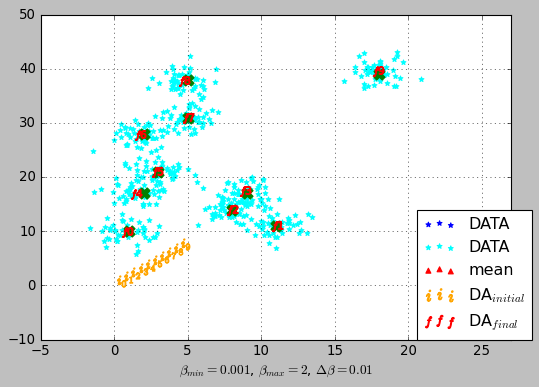

In [259]:
plt.figure(figsize=(7,5)) 
if False:
    for i in range(n_clusters):
        #y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
        y_x,y_y = easy_2D_plot(multi_gaussian_2D)
        plt.scatter(y_x,y_y,s=20,color=cor[i],marker="*",zorder=1) #,label="DATA"
        
plt.scatter([],[],s=20,color=cor[i],label="DATA",marker="*",zorder=1)        
y_x,y_y = easy_2D_plot(multi_gaussian_2D)
plt.scatter(y_x,y_y,s=20,color="cyan",label="DATA",marker="*",zorder=1)        

plt.scatter(mean_x_array ,mean_y_array,s=100,color="green",marker="X",zorder=2)  #,label="mean"
plt.scatter([] ,[],s=20,color="red",label="mean",marker="^",zorder=10)

y_x,y_y = easy_2D_plot(y)
y0_x,y0_y = easy_2D_plot(y0)
for i in range(n_clusters): 
    plt.scatter(y0_x[i],y0_y[i],s=100,color="orange",marker="$i_"+str(i)+"$",zorder=10)#,label="DA"+str(i)
plt.scatter([] ,[],s=100,color="orange",label="DA$_{initial}$",marker="$i$",zorder=10)    
    
for i in range(n_clusters):
    plt.scatter(y_x[i],y_y[i],s=100,color="red",marker="$f$"+str(i),zorder=10) #,label="DA"+str(i)
plt.scatter([],[],s=100,color="red",label="DA$_{final}$",marker="$f$",zorder=10)
    
plt.xlim(-5,27)
plt.xlabel("$\\beta_{min}="+str(beta_min)+'$, $\\beta_{max}='+str(beta_max)+"$, $\Delta\\beta="+str(beta_increment)+"$")
plt.legend(loc=(.8,0))
plt.grid() 
plt.tight_layout()   
plt.savefig("teste1_beta_min"+str(beta_min)+"_betaMx_"+str(beta_max)+"_dbeta"+str(beta_increment)+"_repeat"+str(repeat)+".pdf")
#plt.savefig("teste1_beta_min"+str(beta_min)+"_betaMx_"+str(beta_max)+"_dbeta"+str(beta_increment)+"_repeat"+str(repeat)+".png")

plt.show()

In [15]:
y0_x,y0_y

NameError: name 'y0_x' is not defined

---------------------------------------------------------------------

---------------------------------------------------------------------

### DA Last test for more clusters <a class="anchor" id="det-annel-trial-9"></a> 

### Trying with more cluster

In [5]:
from utils_func_DA1 import *

In [6]:
mean = (1, 7)
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal(mean, cov, (100, 2))

mean1 = (1, 20)
cov1 = [[1, 0], [0, 1]]
x1 = np.random.multivariate_normal(mean1, cov1, (100, 2))

mean2= (5, 15)
cov2 = [[1, 0], [0, 1]]
x2 = np.random.multivariate_normal(mean2, cov2, (100, 2)) 

#print("x.shape",x.shape,x.shape[0],"\n x",x[1][0])

multi_gaussian_2D = [x[0][0]]
multi_gaussian_2D1 = [x1[0][0]]
multi_gaussian_2D2 = [x2[0][0]]

mean_x_array = []
mean_y_array = []

n_clusters = 10
for i in range(n_clusters):
    mean_x = int(np.random.uniform(1.,20,1))
    mean_y = int(np.random.uniform(1.,50,1))
    mean = (mean_x, mean_y)
    cov = [[1, 0], [0, 2]]
    x = np.random.multivariate_normal(mean, cov, (100, 2)) 
    mean_x_array.append([mean_x])
    mean_y_array.append([mean_y])
    globals()['gaussian_2D_cluster%s' % i] = [[x[k][0][0],x[k][0][1]] for k in range(len(x)) ]
    for j in range(1,x.shape[0]):
        multi_gaussian_2D = np.concatenate([multi_gaussian_2D, [x[j][0]]], axis=0) 

print("multi_gaussian_2D.shape",multi_gaussian_2D.shape)

multi_gaussian_2D.shape (991, 2)


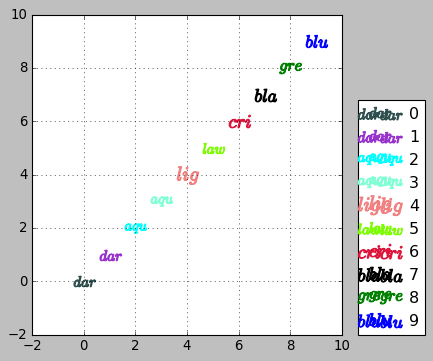

In [7]:
cor = ['darkslategrey', 'darkorchid', 'aqua', 'aquamarine', 'lightcoral', 
       'lawngreen', 'crimson', 'black', 'green', 'blue']
plt.figure(figsize=(5,5)) 
for i in range(len(cor)):
    #plt.scatter(i,i,s=200,color=cor[i],label="Data"+str(i))
    plt.scatter(i,i,s=400,color=cor[i],label=str(i),marker="$"+str(cor[i])[:3]+"$")
plt.grid()    
plt.legend(loc=(1.05,0))
plt.show()

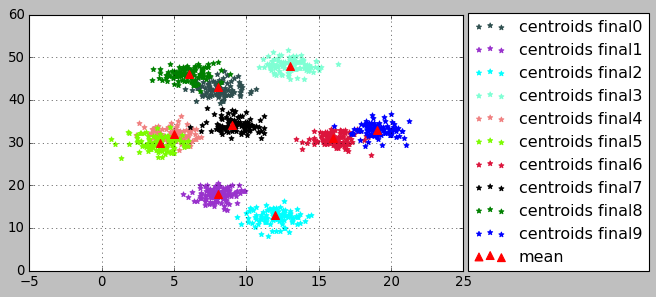

In [8]:
plt.figure(figsize=(7,4)) 
if True:
    for i in range(n_clusters):
        y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
        #y_x,y_y = easy_2D_plot(multi_gaussian_2D)
        plt.scatter(y_x,y_y,s=20,color=cor[i],label="centroids final"+str(i),marker="*",zorder=1)

plt.scatter(mean_x_array ,mean_y_array,s=50,color="red",label="mean",marker="^",zorder=10)
plt.legend(loc=(1.01,0))
plt.grid() 
plt.show()

In [9]:
def f_u(x,y,beta,i,k):
    
    denom = sum([np.exp(-beta*squa_dist(x[k]-y[j])) for j in range(len(y))])
    num   = np.exp(-beta*squa_dist(x[k]-y[i]))
    #print("num",num)
    if denom<1.e-40 and num<1.e-40 : 
        #result = 1.0
        result = .01
    else:
        result = num/denom
        
    ##print ("f_u num",num)
    ##print("f_u num",'{:.3e}'.format(num),"| denom",'{:.3e}'.format(denom),"| num/denom",'{:.3e}'.format(num/denom),"y",y)
    #print("f_u num",'{:.3e}'.format(num),"| denom",'{:.3e}'.format(denom),"| num/denom",'{:.3e}'.format(result),"y",y)
    return result

def f_v(x,y,beta,i_clusters):
    new_y = []
    for i in i_clusters:
        denom =  sum([f_u(x,y,beta,i,k)  for k in range(len(x)) ])
        num   =  np.sum([ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ], axis=0)
        new_y.append(num)
        #print("f_v num",num)
        #print("f_v denom",denom)
        #num   =  [ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ]

    return new_y  #num  
    

In [10]:

n_clusters_extra = 10

x = np.copy(multi_gaussian_2D)    
y= mean_point_seed_2D(multi_gaussian_2D,n_clusters_extra)  #
y0 = np.copy(y)
print ("y",y,"\n y.shape",len(y),len(y[0]))

y1= np.copy(y)
y2= np.copy(y)

beta=.1
evolution =[]

n_cluster = [i for i in range(n_clusters_extra)]


TypeError: mean_point_seed_2D() takes 1 positional argument but 2 were given

In [27]:
beta_max =3

for beta in np.arange(0.001,beta_max,0.01):
    print("beta",beta,"of ",beta_max,"y",y)
    if False and beta>3.:#beta>3.:
        print(y)
    y=f_v(x,y,beta,n_cluster) # f_v(x,y,beta,i_clusters)
    evolution.append(y)

beta 0.001 of  3 y [[0.6825564192580059, 1.535627679767252], [1.3651128385160118, 3.071255359534504], [2.0476692577740176, 4.6068830393017555], [2.7302256770320237, 6.142510719069008], [3.4127820962900297, 7.67813839883626], [4.095338515548035, 9.213766078603511], [4.777894934806041, 10.749393758370763], [5.460451354064047, 12.285021438138015], [6.143007773322053, 13.820649117905267], [6.825564192580059, 15.35627679767252]]
beta 0.011 of  3 y [array([ 7.44654819, 19.2073277 ]), array([ 7.51363621, 19.78665081]), array([ 7.58506962, 20.3803494 ]), array([ 7.66082809, 20.98743186]), array([ 7.74086104, 21.60674294]), array([ 7.82508657, 22.23696957]), array([ 7.91339093, 22.87665048]), array([ 8.00562862, 23.52418961]), array([ 8.10162313, 24.17787312]), array([ 8.20116843, 24.83588966])]
beta 0.020999999999999998 of  3 y [array([ 7.08279484, 12.99617629]), array([ 7.09965875, 14.40790477]), array([ 7.15797233, 16.06844047]), array([ 7.2697153 , 18.00784645]), array([ 7.4453724 , 20.2320

beta 0.22099999999999997 of  3 y [array([8.10598361, 0.6454126 ]), array([8.72766791, 9.04696942]), array([13.08853148, 13.22009196]), array([ 3.90650466, 11.91196216]), array([ 2.08499072, 17.70895693]), array([ 2.08500297, 17.7108479 ]), array([13.10599163, 29.7637831 ]), array([ 4.29517163, 37.20020802]), array([ 7.95274034, 39.8962849 ]), array([15.32243824, 45.09058162])]
beta 0.23099999999999996 of  3 y [array([8.10598642, 0.64542599]), array([8.73176029, 9.04629286]), array([13.0925401 , 13.22430215]), array([ 3.90269844, 11.91334558]), array([ 2.0834593 , 17.71193051]), array([ 2.08348365, 17.7136    ]), array([13.10599213, 29.76378289]), array([ 4.28502849, 37.19585935]), array([ 7.96311325, 39.90058642]), array([15.32269868, 45.09067833])]
beta 0.24099999999999996 of  3 y [array([8.10599339, 0.64545435]), array([8.73546061, 9.04593614]), array([13.09596131, 13.22807274]), array([ 3.89954854, 11.91430886]), array([ 2.08215072, 17.71425301]), array([ 2.08218375, 17.71578603]), 

beta 0.44099999999999995 of  3 y [array([8.10611031, 0.64585628]), array([8.76936392, 9.05203683]), array([13.1186198, 13.2649466]), array([ 3.88314052, 11.90580512]), array([ 2.06490003, 17.58509462]), array([ 2.08229817, 17.85453779]), array([13.1059928 , 29.76378261]), array([ 4.19084323, 37.16114995]), array([ 8.00580025, 39.89553049]), array([15.3236574 , 45.09102905])]
beta 0.45099999999999996 of  3 y [array([8.10611138, 0.64585982]), array([8.77025447, 9.05224931]), array([13.11891955, 13.26593458]), array([ 3.88551263, 11.90188141]), array([ 2.05862218, 17.49129038]), array([ 2.08823297, 17.94430833]), array([13.1059928 , 29.76378261]), array([ 4.18864543, 37.16036994]), array([ 8.00552062, 39.89448542]), array([15.32365921, 45.09102971])]
beta 0.4609999999999999 of  3 y [array([8.10611229, 0.64586282]), array([8.77117464, 9.05242654]), array([13.11919242, 13.26688561]), array([ 3.89178809, 11.89269766]), array([ 2.04832407, 17.34044431]), array([ 2.09801863, 18.08542621]), arr

beta 0.6609999999999999 of  3 y [array([8.10611698, 0.64587866]), array([8.78386619, 9.05405331]), array([13.12162868, 13.28048585]), array([ 3.94460367, 11.80577273]), array([ 1.97949279, 16.6634263 ]), array([ 2.16486298, 18.64415297]), array([13.1059928 , 29.76378261]), array([ 4.15717331, 37.1480933 ]), array([ 7.99577538, 39.87682973]), array([15.32366669, 45.09103242])]
beta 0.6709999999999999 of  3 y [array([8.106117  , 0.64587874]), array([8.78423613, 9.05409592]), array([13.12167372, 13.28096692]), array([ 3.94467569, 11.80573579]), array([ 1.97825792, 16.66112265]), array([ 2.16596269, 18.64734234]), array([13.1059928 , 29.76378261]), array([ 4.15614249, 37.14764638]), array([ 7.99529719, 39.87619278]), array([15.32366671, 45.09103242])]
beta 0.6809999999999999 of  3 y [array([8.10611702, 0.64587881]), array([8.78459803, 9.05413433]), array([13.12171544, 13.28143553]), array([ 3.94474285, 11.80571296]), array([ 1.97704622, 16.65899203]), array([ 2.16705377, 18.65044303]), arr

beta 0.8809999999999999 of  3 y [array([8.10611712, 0.64587916]), array([8.79037925, 9.05438139]), array([13.12214472, 13.28868762]), array([ 3.94550679, 11.80651887]), array([ 1.95624452, 16.64137574]), array([ 2.18833864, 18.70140802]), array([13.1059928 , 29.76378261]), array([ 4.13987941, 37.14023048]), array([ 7.98677196, 39.86588472]), array([15.32366678, 45.09103245])]
beta 0.8909999999999999 of  3 y [array([8.10611712, 0.64587916]), array([8.79060459, 9.05437973]), array([13.12215485, 13.288963  ]), array([ 3.94552796, 11.80657582]), array([ 1.95531398, 16.64138088]), array([ 2.18943357, 18.70366507]), array([13.1059928 , 29.76378261]), array([ 4.13930233, 37.13995771]), array([ 7.98644145, 39.86551099]), array([15.32366678, 45.09103245])]
beta 0.9009999999999999 of  3 y [array([8.10611712, 0.64587917]), array([8.79082462, 9.05437747]), array([13.1221644 , 13.28923148]), array([ 3.94554815, 11.80663213]), array([ 1.95438902, 16.64144837]), array([ 2.19053625, 18.70591213]), arr

beta 1.1009999999999998 of  3 y [array([8.10611712, 0.64587917]), array([8.79425829, 9.05427183]), array([13.1222795 , 13.29337868]), array([ 3.94580219, 11.80751785]), array([ 1.9365105 , 16.65363062]), array([ 2.21491491, 18.75100763]), array([13.1059928 , 29.76378261]), array([ 4.1298437 , 37.13547953]), array([ 7.98085551, 39.85929236]), array([15.32366678, 45.09103245])]
beta 1.1109999999999998 of  3 y [array([8.10611712, 0.64587917]), array([8.7943886 , 9.05426561]), array([13.12228288, 13.29353479]), array([ 3.94580955, 11.80754855]), array([ 1.93563519, 16.65469328]), array([ 2.21627129, 18.75335534]), array([13.1059928 , 29.76378261]), array([ 4.12949513, 37.13531635]), array([ 7.98064553, 39.85905907]), array([15.32366678, 45.09103245])]
beta 1.1209999999999998 of  3 y [array([8.10611712, 0.64587917]), array([8.7945156 , 9.05425941]), array([13.12228613, 13.29368686]), array([ 3.94581655, 11.80757802]), array([ 1.93476206, 16.65579172]), array([ 2.21764107, 18.75571738]), arr

beta 1.3209999999999997 of  3 y [array([8.10611712, 0.64587917]), array([8.79646827, 9.05414948]), array([13.12233057, 13.29601765]), array([ 3.94590198, 11.80795136]), array([ 1.91841241, 16.68345745]), array([ 2.24702896, 18.80591351]), array([13.1059928 , 29.76378261]), array([ 4.12362438, 37.13263638]), array([ 7.97710426, 39.85506472]), array([15.32366678, 45.09103245])]
beta 1.3309999999999997 of  3 y [array([8.10611712, 0.64587917]), array([8.79654145, 9.05414489]), array([13.12233207, 13.29610477]), array([ 3.94590433, 11.80796152]), array([ 1.91769179, 16.68502054]), array([ 2.24853368, 18.80853202]), array([13.1059928 , 29.76378261]), array([ 4.12340148, 37.13253819]), array([ 7.9769704 , 39.85491016]), array([15.32366678, 45.09103245])]
beta 1.3409999999999997 of  3 y [array([8.10611712, 0.64587917]), array([8.79661272, 9.05414038]), array([13.12233352, 13.29618959]), array([ 3.94590656, 11.80797108]), array([ 1.9169844 , 16.68658976]), array([ 2.25003407, 18.81115399]), arr

beta 1.5409999999999997 of  3 y [array([8.10611712, 0.64587917]), array([8.7977033 , 9.05406801]), array([13.12235477, 13.29748626]), array([ 3.94593332, 11.80807399]), array([ 1.90604564, 16.71712517]), array([ 2.2775768 , 18.86227809]), array([13.1059928 , 29.76378261]), array([ 4.1195569 , 37.13090794]), array([ 7.97468503, 39.85220059]), array([15.32366678, 45.09103245])]
beta 1.5509999999999997 of  3 y [array([8.10611712, 0.64587917]), array([8.79774404, 9.0540652 ]), array([13.12235553, 13.29753465]), array([ 3.94593406, 11.80807621]), array([ 1.90566405, 16.71852357]), array([ 2.27877125, 18.86467284]), array([13.1059928 , 29.76378261]), array([ 4.11940716, 37.13084729]), array([ 7.97459722, 39.85209318]), array([15.32366678, 45.09103245])]
beta 1.5609999999999997 of  3 y [array([8.10611712, 0.64587917]), array([8.7977837 , 9.05406245]), array([13.12235627, 13.29758176]), array([ 3.94593477, 11.80807827]), array([ 1.90529726, 16.719904  ]), array([ 2.27994478, 18.86704471]), arr

beta 1.7609999999999997 of  3 y [array([8.10611712, 0.64587917]), array([8.79839047, 9.05401957]), array([13.12236742, 13.29830214]), array([ 3.94594364, 11.80809729]), array([ 1.90057093, 16.74342261]), array([ 2.29903398, 18.90898601]), array([13.1059928 , 29.76378261]), array([ 4.11677319, 37.1298242 ]), array([ 7.97307411, 39.85017669]), array([15.32366678, 45.09103245])]
beta 1.7709999999999997 of  3 y [array([8.10611712, 0.64587917]), array([8.79841314, 9.05401794]), array([13.12236783, 13.29832905]), array([ 3.9459439 , 11.80809761]), array([ 1.9004386 , 16.74439506]), array([ 2.29978332, 18.91079523]), array([13.1059928 , 29.76378261]), array([ 4.11666851, 37.1297854 ]), array([ 7.97301453, 39.85009939]), array([15.32366678, 45.09103245])]
beta 1.7809999999999997 of  3 y [array([8.10611712, 0.64587917]), array([8.79843522, 9.05401635]), array([13.12236823, 13.29835525]), array([ 3.94594415, 11.80809788]), array([ 1.90031374, 16.74534934]), array([ 2.30051527, 18.9125774 ]), arr

beta 1.9809999999999997 of  3 y [array([8.10611712, 0.64587917]), array([8.79877328, 9.0539918 ]), array([13.12237431, 13.29875637]), array([ 3.94594735, 11.80809968]), array([ 1.89897728, 16.76104357]), array([ 2.3120454, 18.9429455]), array([13.1059928 , 29.76378261]), array([ 4.11479935, 37.12911972]), array([ 7.97196547, 39.84870349]), array([15.32366678, 45.09103245])]
beta 1.9909999999999997 of  3 y [array([8.10611712, 0.64587917]), array([8.79878593, 9.05399087]), array([13.12237453, 13.29877138]), array([ 3.94594745, 11.80809967]), array([ 1.89895157, 16.76168026]), array([ 2.31249232, 18.94422353]), array([13.1059928 , 29.76378261]), array([ 4.11472396, 37.12909399]), array([ 7.97192378, 39.84864654]), array([15.32366678, 45.09103245])]
beta 2.001 of  3 y [array([8.10611712, 0.64587917]), array([8.79879824, 9.05398997]), array([13.12237475, 13.29878599]), array([ 3.94594754, 11.80809966]), array([ 1.89892848, 16.76230482]), array([ 2.31292917, 18.94548102]), array([13.1059928 

beta 2.2009999999999996 of  3 y [array([8.10611712, 0.64587917]), array([8.7989871 , 9.05397609]), array([13.12237812, 13.29901002]), array([ 3.94594871, 11.80809911]), array([ 1.89883439, 16.7726011 ]), array([ 2.31992509, 18.96678578]), array([13.1059928 , 29.76378261]), array([ 4.11336321, 37.1286454 ]), array([ 7.97118047, 39.84760986]), array([15.32366678, 45.09103245])]
beta 2.2109999999999994 of  3 y [array([8.10611712, 0.64587917]), array([8.79899417, 9.05397557]), array([13.12237825, 13.29901841]), array([ 3.94594875, 11.80809908]), array([ 1.89884105, 16.77302185]), array([ 2.320204  , 18.96768077]), array([13.1059928 , 29.76378261]), array([ 4.11330775, 37.12862776]), array([ 7.97115055, 39.84756725]), array([15.32366678, 45.09103245])]
beta 2.2209999999999996 of  3 y [array([8.10611712, 0.64587917]), array([8.79900107, 9.05397506]), array([13.12237837, 13.29902659]), array([ 3.94594878, 11.80809905]), array([ 1.89884828, 16.77343497]), array([ 2.32047748, 18.96856148]), arr

beta 2.4209999999999994 of  3 y [array([8.10611712, 0.64587917]), array([8.79910683, 9.05396725]), array([13.12238025, 13.29915205]), array([ 3.94594921, 11.80809857]), array([ 1.89904861, 16.78031272]), array([ 2.32500578, 18.98352394]), array([13.1059928 , 29.76378261]), array([ 4.11229934, 37.12831599]), array([ 7.97061198, 39.84678767]), array([15.32366678, 45.09103245])]
beta 2.4309999999999996 of  3 y [array([8.10611712, 0.64587917]), array([8.7991108 , 9.05396695]), array([13.12238032, 13.29915675]), array([ 3.94594922, 11.80809855]), array([ 1.89905904, 16.78059704]), array([ 2.32519362, 18.9841552 ]), array([13.1059928 , 29.76378261]), array([ 4.11225794, 37.12830355]), array([ 7.97059009, 39.84675548]), array([15.32366678, 45.09103245])]
beta 2.4409999999999994 of  3 y [array([8.10611712, 0.64587917]), array([8.79911467, 9.05396667]), array([13.12238039, 13.29916134]), array([ 3.94594923, 11.80809853]), array([ 1.89906936, 16.78087648]), array([ 2.32537847, 18.98477667]), arr

beta 2.6409999999999996 of  3 y [array([8.10611712, 0.64587917]), array([8.79917402, 9.05396227]), array([13.12238144, 13.29923174]), array([ 3.94594939, 11.80809828]), array([ 1.89923252, 16.78557701]), array([ 2.32854944, 18.99538949]), array([13.1059928 , 29.76378261]), array([ 4.11150153, 37.12808127]), array([ 7.97019321, 39.84616456]), array([15.32366678, 45.09103245])]
beta 2.6509999999999994 of  3 y [array([8.10611712, 0.64587917]), array([8.79917625, 9.0539621 ]), array([13.12238148, 13.29923438]), array([ 3.94594939, 11.80809828]), array([ 1.89923796, 16.78577352]), array([ 2.32868605, 18.99583994]), array([13.1059928 , 29.76378261]), array([ 4.11147033, 37.12807231]), array([ 7.97017696, 39.84614008]), array([15.32366678, 45.09103245])]
beta 2.6609999999999996 of  3 y [array([8.10611712, 0.64587917]), array([8.79917842, 9.05396194]), array([13.12238152, 13.29923695]), array([ 3.94594939, 11.80809827]), array([ 1.8992431 , 16.78596685]), array([ 2.32882092, 18.99628368]), arr

beta 2.8609999999999993 of  3 y [array([8.10611712, 0.64587917]), array([8.79921178, 9.05395947]), array([13.12238211, 13.29927652]), array([ 3.94594945, 11.80809816]), array([ 1.89928378, 16.78924971]), array([ 2.33120688, 19.00390482]), array([13.1059928 , 29.76378261]), array([ 4.11089823, 37.12791061]), array([ 7.96988084, 39.84568983]), array([15.32366678, 45.09103245])]
beta 2.8709999999999996 of  3 y [array([8.10611712, 0.64587917]), array([8.79921303, 9.05395937]), array([13.12238213, 13.29927801]), array([ 3.94594945, 11.80809815]), array([ 1.89928274, 16.78938835]), array([ 2.33131291, 19.00423034]), array([13.1059928 , 29.76378261]), array([ 4.11087456, 37.12790403]), array([ 7.96986866, 39.84567114]), array([15.32366678, 45.09103245])]
beta 2.8809999999999993 of  3 y [array([8.10611712, 0.64587917]), array([8.79921425, 9.05395928]), array([13.12238215, 13.29927945]), array([ 3.94594945, 11.80809815]), array([ 1.89928141, 16.78952486]), array([ 2.33141786, 19.00455119]), arr

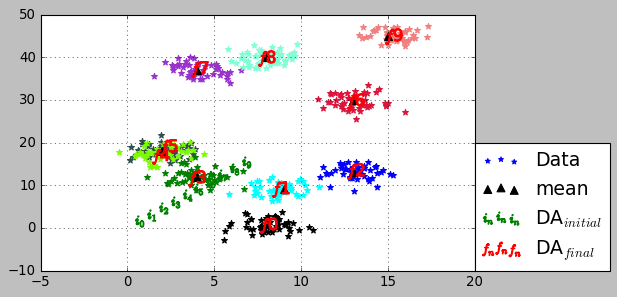

In [41]:
plt.figure(figsize=(7,4)) 
if True:
    for i in range(n_clusters):
        y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
        #y_x,y_y = easy_2D_plot(multi_gaussian_2D)
        plt.scatter(y_x,y_y,s=30,color=cor[i],marker="*",zorder=1)#,label="centroids final"+str(i)
plt.scatter([],[],s=20,color=cor[i],label="Data",marker="*",zorder=1)
plt.scatter(mean_x_array ,mean_y_array,s=50,color="black",label="mean",marker="^",zorder=10)

y_x,y_y = easy_2D_plot(y)
y0_x,y0_y = easy_2D_plot(y0)
for i in range(n_clusters_extra): 
    plt.scatter(y0_x[i],y0_y[i],s=100,color="green",marker="$i_"+str(i)+"$",zorder=10)
plt.scatter([],[],s=90,color="green",label="DA$_{initial}$",marker="$i_n$",zorder=10)
    
for i in range(n_clusters_extra):
    plt.scatter(y_x[i],y_y[i],s=250,color="red",marker="$f$"+str(i),zorder=10)
plt.scatter([],[],s=120,color="red",label="DA$_{final}$",marker="$f_n$",zorder=10)
#y_x,y_y = easy_2D_plot(x)             
#plt.scatter(y_x,y_y ,s=100,color="red",label="Data",marker="$o$"+str(i),zorder=10)        
        
plt.legend(loc=(1,0),fontsize=17)
plt.grid() 
plt.show()

---------------------------------------------------------------------

---------------------------------------------------------------------

### DA testing fase transition <a class="anchor" id="det-annel-trial-10"></a>

### DA testing fase transition 

In [4]:
from utils_func_DA1 import *

In [5]:
mean = (1, 7)
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal(mean, cov, (100, 2))

mean1 = (1, 20)
cov1 = [[1, 0], [0, 1]]
x1 = np.random.multivariate_normal(mean1, cov1, (100, 2))

mean2= (5, 15)
cov2 = [[1, 0], [0, 1]]
x2 = np.random.multivariate_normal(mean2, cov2, (100, 2)) 

#print("x.shape",x.shape,x.shape[0],"\n x",x[1][0])

multi_gaussian_2D = [x[0][0]]
multi_gaussian_2D1 = [x1[0][0]]
multi_gaussian_2D2 = [x2[0][0]]

mean_x_array = []
mean_y_array = []

n_clusters = 10
for i in range(n_clusters):
    mean_x = int(np.random.uniform(1.,20,1))
    mean_y = int(np.random.uniform(1.,50,1))
    mean = (mean_x, mean_y)
    cov = [[1, 0], [0, 2]]
    x = np.random.multivariate_normal(mean, cov, (100, 2)) 
    mean_x_array.append([mean_x])
    mean_y_array.append([mean_y])
    globals()['gaussian_2D_cluster%s' % i] = [[x[k][0][0],x[k][0][1]] for k in range(len(x)) ]
    for j in range(1,x.shape[0]):
        multi_gaussian_2D = np.concatenate([multi_gaussian_2D, [x[j][0]]], axis=0) 

print("multi_gaussian_2D.shape",multi_gaussian_2D.shape)
print("Done!")

multi_gaussian_2D.shape (991, 2)
Done!


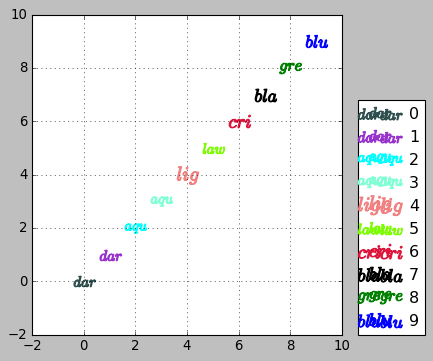

In [6]:
cor = ['darkslategrey', 'darkorchid', 'aqua', 'aquamarine', 'lightcoral', 
       'lawngreen', 'crimson', 'black', 'green', 'blue']
plt.figure(figsize=(5,5)) 
for i in range(len(cor)):
    #plt.scatter(i,i,s=200,color=cor[i],label="Data"+str(i))
    plt.scatter(i,i,s=400,color=cor[i],label=str(i),marker="$"+str(cor[i])[:3]+"$")
plt.grid()    
plt.legend(loc=(1.05,0))
plt.show()

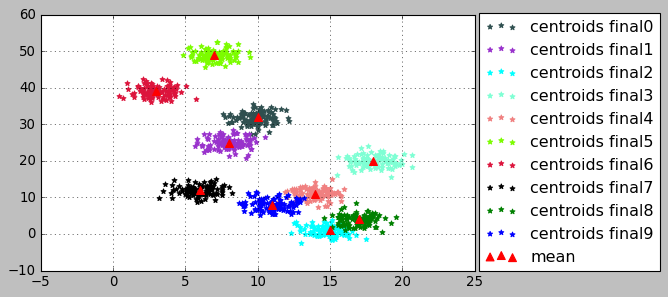

In [7]:
plt.figure(figsize=(7,4)) 
if True:
    for i in range(n_clusters):
        y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
        #y_x,y_y = easy_2D_plot(multi_gaussian_2D)
        plt.scatter(y_x,y_y,s=20,color=cor[i],label="centroids final"+str(i),marker="*",zorder=1)

plt.scatter(mean_x_array ,mean_y_array,s=50,color="red",label="mean",marker="^",zorder=10)
plt.legend(loc=(1.01,0))
plt.grid() 
plt.show()

In [8]:
np.random.uniform(0,.3,1)[0]

0.0016923855399211152

In [9]:
def mean_point_seed_2D(x,n_clusters):
    x_mean = 1*(max(x[:][0])-min(x[:][0]))
    y_mean =  1*(max(x[:][1])-min(x[:][1]))
    delta= .5    #delta= 1. work
    return [[x_mean+np.random.uniform(0,delta,1)[0],y_mean+np.random.uniform(0,delta,1)[0]] for i in range(1,n_clusters+1)]

def mean_point_seed_2D_one_pos(x,n_clusters):
    x_mean = 1*(max(x[:][0])-min(x[:][0])) 
    y_mean =  1*(max(x[:][1])-min(x[:][1])) 
    
    return [[x_mean,y_mean] for i in range(1,n_clusters+1)]

Based on 

#### file:///home/antonio/Documents/Projects/Thiago/Trigger/deterministic annealing/53005 Deterministic Annealing A Variant of Simulated Annealing and its Application to Fuzzy Clustering_xoj.pdf

53005 Deterministic Annealing A Variant of Simulated Annealing and its Application to Fuzzy Clustering_xoj.pdf

In [10]:

# Based on 
#file:///home/antonio/Documents/Projects/Thiago/Trigger/deterministic annealing/
# 53005 Deterministic Annealing A Variant of Simulated Annealing and its Application to Fuzzy Clustering_xoj.pdf

def f_u(x,y,beta,i,k):
    
    denom = sum([np.exp(-beta*squa_dist(x[k]-y[j])) for j in range(len(y))])
    num   = np.exp(-beta*squa_dist(x[k]-y[i]))
    #print("num",num)
    if denom<1.e-40 and num<1.e-40 : 
        #result = 1.0
        result = .01
    else:
        result = num/denom
        
    ##print ("f_u num",num)
    ##print("f_u num",'{:.3e}'.format(num),"| denom",'{:.3e}'.format(denom),"| num/denom",'{:.3e}'.format(num/denom),"y",y)
    #print("f_u num",'{:.3e}'.format(num),"| denom",'{:.3e}'.format(denom),"| num/denom",'{:.3e}'.format(result),"y",y)
    return result

def f_v(x,y,beta,i_clusters):
    new_y = []
    for i in i_clusters:
        denom =  sum([f_u(x,y,beta,i,k)  for k in range(len(x)) ])
        num   =  np.sum([ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ], axis=0)
        new_y.append(num)
        #print("f_v num",num)
        #print("f_v denom",denom)
        #num   =  [ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ]

    return new_y  #num  


In [12]:
n_clusters_extra = 10

x = np.copy(multi_gaussian_2D)    
y= mean_point_seed_2D(multi_gaussian_2D,n_clusters_extra)  #
y0 = np.copy(y)
print ("y",y,"\n y.shape",len(y),len(y[0]))

y1= np.copy(y)
y2= np.copy(y)

beta=.0001
evolution =[]

n_cluster = [i for i in range(n_clusters_extra)]

y [[5.229929805410273, 23.05687481623952], [4.937933904426685, 23.39850774891768], [5.153668502492837, 23.10290992679498], [5.024013496818761, 22.96806190050861], [5.31312218178593, 23.359116746496618], [4.853485058741194, 23.381244150826284], [5.123080945496775, 23.055421467370376], [5.3000120220515035, 23.33421742884043], [4.9549503401729815, 23.069225147961397], [5.3080057161775525, 23.058583855167704]] 
 y.shape 10 2


In [13]:
beta_min0=0.001;beta_max0=0.01;dbeta=0.004;
pt1 = np.arange(beta_min0,beta_max0,dbeta)
beta_min0=beta_max0;beta_max0=0.1;dbeta=0.01;
pt2 = np.arange(beta_min0,beta_max0,dbeta)
beta_min1=beta_max0;beta_max1=1.5;dbeta1=0.1;
pt3 = np.arange(beta_min1,beta_max1,dbeta1)

beta_range = np.concatenate([pt1, pt2, pt3], axis=0) 
#print(pt1, pt2, pt3)
print("min",min(beta_range),"max",max(beta_range),"len beta",len(beta_range))

min 0.001 max 1.4000000000000001 len beta 26


In [51]:
beta_range,len(beta_range)

(array([1.0e-03, 5.0e-03, 9.0e-03, 1.0e-02, 2.0e-02, 3.0e-02, 4.0e-02,
        5.0e-02, 6.0e-02, 7.0e-02, 8.0e-02, 9.0e-02, 1.0e-01, 2.0e-01,
        3.0e-01, 4.0e-01, 5.0e-01, 6.0e-01, 7.0e-01, 8.0e-01, 9.0e-01,
        1.0e+00, 1.1e+00, 1.2e+00, 1.3e+00, 1.4e+00]),
 26)

In [41]:
#print('{:.2e}'.format(beta))

In [14]:
beta_max =1.0
count = 1
y=f_v(x,y,0.00001,n_cluster)
for beta in beta_range:
    #print("beta",beta,"of ",beta_max,"y",y)
    print("beta",'{:.2e}'.format(beta),"of ",beta_max1,"left",len(beta_range)-count,end="\r")
    #len(beta_range)
    if False and beta>3.:#beta>3.:
        print(y)
    y=f_v(x,y,beta,n_cluster) # f_v(x,y,beta,i_clusters)
    evolution.append(y)
    count = count + 1
print("Done!  ===>")

Done!  ===>00 of  1.5 left 00


In [ ]:
print("Done!")

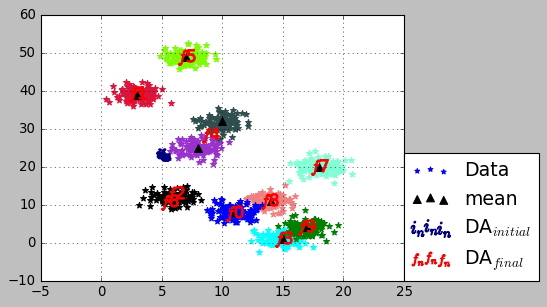

In [15]:
plt.figure(figsize=(7,4)) 
if True:
    for i in range(n_clusters):
        y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
        #y_x,y_y = easy_2D_plot(multi_gaussian_2D)
        plt.scatter(y_x,y_y,s=30,color=cor[i],marker="*",zorder=1)#,label="centroids final"+str(i)
plt.scatter([],[],s=20,color=cor[i],label="Data",marker="*",zorder=1)
plt.scatter(mean_x_array ,mean_y_array,s=50,color="black",label="mean",marker="^",zorder=10)

y_x,y_y = easy_2D_plot(y)
y0_x,y0_y = easy_2D_plot(y0)
for i in range(n_clusters_extra): 
    plt.scatter(y0_x[i],y0_y[i],s=100,color="navy",marker="$i_"+str(i)+"$",zorder=10)
plt.scatter([],[],s=190,color="navy",label="DA$_{initial}$",marker="$i_n$",zorder=10)
    
for i in range(n_clusters_extra):
    plt.scatter(y_x[i],y_y[i],s=250,color="red",marker="$f$"+str(i),zorder=10)
plt.scatter([],[],s=120,color="red",label="DA$_{final}$",marker="$f_n$",zorder=10)
#y_x,y_y = easy_2D_plot(x)             
#plt.scatter(y_x,y_y ,s=100,color="red",label="Data",marker="$o$"+str(i),zorder=10)        
        
plt.legend(loc=(1,0),fontsize=17)
plt.grid() 

plt.tight_layout()
#plt.savefig("10clusters_.pdf")
#plt.savefig("evol/10clusters.pdf")
plt.show()

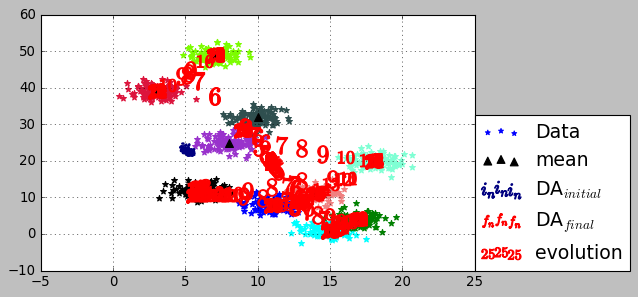

In [16]:
plt.figure(figsize=(7,4)) 
if True:
    for i in range(n_clusters):
        y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
        #y_x,y_y = easy_2D_plot(multi_gaussian_2D)
        plt.scatter(y_x,y_y,s=30,color=cor[i],marker="*",zorder=1)#,label="centroids final"+str(i)
plt.scatter([],[],s=20,color=cor[i],label="Data",marker="*",zorder=1)
plt.scatter(mean_x_array ,mean_y_array,s=50,color="black",label="mean",marker="^",zorder=10)

y_x,y_y = easy_2D_plot(y)
y0_x,y0_y = easy_2D_plot(y0)
for i in range(n_clusters_extra): 
    plt.scatter(y0_x[i],y0_y[i],s=100,color="navy",marker="$i_"+str(i)+"$",zorder=10)
plt.scatter([],[],s=190,color="navy",label="DA$_{initial}$",marker="$i_n$",zorder=10)
    
for i in range(n_clusters_extra):
    plt.scatter(y_x[i],y_y[i],s=250,color="red",marker="$f$"+str(i),zorder=10)
plt.scatter([],[],s=120,color="red",label="DA$_{final}$",marker="$f_n$",zorder=10)

for i in range(len(beta_range)):
    y_x,y_y = easy_2D_plot(evolution[i])  
    plt.scatter(y_x,y_y,s=250,color="red",marker="$"+str(i)+"$",zorder=10)    
    
plt.scatter([],[],s=150,color="red",marker="$"+str(i)+"$",zorder=10,label="evolution")  


#y_x,y_y = easy_2D_plot(x)             
#plt.scatter(y_x,y_y ,s=100,color="red",label="Data",marker="$o$"+str(i),zorder=10)        
        
plt.legend(loc=(1,0),fontsize=17)
plt.grid() 
plt.savefig("evolution0.pdf")
plt.show()

In [156]:
len(range(0,len(beta_range),10))

14

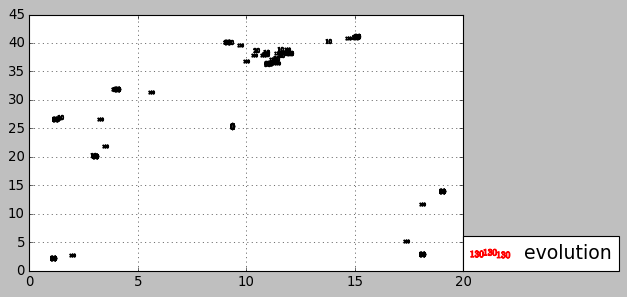

In [169]:
plt.figure(figsize=(7,4)) 

for i in range(0,len(beta_range),10):
    y_x,y_y = easy_2D_plot(evolution[i])  
    plt.scatter(y_x,y_y,s=30,color="black",marker="$"+str(i)+"$",zorder=10)    
    #plt.scatter(y_x,y_y,s=50,color="red",marker="*",zorder=10)    
    
plt.scatter([],[],s=150,color="red",marker="$"+str(i)+"$",zorder=10,label="evolution")  


#y_x,y_y = easy_2D_plot(x)             
#plt.scatter(y_x,y_y ,s=100,color="red",label="Data",marker="$o$"+str(i),zorder=10)        
        
plt.legend(loc=(1,0),fontsize=17)
plt.grid() 
plt.savefig("evolution_13_0ut.pdf")
plt.show()

### Trying another way to better visualize annealing evolution and clustering finding

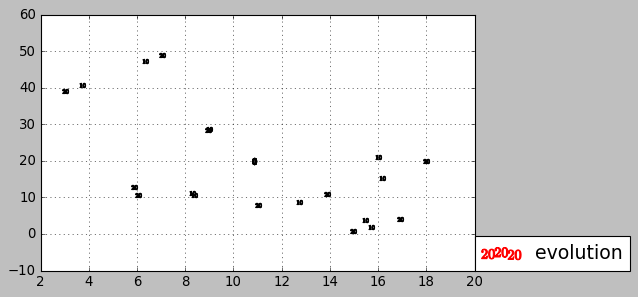

In [17]:
plt.figure(figsize=(7,4)) 

for i in range(0,len(beta_range),10):
    y_x,y_y = easy_2D_plot(evolution[i])  
    plt.scatter(y_x,y_y,s=30,color="black",marker="$"+str(i)+"$",zorder=10)    
    #plt.scatter(y_x,y_y,s=50,color="red",marker="*",zorder=10)    
    
plt.scatter([],[],s=150,color="red",marker="$"+str(i)+"$",zorder=10,label="evolution")  


#y_x,y_y = easy_2D_plot(x)             
#plt.scatter(y_x,y_y ,s=100,color="red",label="Data",marker="$o$"+str(i),zorder=10)        
        
plt.legend(loc=(1,0),fontsize=17)
plt.grid() 
plt.savefig("evolution.pdf")
plt.show()

In [18]:
print(len(evolution),len(evolution[0]),len(evolution[0][0]))
print(" ")
print(evolution[0])
print(" ")
print(evolution[0][0])
print(evolution[0][0][0])

26 10 2
 
[array([10.84110706, 20.02584709]), array([10.84092259, 20.0267266 ]), array([10.84107844, 20.02598231]), array([10.84112627, 20.02574606]), array([10.8409787 , 20.02647055]), array([10.84092179, 20.02672707]), array([10.84109682, 20.02589229]), array([10.84098864, 20.02642202]), array([10.84107342, 20.02599861]), array([10.84111425, 20.02581548])]
 
[10.84110706 20.02584709]
10.84110706359623


In [19]:
cluster = 0
dimension = 0

"""for i in range(len(evolution)):
    print(evolution[i][cluster][dimension])"""

def cluster_evol_1D(evolution_vec,cluster,dimension):    
    # construct a list with the evolution of one cluster per dimention
    return [ evolution[i][cluster][dimension] for i in range(len(evolution))] 

def cluster_evol_2D(evolution_vec,cluster,dimension):    
    # construct a list with the evolution of one cluster in two dimention
    return [ [evolution[i][cluster][0],evolution[i][cluster][1]] for i in range(len(evolution))] 
    
    
cluster0_evol_1D = cluster_evol_1D(evolution,cluster,dimension)
cluster0_evol_2D = cluster_evol_2D(evolution,cluster,dimension)
    

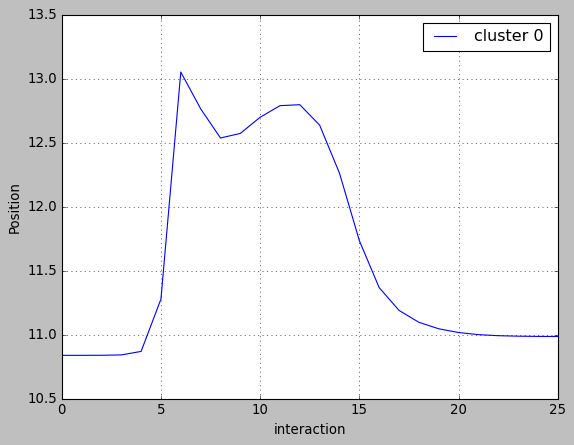

In [20]:

# Plotting first cluster axis 0

plt.plot(cluster0_evol_1D,label="cluster "+str(cluster))
plt.xlabel('interaction')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


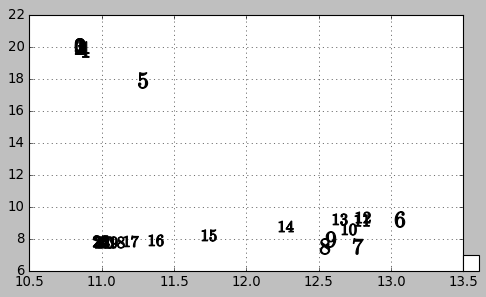

In [21]:

# Plotting the evolution in 2D

plt.figure(figsize=(7,4)) 

for i in range(0,len(cluster0_evol_2D)):
    #y_x,y_y = easy_2D_plot(cluster0_evol_2D[i])  
    y_x,y_y = cluster0_evol_2D[i][0],cluster0_evol_2D[i][1]
    plt.scatter(y_x,y_y,s=200,color="black",marker="$"+str(i)+"$",zorder=10)    
    #plt.scatter(y_x,y_y,s=50,color="red",marker="*",zorder=10)    
        
plt.legend(loc=(1,0),fontsize=17)
plt.grid() 
#plt.savefig("evolution.pdf")
plt.show()

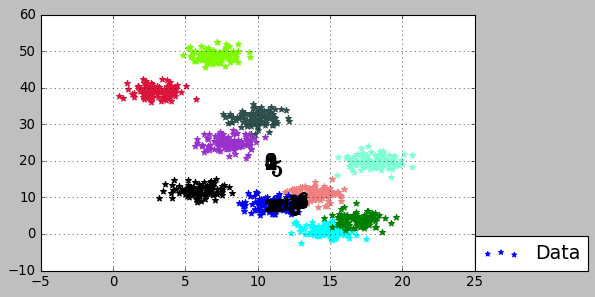

In [22]:

# Plotting the evolution in 2D with data points

plt.figure(figsize=(7,4)) 

if True:
    for i in range(n_clusters):
        y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
        #y_x,y_y = easy_2D_plot(multi_gaussian_2D)
        plt.scatter(y_x,y_y,s=30,color=cor[i],marker="*",zorder=1)#,label="centroids final"+str(i)
plt.scatter([],[],s=20,color=cor[i],label="Data",marker="*",zorder=1)


for i in range(0,len(cluster0_evol_2D)):
    #y_x,y_y = easy_2D_plot(cluster0_evol_2D[i])  
    y_x,y_y = cluster0_evol_2D[i][0],cluster0_evol_2D[i][1]
    plt.scatter(y_x,y_y,s=200,color="black",marker="$"+str(i)+"$",zorder=10)    
    #plt.scatter(y_x,y_y,s=50,color="red",marker="*",zorder=10)    
    
#plt.scatter([],[],s=150,color="red",marker="$"+str(i)+"$",zorder=10,label="evolution")  


#y_x,y_y = easy_2D_plot(x)             
#plt.scatter(y_x,y_y ,s=100,color="red",label="Data",marker="$o$"+str(i),zorder=10)        
        
plt.legend(loc=(1,0),fontsize=17)
plt.grid() 
#plt.savefig("evolution.pdf")
plt.show()

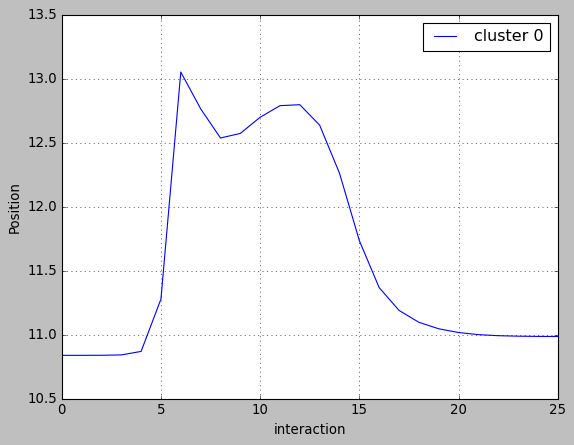

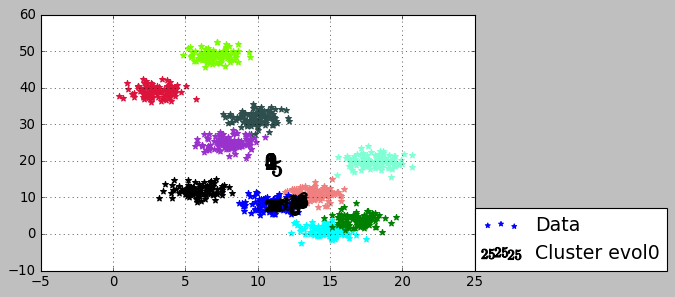

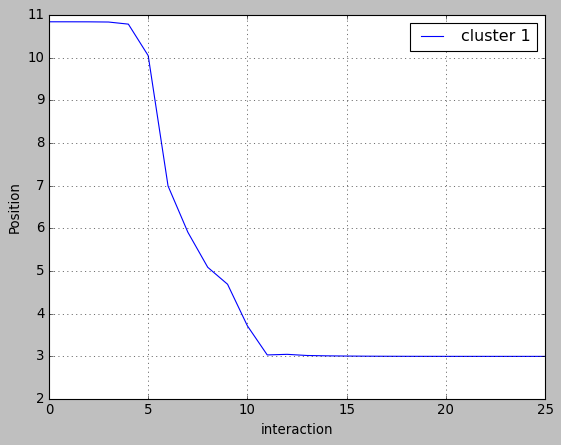

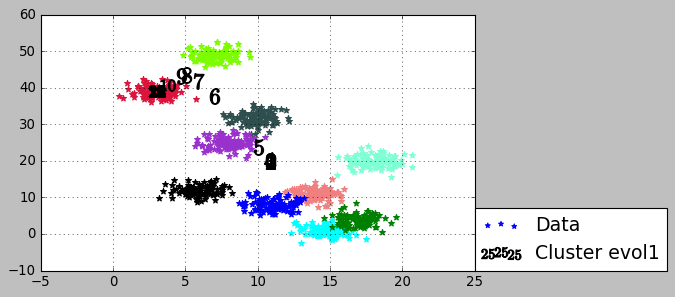

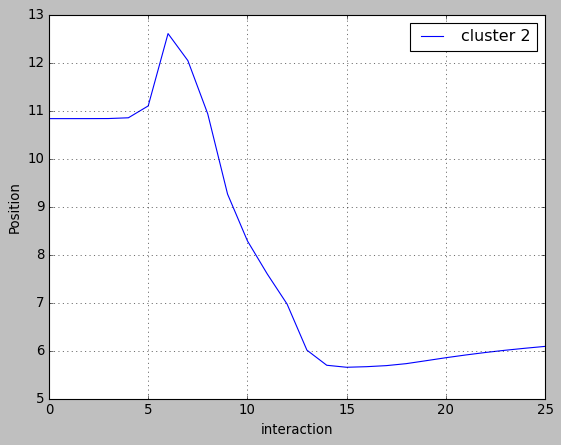

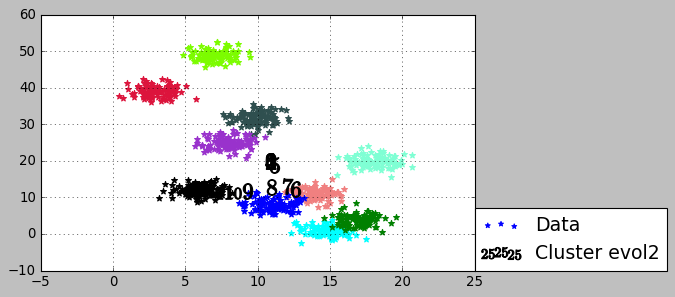

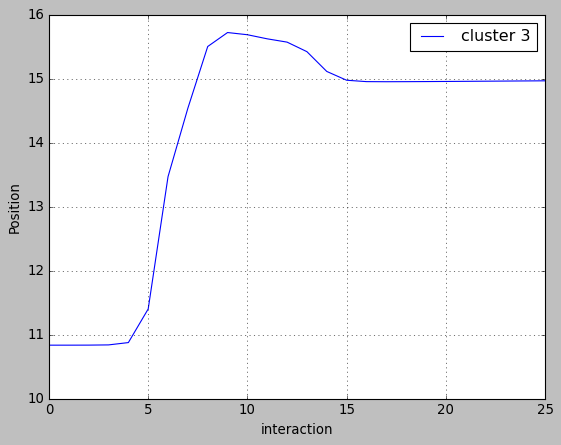

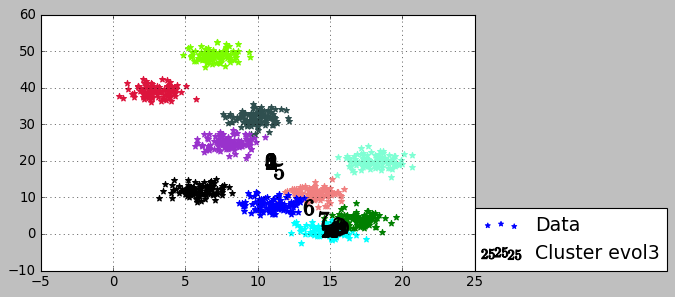

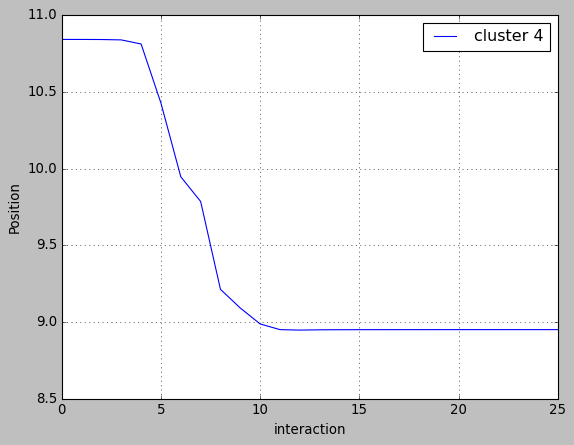

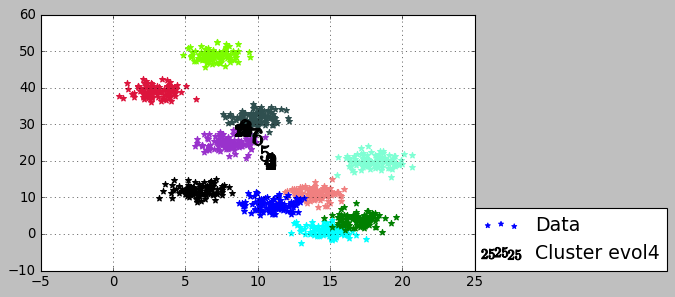

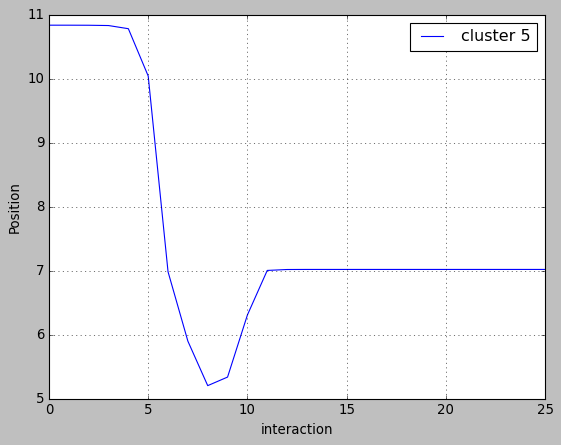

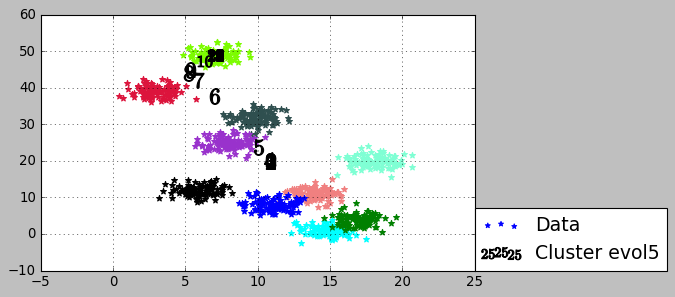

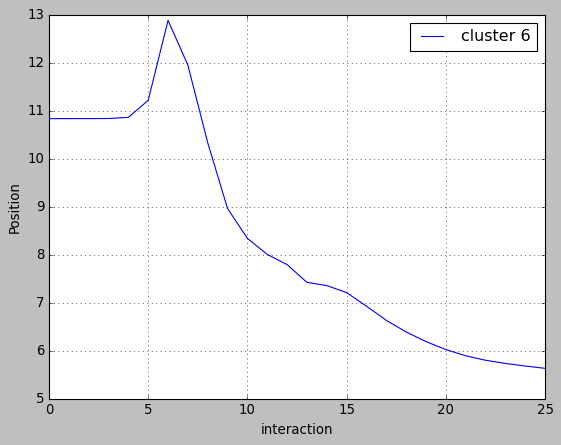

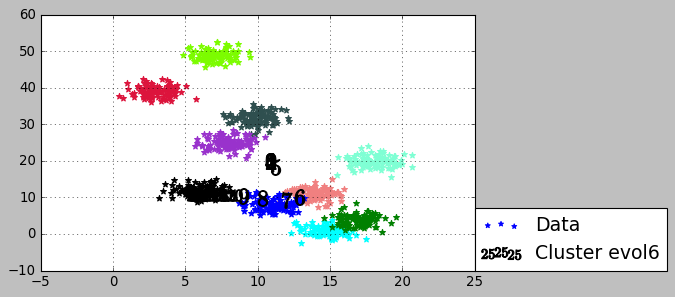

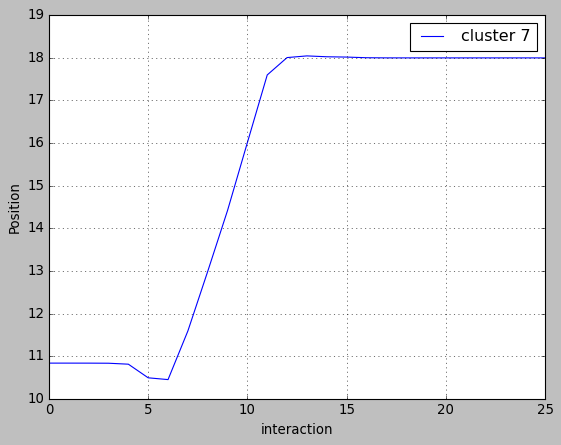

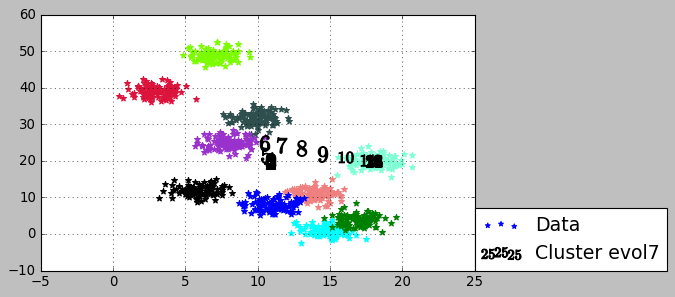

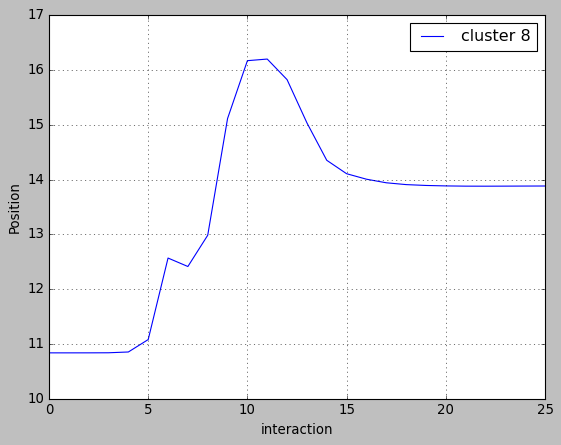

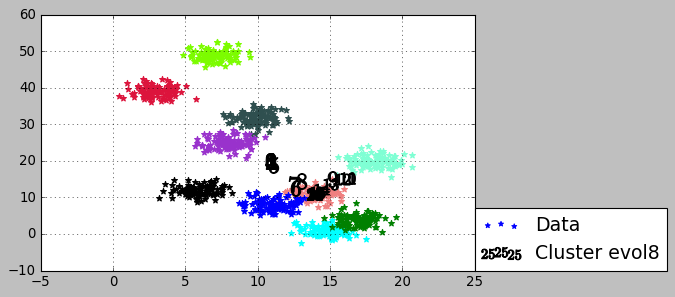

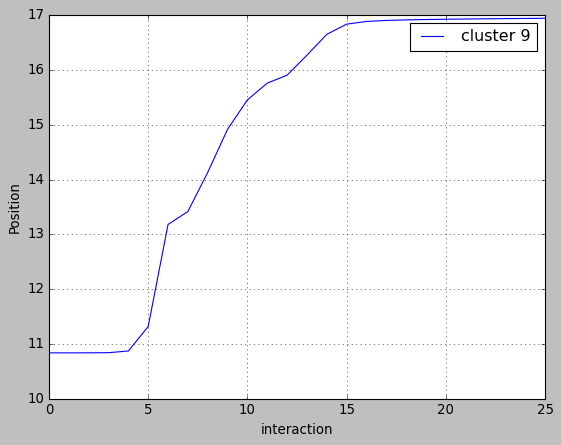

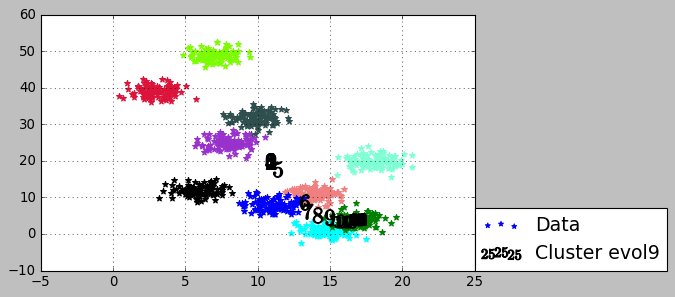

In [23]:
cluster = 0
dimension = 0
for cluster in range(10):
    """for i in range(len(evolution)):
        print(evolution[i][cluster][dimension])"""

    def cluster_evol_1D(evolution_vec,cluster,dimension):    
        return [ evolution[i][cluster][dimension] for i in range(len(evolution))] 

    def cluster_evol_2D(evolution_vec,cluster,dimension):    
        return [ [evolution[i][cluster][0],evolution[i][cluster][1]] for i in range(len(evolution))] 


    cluster0_evol_1D = cluster_evol_1D(evolution,cluster,dimension)
    cluster0_evol_2D = cluster_evol_2D(evolution,cluster,dimension)

    #*******************************#    
    #*******************************#  


    plt.plot(cluster0_evol_1D,label="cluster "+str(cluster))
    plt.xlabel('interaction')
    plt.ylabel('Position')
    plt.legend()
    plt.grid()
    plt.savefig("evol/evolution_1D_cluster"+str(cluster)+".pdf")
    plt.savefig("evol/evolution_1D_cluster"+str(cluster)+".png")
    plt.show()

    #*******************************#   
    #*******************************#  




    plt.figure(figsize=(7,4)) 

    if True:
        for i in range(n_clusters):
            y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
            #y_x,y_y = easy_2D_plot(multi_gaussian_2D)
            plt.scatter(y_x,y_y,s=30,color=cor[i],marker="*",zorder=1)#,label="centroids final"+str(i)
    plt.scatter([],[],s=20,color=cor[i],label="Data",marker="*",zorder=1)


    for i in range(0,len(cluster0_evol_2D)):
        #y_x,y_y = easy_2D_plot(cluster0_evol_2D[i])  
        y_x,y_y = cluster0_evol_2D[i][0],cluster0_evol_2D[i][1]
        plt.scatter(y_x,y_y,s=200,color="black",marker="$"+str(i)+"$",zorder=10)    
        #plt.scatter(y_x,y_y,s=50,color="red",marker="*",zorder=10)    

    plt.scatter([],[],s=150,color="black",marker="$"+str(i)+"$",zorder=10,label="Cluster evol"+str(cluster))  


    #y_x,y_y = easy_2D_plot(x)             
    #plt.scatter(y_x,y_y ,s=100,color="red",label="Data",marker="$o$"+str(i),zorder=10)        

    plt.legend(loc=(1,0),fontsize=17)
    plt.grid() 
    #plt.savefig("evol/evolution_cluster"+str(cluster)+".pdf")
    #plt.savefig("evol/evolution_cluster"+str(cluster)+".png")
    plt.show()

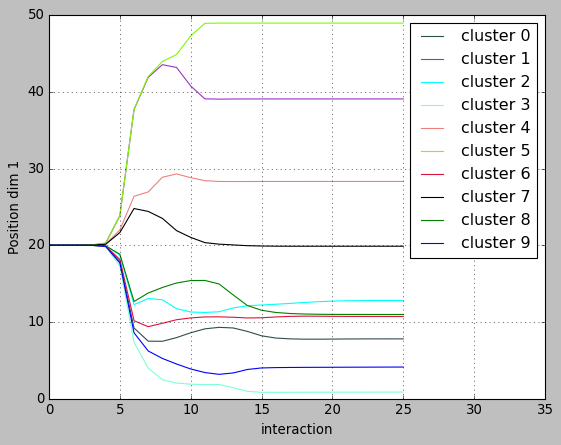

In [24]:
cluster = 0
dimension = 1
for cluster in range(10):
    """for i in range(len(evolution)):
        print(evolution[i][cluster][dimension])"""

    def cluster_evol_1D(evolution_vec,cluster,dimension):    
        return [ evolution[i][cluster][dimension] for i in range(len(evolution))] 

    def cluster_evol_2D(evolution_vec,cluster,dimension):    
        return [ [evolution[i][cluster][0],evolution[i][cluster][1]] for i in range(len(evolution))] 


    cluster0_evol_1D = cluster_evol_1D(evolution,cluster,dimension)
    cluster0_evol_2D = cluster_evol_2D(evolution,cluster,dimension)

    #*******************************#    
    #*******************************#  


    plt.plot(cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster])
plt.xlabel('interaction')
plt.ylabel('Position dim '+str(dimension))
plt.legend(loc=0)
plt.xlim(0,35)
plt.grid()
#plt.savefig("evol/evolution_1Dx_cluster"+str(cluster)+"_dim_"+str(dimension)+".pdf")
#plt.savefig("evol/evolution_1Dx_cluster"+str(cluster)+str(cluster)+"_dim_"+str(dimension)+".png")
plt.show()

----------------------------------------------------------

### DA Free energy <a class="anchor" id="det-annel-trial-11"></a>

---------------------------------------------------------------------

---------------------------------------------------------------------

### DA Free energy

---------------------------------------------------------------------

Including fase transition and free energy calculation

In [4]:
from utils_func_DA1 import *

In [81]:

mean = (1, 7)
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal(mean, cov, (100, 2))

mean1 = (1, 20)
cov1 = [[1, 0], [0, 1]]
x1 = np.random.multivariate_normal(mean1, cov1, (100, 2))

mean2= (5, 15)
cov2 = [[1, 0], [0, 1]]
x2 = np.random.multivariate_normal(mean2, cov2, (100, 2)) 

#print("x.shape",x.shape,x.shape[0],"\n x",x[1][0])

multi_gaussian_2D = [x[0][0]]
multi_gaussian_2D1 = [x1[0][0]]
multi_gaussian_2D2 = [x2[0][0]]

mean_x_array = []
mean_y_array = []

n_clusters = 6
for i in range(n_clusters):
    mean_x = int(np.random.uniform(1.,20,1))
    mean_y = int(np.random.uniform(1.,50,1))
    mean = (mean_x, mean_y)
    cov = [[1, 0], [0, 2]]
    x = np.random.multivariate_normal(mean, cov, (100, 2)) 
    mean_x_array.append([mean_x])
    mean_y_array.append([mean_y])
    globals()['gaussian_2D_cluster%s' % i] = [[x[k][0][0],x[k][0][1]] for k in range(len(x)) ]
    for j in range(1,x.shape[0]):
        multi_gaussian_2D = np.concatenate([multi_gaussian_2D, [x[j][0]]], axis=0) 

print("multi_gaussian_2D.shape",multi_gaussian_2D.shape)
print("Done!")

multi_gaussian_2D.shape (595, 2)
Done!


In [82]:

# Based on 
#file:///home/antonio/Documents/Projects/Thiago/Trigger/deterministic annealing/
# 53005 Deterministic Annealing A Variant of Simulated Annealing and its Application to Fuzzy Clustering_xoj.pdf

def f_u(x,y,beta,i,k):
    
    denom = sum([np.exp(-beta*squa_dist(x[k]-y[j])) for j in range(len(y))])
    num   = np.exp(-beta*squa_dist(x[k]-y[i]))
    #print("num",num)
    if denom<1.e-40 and num<1.e-40: 
        #result = 1.0
        result = .01
    else:
        result = num/denom
        
    ##print ("f_u num",num)
    ##print("f_u num",'{:.3e}'.format(num),"| denom",'{:.3e}'.format(denom),"| num/denom",'{:.3e}'.format(num/denom),"y",y)
    #print("f_u num",'{:.3e}'.format(num),"| denom",'{:.3e}'.format(denom),"| num/denom",'{:.3e}'.format(result),"y",y)
    return result

def f_v(x,y,beta,i_clusters):
    new_y = []
    for i in i_clusters:
        denom =  sum([f_u(x,y,beta,i,k)  for k in range(len(x)) ])
        num   =  np.sum([ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ], axis=0)
        new_y.append(num)
        #print("f_v num",num)
        #print("f_v denom",denom)
        #num   =  [ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ]

    return new_y  #num  

def HelmHoltz(x,y,beta):
    #k=0
    #return sum([np.exp(-beta*squa_dist(x[k]-y[i])) for i in range (len(y))])    
    return  -1.*(1./beta)*sum([np.log10(sum([beta*np.exp(-beta*squa_dist(x[k]-y[i])) for i in range (len(y))])) for k in range(len(x))]) #     ..........

from numpy import linalg as LA
def Cov(x,y,beta,k): 
    
    #c= x[j]-y[k] 
    #c_T=np.copy(c).reshape((-1, 1))
    #f_u(x,y,beta,i,k)
    
    covar = [ f_u(x,y,beta,k,j)*(x[j]-y[k])*(x[j]-y[k]).reshape((-1, 1))  for j in range(len(x))]    #..............
    soma = covar[0]
    for i in range(1,len(covar)):
        soma = soma + covar[i]
    value, vector = LA.eig(soma)    
    
    return   np.sort(value)[0]  

 \begin{equation*}
F= -\frac{1}{\beta} \sum_{x} \log Z_x.
\label{eq:F} \tag{3}
\end{equation*}
   
   
   
Using a squared distance cost 
\begin{equation*}
E_x= |x-y_j|^2. 
\label{eq:E_x}   \tag{4}
\end{equation*} 


Substituting $\eqref{eq:Z_x},\eqref{eq:E_x}$ in $\eqref{eq:F}$ gives 
\begin{equation*}
F=  -\frac{1}{\beta} \sum_{x} \log \left(\sum_{k=1}^c \exp(-\beta |x-y_j|^2) \right). 
\label{eq:F2}   \tag{6}
\end{equation*}

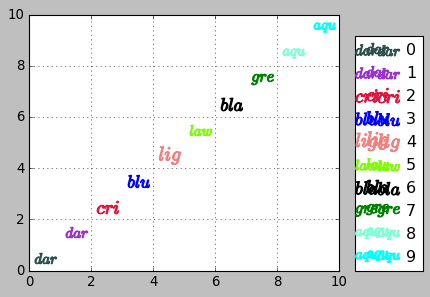

In [103]:
#**********************************************************************#
#                                                                      #
#                                                                      #
#**********************************************************************#
    
cor = ['darkslategrey', 'darkorchid', 'crimson', 'blue', 'lightcoral', 
       'lawngreen', 'black', 'green', 'aquamarine', 'aqua']
plt.figure(figsize=(5,4)) 
for i in range(len(cor)):
    #plt.scatter(i,i,s=200,color=cor[i],label="Data"+str(i))
    plt.scatter(i+0.5,i+0.5,s=400,color=cor[i],label=str(i),marker="$"+str(cor[i])[:3]+"$")
plt.grid()    
plt.legend(loc=(1.05,0))
plt.show()    


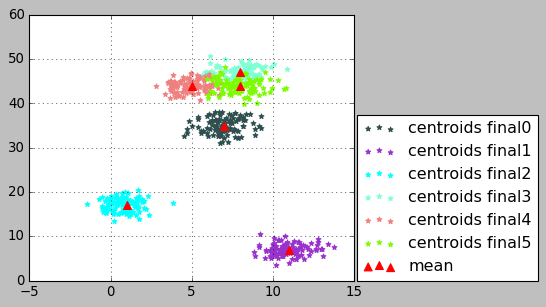

In [86]:
plt.figure(figsize=(7,4)) 
if True:
    for i in range(n_clusters):
        y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
        #y_x,y_y = easy_2D_plot(multi_gaussian_2D)
        plt.scatter(y_x,y_y,s=20,color=cor[i],label="centroids final"+str(i),marker="*",zorder=1)

plt.scatter(mean_x_array ,mean_y_array,s=50,color="red",label="mean",marker="^",zorder=10)
plt.legend(loc=(1.01,0))
plt.grid() 
plt.tight_layout()
plt.savefig("test_I/cluster0.pdf")
plt.show() 

In [111]:
n_clusters_extra = n_clusters

x = np.copy(multi_gaussian_2D)    
y= mean_point_seed_2D(multi_gaussian_2D,n_clusters_extra)  #
y0 = np.copy(y)
print ("y",y,"\n y.shape",len(y),len(y[0]))

y1= np.copy(y)
y2= np.copy(y)

evolution =[]

n_cluster = [i for i in range(n_clusters_extra)]


y [[4.422933754132105, 28.53060040414661], [4.654194489387802, 28.601795125511433], [4.376108502558271, 28.663782450828773], [4.511194980203253, 28.370231242172792], [4.4239728751819545, 28.26263829409482], [4.59908755270743, 28.4616548499488]] 
 y.shape 6 2


In [112]:
beta_min0=0.001;beta_max0=0.01;dbeta=0.001;
pt1 = np.arange(beta_min0,beta_max0,dbeta)
print("pt1",pt1,"len",len(pt1))
beta_min0=beta_max0;beta_max0=0.1;dbeta=0.001;
pt2 = np.arange(beta_min0,beta_max0,dbeta)
print("pt2",pt2,"len",len(pt2))
beta_min1=beta_max0;beta_max1=10.5;dbeta1=0.05;
pt3 = np.arange(beta_min1,beta_max1,dbeta1)
print("pt3",pt3,"len",len(pt3))

beta_range = np.concatenate([pt1, pt2, pt3], axis=0) 
#print(pt1, pt2, pt3)
print("min",min(beta_range),"| max",max(beta_range),"| len beta",len(beta_range))   

pt1 [0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009] len 9
pt2 [0.01  0.011 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021
 0.022 0.023 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033
 0.034 0.035 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045
 0.046 0.047 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057
 0.058 0.059 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069
 0.07  0.071 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081
 0.082 0.083 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093
 0.094 0.095 0.096 0.097 0.098 0.099 0.1  ] len 91
pt3 [ 0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65
  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25
  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85
  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35  2.4   2.45
  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95  3.    3.05

In [90]:
len(beta_range)

308

In [114]:
beta_max = 1.0
count = 1
Free_energy = []
covariance0 = []
covariance1 = []
covariance2 = []
covariance3 = []
covariance4 = []
beta_initial = 0.0001
beta = beta_initial 
y=f_v(x,y,beta_initial,n_cluster)
Free_energy.append(HelmHoltz(x,y,beta_initial))

for i_cluster in range(n_clusters_extra):
    #covariance0.append(Cov(x,y,beta,0))
    globals()['covariance%s' % i_cluster] = []
    globals()['covariance%s' % i_cluster].append(Cov(x,y,beta,i_cluster))
"""
covariance0.append(Cov(x,y,beta,0))
covariance1.append(Cov(x,y,beta,1))
covariance2.append(Cov(x,y,beta,2))
covariance3.append(Cov(x,y,beta,3))
covariance4.append(Cov(x,y,beta,4))"""

for beta in beta_range:
    #print("beta",beta,"of ",beta_max,"y",y)
    print("beta",'{:.2e}'.format(beta),"of ",beta_max1,"| left",len(beta_range)-count,end="\r")
    #len(beta_range)
    if False and beta>3.:#beta>3.:
        print(y)
    y=f_v(x,y,beta,n_cluster) # f_v(x,y,beta,i_clusters)
    Free_energy.append(HelmHoltz(x,y,beta))
    for i_cluster in range(n_clusters_extra):
        #covariance0.append(Cov(x,y,beta,0))
        globals()['covariance%s' % i_cluster].append(Cov(x,y,beta,i_cluster))
        #covariance1.append(Cov(x,y,beta,1))
        #covariance2.append(Cov(x,y,beta,2))
        #covariance3.append(Cov(x,y,beta,3))
        #covariance4.append(Cov(x,y,beta,4))
    evolution.append(y)
    count = count + 1


/home/antonio/anaconda3/envs/MLBase/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


In [104]:
print("Done!")    

Done!


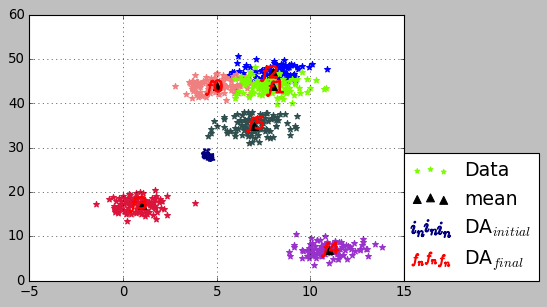

In [115]:
plt.figure(figsize=(7,4)) 
if True:
    for i in range(n_clusters):
        y_x,y_y = easy_2D_plot(globals()['gaussian_2D_cluster%s' % i] )    
        #y_x,y_y = easy_2D_plot(multi_gaussian_2D)
        plt.scatter(y_x,y_y,s=30,color=cor[i],marker="*",zorder=1)#,label="centroids final"+str(i)
plt.scatter([],[],s=20,color=cor[i],label="Data",marker="*",zorder=1)
plt.scatter(mean_x_array ,mean_y_array,s=50,color="black",label="mean",marker="^",zorder=10)

y_x,y_y = easy_2D_plot(y)
y0_x,y0_y = easy_2D_plot(y0)
for i in range(n_clusters_extra): 
    plt.scatter(y0_x[i],y0_y[i],s=100,color="navy",marker="$i_"+str(i)+"$",zorder=10)
plt.scatter([],[],s=190,color="navy",label="DA$_{initial}$",marker="$i_n$",zorder=10)
    
for i in range(n_clusters_extra):
    plt.scatter(y_x[i],y_y[i],s=250,color="red",marker="$f$"+str(i),zorder=10)
plt.scatter([],[],s=120,color="red",label="DA$_{final}$",marker="$f_n$",zorder=10)
#y_x,y_y = easy_2D_plot(x)             
#plt.scatter(y_x,y_y ,s=100,color="red",label="Data",marker="$o$"+str(i),zorder=10)        
        
plt.legend(loc=(1,0),fontsize=17)
plt.grid() 

plt.tight_layout()
#plt.savefig("clusters.pdf")
#plt.savefig("evol/clusters_new.pdf")
plt.savefig("test_I/clusters_new.pdf")

plt.show()  

In [38]:
len(Free_energy),len(beta_range)

(309, 308)

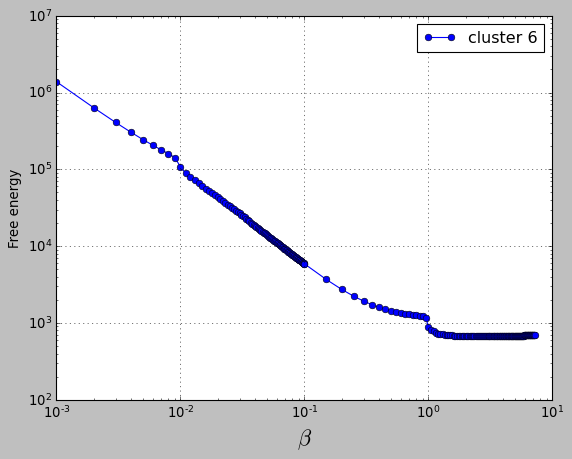

In [116]:
# Plotting first cluster axis 0

plt.plot(beta_range,Free_energy[1:],label="cluster "+str(n_clusters), marker='o')
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('Free energy')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()

plt.savefig("test_I/clusters_free_energy_beta_loglog.pdf")
#plt.savefig("evol/beta_free_energy_loglog_19:24.pdf")
plt.show()   

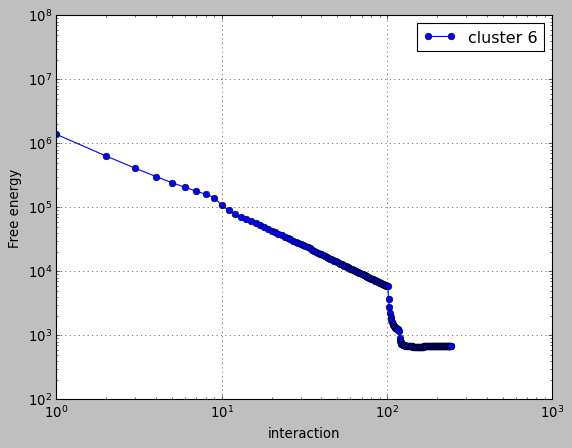

In [117]:
# Plotting first cluster axis 0

plt.plot(Free_energy[:],label="cluster "+str(n_clusters), marker='o')
plt.xlabel('interaction')
plt.ylabel('Free energy')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()

plt.savefig("test_I/clusters_free_energy_int_loglog.pdf")
#plt.savefig("evol/int_free_energy_19:24.pdf")
plt.show()   

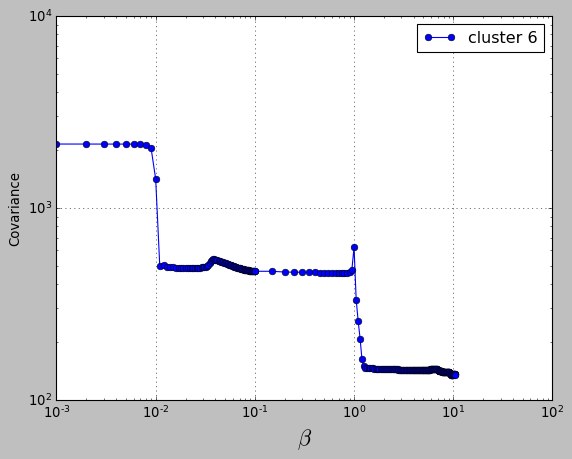

In [118]:
# Plotting first cluster axis 0
lambda2 = [2.*covariance0[i] for i in range(len(covariance0[1:]))]
plt.plot(beta_range,lambda2,label="cluster "+str(n_clusters), marker='o')
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('Covariance')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()

plt.savefig("test_I/clusters_covar_beta_loglog.pdf")
#plt.savefig("evol/beta_covar_loglog_19:24.pdf")
plt.show()   



In [50]:
covariance0[0]

800.5568360567472

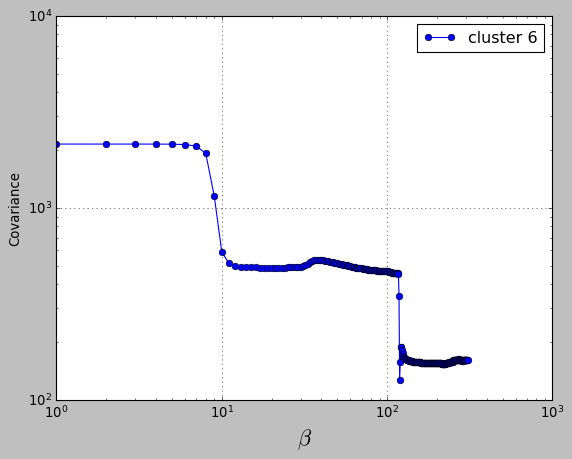

In [119]:
# Plotting first cluster axis 0
lambda2 = [2.*covariance1[i] for i in range(len(covariance0[1:]))]
plt.plot(lambda2,label="cluster "+str(n_clusters), marker='o')
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('Covariance')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()

plt.savefig("test_I/clusters_covar1_beta_loglog.pdf")
#plt.savefig("evol/beta_covar_loglog_19:24.pdf")
plt.show()   



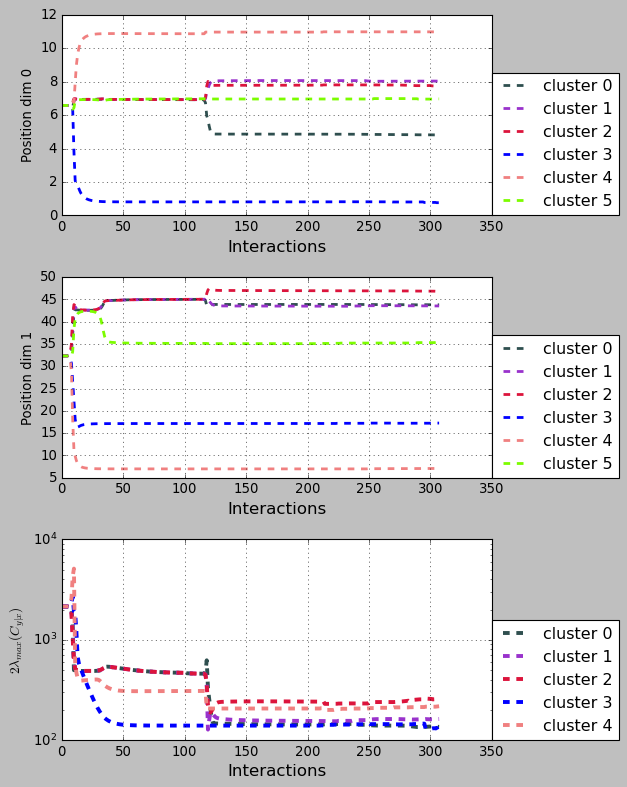

In [120]:
cluster = 0
dimension = 0

def cluster_evol_1D(evolution_vec,cluster,dimension):    
        return [ evolution[i][cluster][dimension] for i in range(len(evolution))] 

def cluster_evol_2D(evolution_vec,cluster,dimension):    
    return [ [evolution[i][cluster][0],evolution[i][cluster][1]] for i in range(len(evolution))] 


fig = plt.figure(figsize = (8, 10))

plt.subplot(3, 1, 1)


for cluster in range(n_clusters_extra):
    """for i in range(len(evolution)):
        print(evolution[i][cluster][dimension])"""

    

    cluster0_evol_1D = cluster_evol_1D(evolution,cluster,dimension)
    cluster0_evol_2D = cluster_evol_2D(evolution,cluster,dimension)

    #*******************************#    
    #*******************************#  


    plt.plot(cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster],lw=2.5, linestyle="--") #.., marker='o'
plt.xlabel('Interactions',fontsize=15)
plt.ylabel('Position dim '+str(dimension))
#plt.legend(loc=0)
plt.legend(loc=(1,0))
#plt.xlim(0,35)
plt.grid()
#plt.savefig("evol/evolution_1Dx_cluster"+str(cluster)+"_dim_"+str(dimension)+"_19:24.pdf")
#plt.savefig("evol/evolution_1Dx_cluster"+str(cluster)+str(cluster)+"_dim_"+str(dimension)+"_19:24.png")

plt.subplot(3, 1, 2)
dimension =1
for cluster in range(n_clusters_extra):
    """for i in range(len(evolution)):
        print(evolution[i][cluster][dimension])"""

    

    cluster0_evol_1D = cluster_evol_1D(evolution,cluster,dimension)
    cluster0_evol_2D = cluster_evol_2D(evolution,cluster,dimension)

    #*******************************#    
    #*******************************#  


    plt.plot(cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster],lw=2.5, linestyle="--") #.., marker='o'
plt.xlabel('Interactions',fontsize=15)
plt.ylabel('Position dim '+str(dimension))
#plt.legend(loc=0)
plt.legend(loc=(1,0))
#plt.xlim(0,35)
plt.grid()

plt.subplot(3, 1, 3)

for cluster in range(n_clusters_extra-1):
    #globals()['covariance%s' % i][0]
    lambda2 = [2.*globals()['covariance%s' % cluster][i] for i in range(len(covariance0[1:]))]
    plt.plot(lambda2,label="cluster "+str(cluster),color=cor[cluster], linestyle="--",lw=3.5)#, marker='o'
plt.xlabel('Interactions',fontsize=15)
plt.ylabel(r'$2\lambda_{max}(C_{y|x})$')
plt.yscale('log')
#plt.xscale('log')
plt.legend(loc=(1,0))
plt.grid()
plt.tight_layout()
plt.savefig("test_I/clusters_covar_int_loglog_three.pdf")
#plt.savefig("Covar1.pdf")
plt.show()

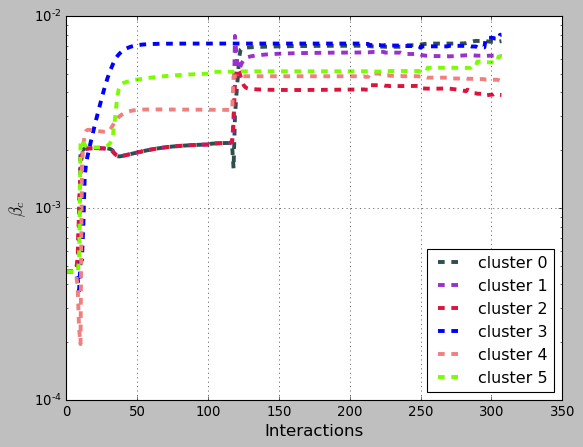

In [122]:
for cluster in range(n_clusters_extra):
    #globals()['covariance%s' % i][0]
    lambda2 = [1./(2.*globals()['covariance%s' % cluster][i]) for i in range(len(covariance0[1:]))]
    plt.plot(lambda2,label="cluster "+str(cluster),color=cor[cluster], linestyle="--",lw=3.5)#, marker='o'
plt.xlabel('Interactions',fontsize=15)
plt.ylabel(r'$\beta_{c}$',fontsize=15)
plt.yscale('log')
#plt.xscale('log')
plt.legend(loc="best")
plt.grid()
#plt.savefig("Covar1.pdf")
plt.show()

#### Calculating first and second derivative

In [44]:
#beta_range[:3],Free_energy[1:4],x_range[:4],max(beta_range)

(array([0.001, 0.002, 0.003]),
 [1197244.3053476473, 551933.4270368053, 357486.338103852],
 array([[1.75641432, 5.25726508],
        [1.75741687, 5.2923543 ],
        [1.75841942, 5.32744351],
        [1.75942198, 5.36253272]]),
 10.450000000000003)

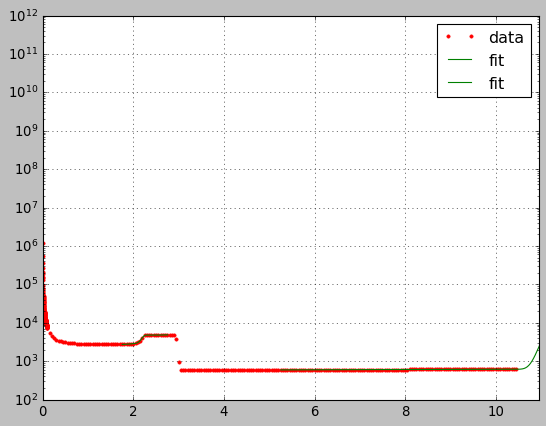

In [64]:
from scipy.interpolate import UnivariateSpline

#beta_range,Free_energy[1:]
#y_spl = UnivariateSpline(x,y,s=0,k=4)
y_spl = UnivariateSpline(beta_range,Free_energy[1:],s=0,k=5)


#plt.semilogy(x,y,'ro',label = 'data')
plt.semilogy(beta_range,Free_energy[1:],'r.',label = 'data')
x_range = np.linspace(x[0],x[-1],1000)
plt.plot(x_range,y_spl(x_range),'g-',label = 'fit')
plt.xlim(0,max(beta_range)+0.5)

plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

In [59]:
#print(min(y_spl_2d))
#print(min(y_spl_2d(x_range)))
print(y_spl_2d(x_range))

[[-8.15629621e+03 -4.12107774e+01]
 [-8.43125823e+03  9.99211608e+01]
 [-8.65498287e+03  9.56107349e+00]
 ...
 [-5.59783543e+03  1.24499069e+10]
 [-5.12239294e+03  1.24938104e+10]
 [-4.60114629e+03  1.25378169e+10]]


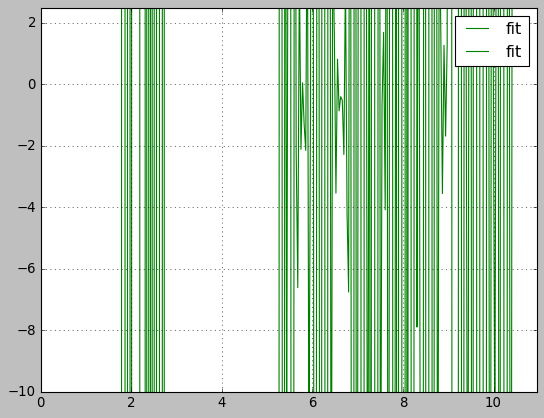

In [67]:
y_spl_2d = y_spl.derivative(n=2)

plt.plot(x_range,y_spl_2d(x_range),'g-',label = 'fit')
plt.xlim(0,max(beta_range)+0.5)
plt.ylim(-10,2.5)
#plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

In [71]:
dy=np.diff(Free_energy[1:],1)
dx=np.diff(beta_range,1)
yfirst=dy/dx

xfirst=0.5*(beta_range[:-1]+beta_range[1:])

dyfirst=np.diff(yfirst,1)
dxfirst=np.diff(xfirst,1)
ysecond=dyfirst/dxfirst

xsecond=0.5*(xfirst[:-1]+xfirst[1:])

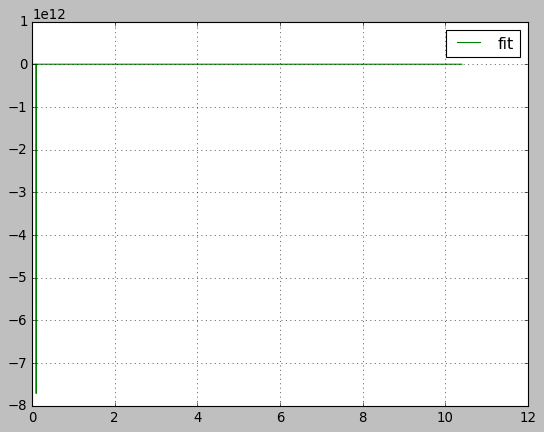

In [74]:
plt.plot(beta_range[:-1],yfirst,'g-',label = 'fit')
#plt.xlim(0,max(beta_range)+0.5)
#plt.ylim(-10,2.5)
#plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

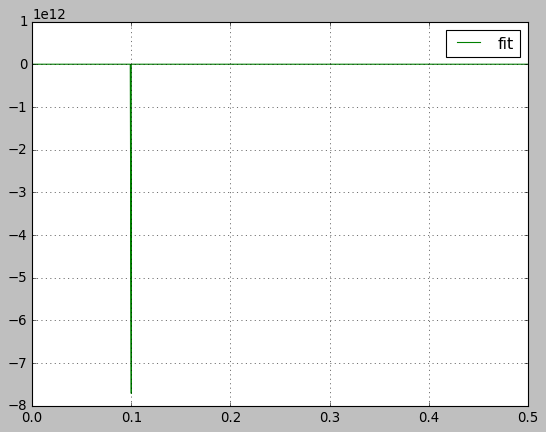

In [77]:
plt.plot(beta_range[:-1],yfirst,'g-',label = 'fit')
plt.xlim(0,.5)
#plt.ylim(-10,2.5)
#plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

In [79]:
max(ysecond),min(ysecond)

(308591826109276.75, -1.5429591254494136e+16)

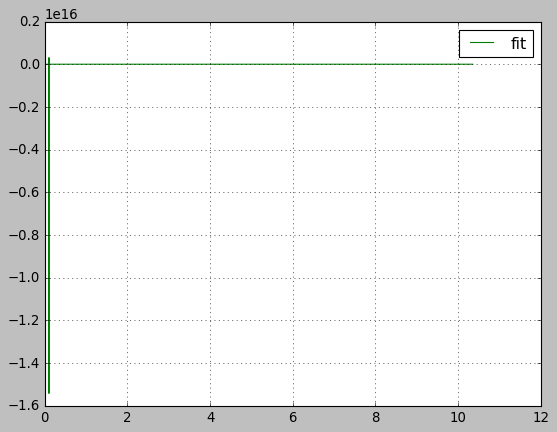

In [78]:
plt.plot(beta_range[:-2],ysecond,'g-',label = 'fit')
#plt.xlim(0,max(beta_range)+0.5)
#plt.ylim(-10,2.5)
#plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

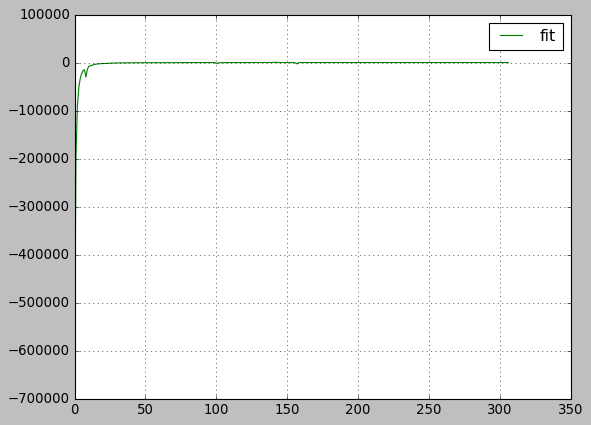

In [80]:
plt.plot(dy,'g-',label = 'fit')
#plt.xlim(0,max(beta_range)+0.5)
#plt.ylim(-10,2.5)
#plt.yscale('log')
plt.legend()
plt.grid()

NameError: name 'y' is not defined

In [ ]:
# Plotting first cluster axis 0

plt.plot(Free_energy[:],label="cluster "+str(n_clusters), marker='o')
plt.xlabel('interaction')
plt.ylabel('Free energy')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()
#plt.savefig("evol/int_free_energy_19:24.pdf")
plt.show()   

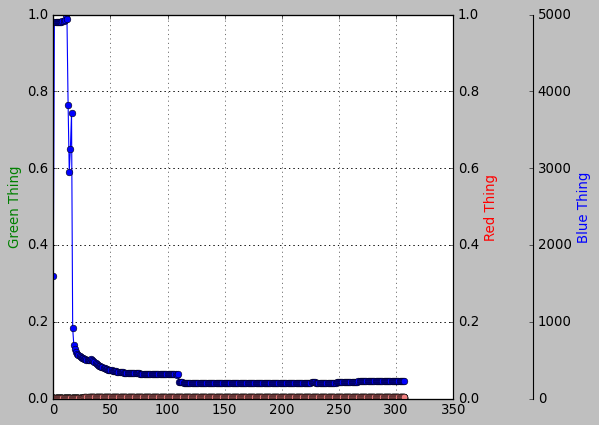

In [69]:
import matplotlib.pyplot as plt
import numpy as np
# To make things reproducible...
np.random.seed(1977)

fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)


# And finally we get to plot things...
colors = ('Green', 'Red', 'Blue')
count =0
for ax, color in zip(axes, colors):
    if count ==0:
        lambda2 = [2.*covariance0[i] for i in range(len(covariance0[1:]))]
        plt.plot(lambda2,label="cluster "+str(n_clusters), marker='o')
        #ax.set_ylabel('%s Thing' % color, color=color)
        #ax.tick_params(axis='y', colors=color)
        ax.grid(True)
        count = count +1
        
    else:
        for cluster in range(n_clusters_extra):
            
            def cluster_evol_1D(evolution_vec,cluster,dimension):    
                return [ evolution[i][cluster][dimension] for i in range(len(evolution))] 
            def cluster_evol_2D(evolution_vec,cluster,dimension):    
                return [ [evolution[i][cluster][0],evolution[i][cluster][1]] for i in range(len(evolution))] 

            
            
            
            cluster0_evol_1D = cluster_evol_1D(evolution,cluster,dimension)
            cluster0_evol_2D = cluster_evol_2D(evolution,cluster,dimension)
            plt.plot(cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster], marker='o') #.
             #data = np.random.random(1) * np.random.random(10)
                #ax.plot(data, marker='o', linestyle='none', color=color)
        #ax.set_ylabel('%s Thing' % color, color=color)
        #ax.tick_params(axis='y', colors=color)
        ax.grid(True)
        count = count +1        
        
    
    #data = np.random.random(1) * np.random.random(10)
    #ax.plot(data, marker='o', linestyle='none', color=color)
    ax.set_ylabel('%s Thing' % color, color=color)
    #ax.tick_params(axis='y', colors=color)
    ax.grid(True)
    count = count +1
#axes[0].set_xlabel('X-axis')



In [111]:
#globals()['gaussian_2D_cluster%s' % i]
for i in range(5):
    print('covariance%s' % i,globals()['covariance%s' % i][0])

covariance0 119.02149178090858
covariance1 119.02149178090858
covariance2 119.02149178090858
covariance3 119.02149178090858
covariance4 119.02149178090858


In [93]:
1./lambda2[0],"beta",'{:.2e}'.format(1./lambda2[0]),covariance2[0]

(0.002504041765823916, 'beta', '2.50e-03', 199.67718063819228)

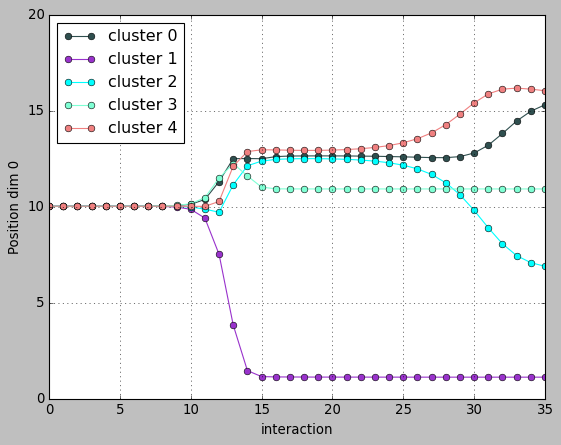

In [46]:
cluster = 0
dimension = 0
for cluster in range(n_clusters_extra):
    """for i in range(len(evolution)):
        print(evolution[i][cluster][dimension])"""

    def cluster_evol_1D(evolution_vec,cluster,dimension):    
        return [ evolution[i][cluster][dimension] for i in range(len(evolution))] 

    def cluster_evol_2D(evolution_vec,cluster,dimension):    
        return [ [evolution[i][cluster][0],evolution[i][cluster][1]] for i in range(len(evolution))] 


    cluster0_evol_1D = cluster_evol_1D(evolution,cluster,dimension)
    cluster0_evol_2D = cluster_evol_2D(evolution,cluster,dimension)

    #*******************************#    
    #*******************************#  


    plt.plot(cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster], marker='o') #..
plt.xlabel('interaction')
plt.ylabel('Position dim '+str(dimension))
plt.legend(loc=0)
plt.xlim(0,35)
plt.grid()
#plt.savefig("evol/evolution_1Dx_cluster"+str(cluster)+"_dim_"+str(dimension)+"_19:24.pdf")
#plt.savefig("evol/evolution_1Dx_cluster"+str(cluster)+str(cluster)+"_dim_"+str(dimension)+"_19:24.png")
plt.show()

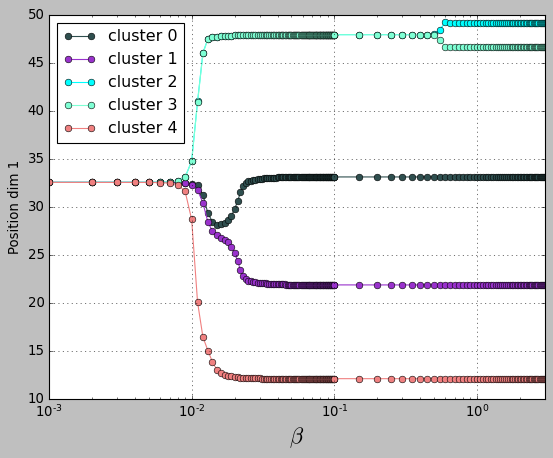

In [113]:
cluster = 0
dimension = 1
for cluster in range(n_clusters_extra):
    """for i in range(len(evolution)):
        print(evolution[i][cluster][dimension])"""

    def cluster_evol_1D(evolution_vec,cluster,dimension):    
        return [ evolution[i][cluster][dimension] for i in range(len(evolution))] 

    def cluster_evol_2D(evolution_vec,cluster,dimension):    
        return [ [evolution[i][cluster][0],evolution[i][cluster][1]] for i in range(len(evolution))] 


    cluster0_evol_1D = cluster_evol_1D(evolution,cluster,dimension)
    cluster0_evol_2D = cluster_evol_2D(evolution,cluster,dimension)

    #*******************************#    
    #*******************************#  


    plt.plot(beta_range,cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster], marker='o') #..
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('Position dim '+str(dimension))

plt.legend(loc=0)
plt.xlim(0.001,3)

plt.xscale('log')
plt.grid()
#plt.savefig("evol/beta_evolution_1Dx_cluster"+str(cluster)+"_dim_"+str(dimension)+"_19:24.pdf")
#plt.savefig("evol/beta_evolution_1Dx_cluster"+str(cluster)+str(cluster)+"_dim_"+str(dimension)+"_19:24.png")
plt.show()

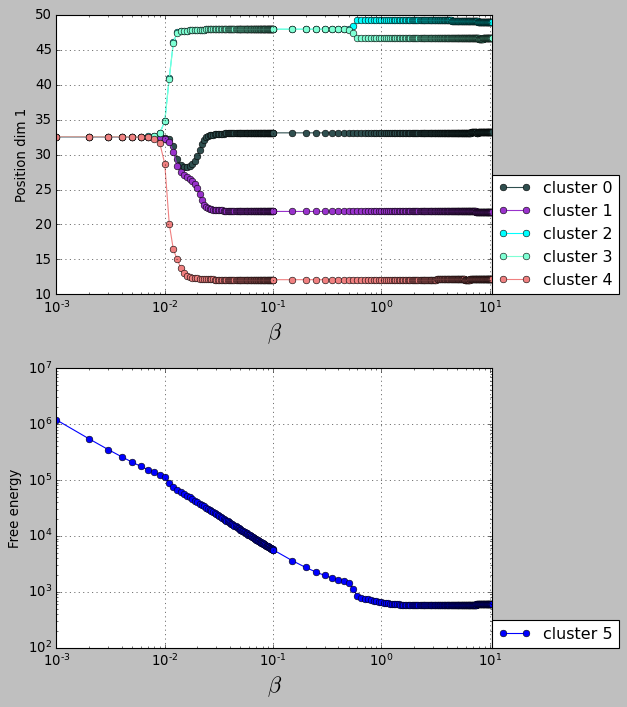

In [147]:
cluster = 0
dimension = 1
fig = plt.figure(figsize = (8, 9))
plt.subplot(2, 1, 1)

for cluster in range(n_clusters_extra):
    """for i in range(len(evolution)):
        print(evolution[i][cluster][dimension])"""

    def cluster_evol_1D(evolution_vec,cluster,dimension):    
        return [ evolution[i][cluster][dimension] for i in range(len(evolution))] 

    def cluster_evol_2D(evolution_vec,cluster,dimension):    
        return [ [evolution[i][cluster][0],evolution[i][cluster][1]] for i in range(len(evolution))] 


    cluster0_evol_1D = cluster_evol_1D(evolution,cluster,dimension)
    cluster0_evol_2D = cluster_evol_2D(evolution,cluster,dimension)

    #*******************************#    
    #*******************************#  

    plt.plot(beta_range,cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster], marker='o') #..

    #plt.plot(cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster], marker='o') #..
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('Position dim '+str(dimension))

plt.legend(loc=(1,0))
plt.xlim(0.001,10.500)
#plt.xlim(0.001,10.500)
#plt.xlim(1.,1.e3)
plt.xscale('log')
plt.grid()
"""plt.savefig("evol/beta_evolution_1Dx_cluster"+str(cluster)+"_dim_"+str(dimension)+"_19:24.pdf")
plt.savefig("evol/beta_evolution_1Dx_cluster"+str(cluster)+str(cluster)+"_dim_"+str(dimension)+"_19:24.png")
plt.show()"""


plt.subplot(2, 1, 2)


# Plotting first cluster axis 0

plt.plot(beta_range,Free_energy[1:],label="cluster "+str(n_clusters), marker='o')
#plt.plot(Free_energy[1:],label="cluster "+str(n_clusters), marker='o')
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('Free energy')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.001,10.500)
#plt.xlim(1.,1.e3)
plt.legend(loc=(1,0))
plt.grid()
plt.tight_layout()
"""plt.savefig("evol/beta_free_energy_loglog_19:24.pdf")"""
#plt.savefig("evol/beta_free_energy_config_loglog_19:24.pdf")
plt.show()   


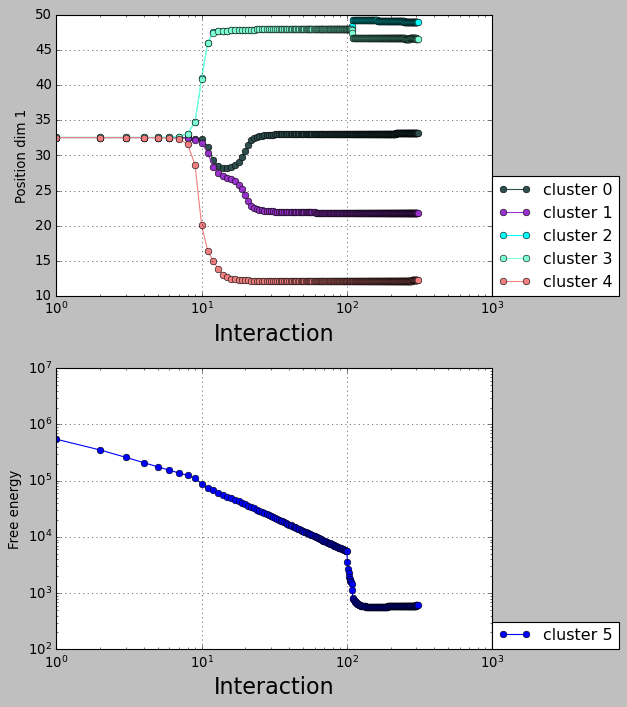

In [144]:
cluster = 0
dimension = 1
fig = plt.figure(figsize = (8, 9))
plt.subplot(2, 1, 1)

for cluster in range(n_clusters_extra):
    """for i in range(len(evolution)):
        print(evolution[i][cluster][dimension])"""

    def cluster_evol_1D(evolution_vec,cluster,dimension):    
        return [ evolution[i][cluster][dimension] for i in range(len(evolution))] 

    def cluster_evol_2D(evolution_vec,cluster,dimension):    
        return [ [evolution[i][cluster][0],evolution[i][cluster][1]] for i in range(len(evolution))] 


    cluster0_evol_1D = cluster_evol_1D(evolution,cluster,dimension)
    cluster0_evol_2D = cluster_evol_2D(evolution,cluster,dimension)

    #*******************************#    
    #*******************************#  

    #plt.plot(beta_range,cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster], marker='o') #..

    plt.plot(cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster], marker='o') #..
plt.xlabel(r'Interaction',fontsize=20)
plt.ylabel('Position dim '+str(dimension))

plt.legend(loc=(1,0))
#plt.xlim(0.001,10.500)
plt.xlim(1.,1.e3)
plt.xscale('log')
plt.grid()
"""plt.savefig("evol/beta_evolution_1Dx_cluster"+str(cluster)+"_dim_"+str(dimension)+"_19:24.pdf")
plt.savefig("evol/beta_evolution_1Dx_cluster"+str(cluster)+str(cluster)+"_dim_"+str(dimension)+"_19:24.png")
plt.show()"""


plt.subplot(2, 1, 2)


# Plotting first cluster axis 0

#plt.plot(beta_range,Free_energy[1:],label="cluster "+str(n_clusters), marker='o')
plt.plot(Free_energy[1:],label="cluster "+str(n_clusters), marker='o')
plt.xlabel(r'Interaction',fontsize=20)
plt.ylabel('Free energy')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(0.001,10.500)
plt.xlim(1.,1.e3)
plt.legend(loc=(1,0))
plt.grid()
plt.tight_layout()
"""plt.savefig("evol/beta_free_energy_monolog_19:24.pdf")"""
#plt.savefig("evol/beta_free_energy_config_monolog_19:24.pdf")
plt.show()   


In [94]:
1./lambda2[0],"beta",'{:.2e}'.format(1./lambda2[0]),covariance2[0]

(0.002504041765823916, 'beta', '2.50e-03', 199.67718063819228)

In [95]:
1./200

0.005

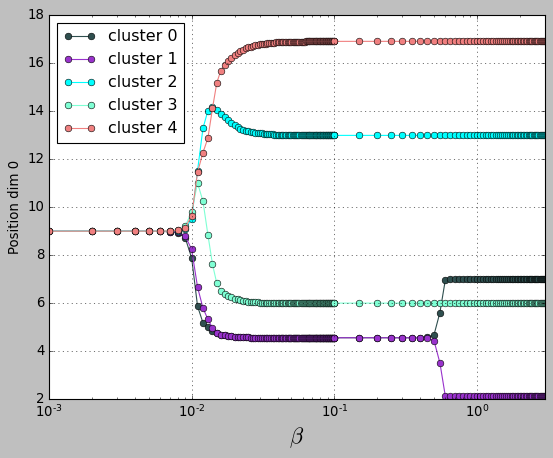

In [87]:
cluster = 0
dimension = 0
for cluster in range(n_clusters_extra):
    """for i in range(len(evolution)):
        print(evolution[i][cluster][dimension])"""

    def cluster_evol_1D(evolution_vec,cluster,dimension):    
        return [ evolution[i][cluster][dimension] for i in range(len(evolution))] 

    def cluster_evol_2D(evolution_vec,cluster,dimension):    
        return [ [evolution[i][cluster][0],evolution[i][cluster][1]] for i in range(len(evolution))] 


    cluster0_evol_1D = cluster_evol_1D(evolution,cluster,dimension)
    cluster0_evol_2D = cluster_evol_2D(evolution,cluster,dimension)

    #*******************************#    
    #*******************************#  


    plt.plot(beta_range,cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster], marker='o') #..
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('Position dim '+str(dimension))

plt.legend(loc=0)
plt.xlim(0.001,3)

plt.xscale('log')
plt.grid()
plt.savefig("evol/beta_evolution_1Dx_cluster"+str(cluster)+"_dim_"+str(dimension)+"_19:24.pdf")#..............
plt.savefig("evol/beta_evolution_1Dx_cluster"+str(cluster)+str(cluster)+"_dim_"+str(dimension)+"_19:24.png")#..............
plt.show()

---------------------------------------------------------------------

---------------------------------------------------------------------

### DA Covariance matrix <a class="anchor" id="det-annel-trial-12"></a>

---------------------------------------------------------------------

### Covariance matrix

In [31]:
#print ("c",c)
#print ("c.reshape((-1, 1))",c.reshape((-1, 1)))
#print ("np.matmul(c, c)",np.matmul(c, c))
#print ("np.matmul(c, c.T)",np.matmul(c, c.reshape((-1, 1))))
#print("************")
#print ("np.matmul(c, c)",np.matmul(c, c))
# do not work error print ("np.matmul(c.reshape((-1, 1)), c)",np.matmul(c.reshape((-1, 1)), c))
#np.matmul(c.reshape((-1, 1)), c)
#return
#return  -1.*(1./beta)*sum([np.log10(sum([beta*np.exp(-beta*squa_dist(x[k]-y[i])) for i in range (len(y))])) for k in range(len(x))]) #     ..........
#print ("c*c",c*c.reshape((-1, 1)))    <============  work  (x-y)(x-y).T

"""def Cov(x,y,beta,k): 
    
    c= x[j]-y[k] 
    
    return c*c.reshape((-1, 1))"""

from numpy import linalg as LA
def Cov(x,y,beta,k): 
    
    #c= x[j]-y[k] 
    #c_T=np.copy(c).reshape((-1, 1))
    #f_u(x,y,beta,i,k)
    
    covar = [ f_u(x,y,beta,k,j)*(x[j]-y[k])*(x[j]-y[k]).reshape((-1, 1))  for j in range(len(x))]    #..............
    soma = covar[0]
    for i in range(1,len(covar)):
        soma = soma + covar[i]
    value, vector = LA.eig(teste)    
    
    return   np.sort(value)[-1]      #c*c_T#x[j]-y[k]*(x[j]-y[k]).reshape((-1, 1))
# (x[j]-y[k])*(x[j]-y[k]).reshape((-1, 1))     



In [382]:
Teste = np.array([[0.05521232, 0.69726167],[0.69726167, 8.80553113]])
Teste1 = np.array([[[0.05521232, 0.69726167],[0.69726167, 8.80553113]],[[0.05521232, 0.69726167],[0.69726167, 8.80553113]],[[0.05521232, 0.69726167],[0.69726167, 8.80553113]]]) #.............
print(3*Teste)
print(Teste+Teste+Teste)

print("soma",soma)

[[ 0.16563696  2.09178501]
 [ 2.09178501 26.41659339]]
[[ 0.16563696  2.09178501]
 [ 2.09178501 26.41659339]]
soma [[ 0.16563696  2.09178501]
 [ 2.09178501 26.41659339]]


In [33]:
k=1
teste = Cov(x,y,beta,k)

#print(Cov(x,y,beta,k))
#print(3*Cov(x,y,beta,k))

In [47]:

a = [[2,1],[1,2]]
w, v = LA.eig(a)
value, vector = LA.eig(teste)


In [48]:
print("w",w)
print("np.sort(v)[-1]",np.sort(value)[-1])

w [3. 1.]
np.sort(v)[-1] 199.67718063819228


In [ ]:
[[5.30998505e-04 2.03740974e-02]
 [2.03740974e-02 7.81742020e-01]]
[[1.59299552e-03 6.11222921e-02]
 [6.11222921e-02 2.34522606e+00]]

In [358]:
(x[j]-y[k]).reshape((-1, 1))  

array([[0.0230434 ],
       [0.88416176]])

In [345]:
print(0.0230434 *0.0230434 ,"  ",  0.0230434 * 0.88416176)
print(0.88416176 *0.0230434 ,"  ",  0.88416176* 0.88416176)

0.0005309982835599999    0.020374093100384
0.020374093100384    0.7817420178462976


---------------------------------------------------------------------

---------------------------------------------------------------------

---------------------------------------------------------------------

---------------------------------------------------------------------

## END ??

In [ ]:
def f_u(x,y,beta,i,k):
    
    denom = sum([np.exp(-beta*squa_dist(x[k]-y[j])) for j in range(len(y))])
    num   = np.exp(-beta*squa_dist(x[k]-y[i]))
    #print (num)
    return num/denom

def f_v(x,y,beta,i_clusters):
    new_y = []
    for i in i_clusters:
        denom =  sum([f_u(x,y,beta,i,k)  for k in range(len(x)) ])
        num   =  np.sum([ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ], axis=0)
        
        new_y.append(num)
        
    print("beta",beta,new_y)
    #num   =  [ x[k]*f_u(x,y,beta,i,k)/denom  for k in range(len(x)) ]
    

    return new_y#num 
    #np.sum([[0, 1], [0, 5]], axis=0)

    
x = gaussian3    
y = mean_point_seed_2D(x)
y0 = np.copy(y)
print ("y",y)

y1= np.copy(y)
y2= np.copy(y)

beta=.1
evolution =[]

for beta in np.arange(0.01,20,0.6):
    
    y=f_v(x,y,beta,[0,1]) # f_v(x,y,beta,i_clusters)
    evolution.append(y)


---------------------------------------------------

---------------------------------------------------

---------------------------------------------------

---------------------------------------------------

In [ ]:
gauss_points = 200
gaussian1=np.random.normal(3, 1.5, size=(gauss_points, 2))

for i in range(len(gaussian1)):
    
    gaussian1[i]
    np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]], axis=0)



In [61]:
teste1,teste2 = 1,2

teste3, teste4 = 3,7

#or i range
teste1+=teste3
teste2+=teste4

print(teste1,teste2 )

4 9


In [511]:
def dot_help(x):
    return np.dot(x,x)    
    
def sum_k(x,y,x_index,beta):
    soma = sum([np.exp(-1.*beta*dot_help(x[x_index]-y[k])) for k in range(len(y))])
    #if soma < 1.e-200:soma =0.1;print("sum < 1.e-200")
    return soma

def sum_x_denominator(x,y,x_samples,j,beta):
    return sum([ np.exp(-1.*beta*dot_help(x[i]-y[j]))/sum_k(x,y,i,beta) for i in range(x_samples)])

def sum_x_numerator(x,y,x_samples,j,beta):
    return sum([x[i]*np.exp(-1.*beta*dot_help(x[i]-y[j]))/sum_k(x,y,i,beta) for i in range(x_samples)])

def y_plus_1(x,y,beta,x_samples,n_y_centroids):
    return  [ sum_x_numerator(x,y,len(x)-1,j,beta)/sum_x_denominator(x,y,len(x)-1,j,beta) for j in range(n_y_centroids)]

## Appendix

1. Numbered item
1. Numbered item

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

<a id="section_ID"></a> section

<ul>
<li>Fish</li>
<li>Eggs</li>
<li>Cheese</li>
</ul>

from https://stackoverflow.com/questions/35797582/list-numbering-jupyter-notebook-markdown

<ol>
  <p>This is some info.</p>
  <li>This is question one.</li>
  <p>This is more info.</p>
  <li>This is question two.</li>
</ol>

This is some info.
: 1\. This is question one.

This is more info.
: 2\. This is question two.

<dl>
<dt>This is some info.</dt>
<dd>1. This is question one.</dd>
<dt>This is more info.</dt>
<dd>2. This is question two.</dd>
</dl>

This is some info.

&nbsp; &nbsp; 1. This is question one.

This is more info.

&nbsp; &nbsp; 2. This is question two.

<p>This is some info.</p>
<p>&nbsp; &nbsp; 1. This is question one.</p>
<p>This is more info.</p>
<p>&nbsp; &nbsp; 2. This is question two.</p>

In [74]:
def visualize_cost_function(cost_function,):
    xpts = np.linspace(interval[0], interval[1], 1000)
    #test = lambda x: np.array(x)*.5 + .5
    #print (xpts, test(xpts))
    plt.xlabel('range')
    plt.ylabel('Cost function')
    plt.grid()
    plt.plot(xpts, cost_function(xpts))
    plt.show() 

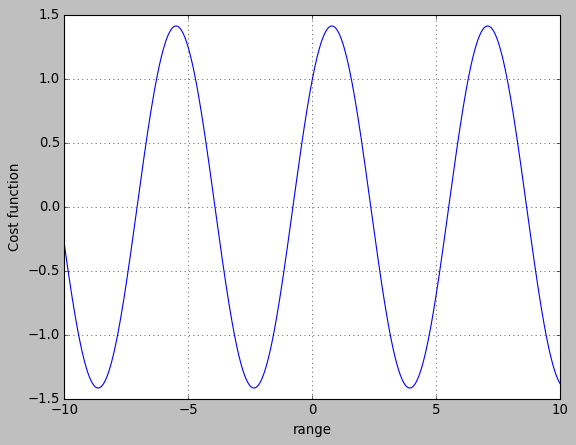

In [75]:
visualize_cost_function(lambda x: np.sin(x) + np.cos(x),)

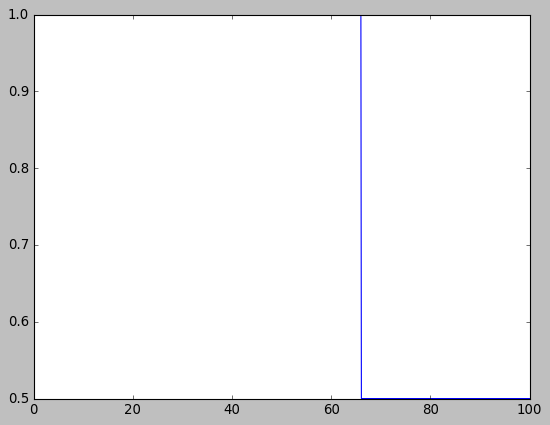

In [61]:
xpts = np.linspace(0, 100, 1000)
test = lambda x: (np.array(x) <= 66)*.5 + .5
#print (xpts, test(xpts))
plt.plot(xpts, test(xpts))
plt.show()

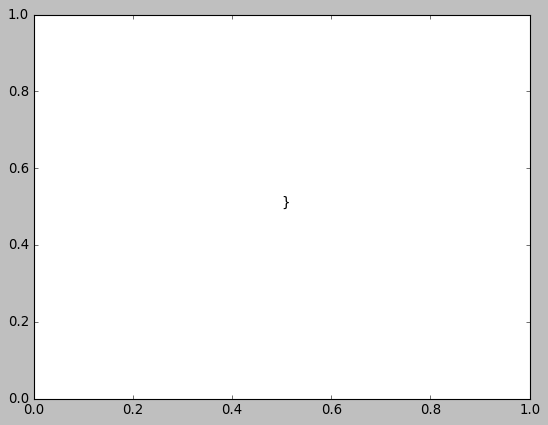

In [82]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
txt = ax.text(0.5,0.5,"}", clip_on=True)

#txt.set_clip_on(False)  # this will turn clipping off (always visible)
# txt.set_clip_on(True) # this will turn clipping on (only visible when text in data range)



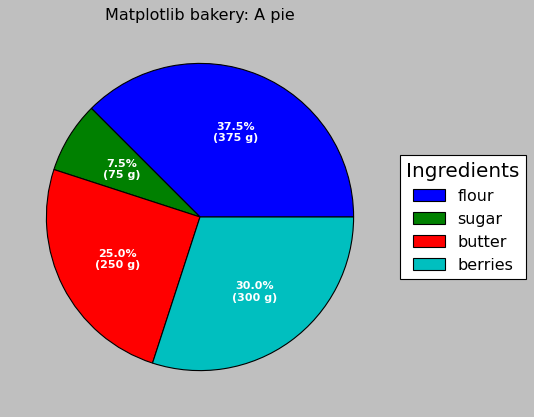

In [91]:
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Matplotlib bakery: A pie")
plt.savefig("pie.pdf")
plt.savefig("pie.png")

plt.show()


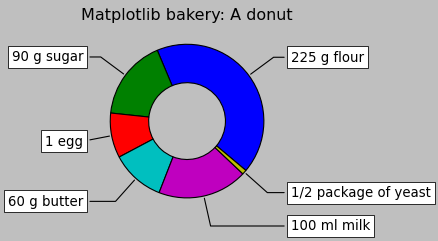

In [87]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")
plt.savefig("donut.pdf")
plt.savefig("donut.png")
plt.show()

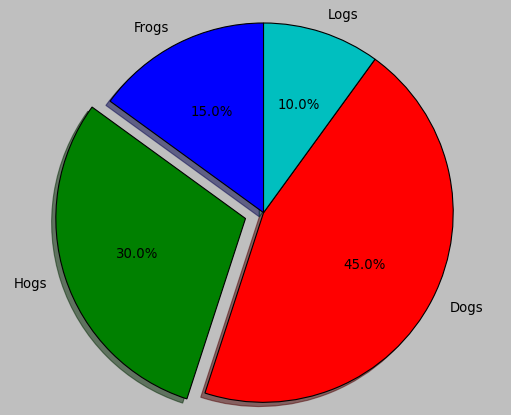

In [93]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("pie2.pdf")
plt.savefig("pie2.png")
plt.show()

In [ ]:
from pygooglechart import PieChart3D

def python_pie3D() :
  # initialize chart object, 250 x 250 pixels
  chart = PieChart3D(250, 250)

  # pass your data to the chart object
  chart.add_data([398, 294, 840, 462])

  # make labels for the slices
  chart.set_pie_labels("Lithuania Bulgaria Ukraine Romania".split())

  # render the image


from pychartdir import *

#Data
data = [50, 12, 3,35]

# Labels
labels = ["a", "b", "c", "d"]

# Set pixel
c= PieChart(500, 300)

# set center
c.setPieSize(250, 140, 100)

# Add title
c.addTitle("title")

# Draw
c.set3D()

# Set lebel
c.setData(data, labels)

# Explode all
c.setExplode()

# Output
c.makeChart("threedpie.png")



In [128]:
outro = create_1Dlist(len(x))
for i in range(len(x)):
    outro[i] = x[i]-y[0]

In [127]:
aux=1.0
for i in range(10):
    aux+=aux
    
print(aux)    

1024.0


In [233]:
def g(x):
    """a docstring"""
    return x**2

g(2)

4

In [96]:
um = [1 for i in range(4)]
#um = np.ones((4))
um = um*2
um

[1, 1, 1, 1, 1, 1, 1, 1]

```python
print "Hello World"
```

```javascript
console.log("Hello World")
```

| This | is   |
|------|------|
|   a  | table|

<img src="../images/python_logo.svg" />

## TOC:
* [First Bullet Header](#first-bullet)
* [Second Bullet Header](#second-bullet)

## First Bullet Header <a class="anchor" id="first-bullet"></a>

code blocks...

## Second Bullet Header <a class="anchor" id="second-bullet"></a>

code blocks...

\begin{equation*}
\mathbf{r} \equiv \begin{bmatrix}
y \\
\theta
\end{bmatrix}
\label{eq:vector_ray} \tag{1}
\end{equation*}

Vector **r** is defined by equation $\eqref{eq:vector_ray}$

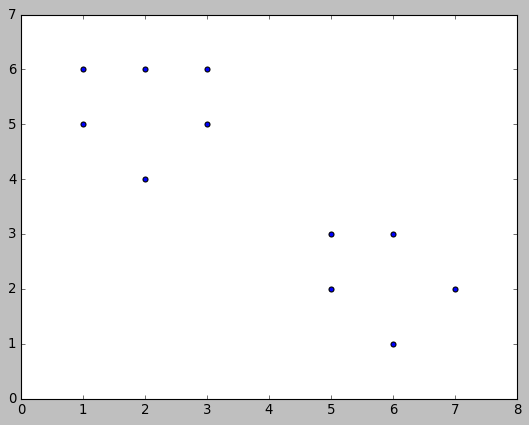

In [429]:
# from https://github.com/niruhan/k-means-clustering
dataPoints = [[6,1],[5,2],[5,3],[6,3],[7,2],[2,4],[1,5],[1,6],[2,6],[3,5],[3,6]]

x_dataPoints = [dataPoints[i][0] for i in range(len(dataPoints))]
y_dataPoints = [dataPoints[i][1] for i in range(len(dataPoints))]

plt.scatter(x_dataPoints, y_dataPoints)
plt.show()

In [427]:
dataPoints[0][1]

1

In [425]:
dataPoints[0]

x_dataPoints = [dataPoints[i][0] for i in range(len(dataPoints))]
y_dataPoints = [dataPoints[i][1] for i in range(len(dataPoints))]


[6, 1]

In [ ]:
# from https://github.com/niruhan/k-means-clustering
dataPoints = [[6,1],[5,2],[5,3],[6,3],[7,2],[2,4],[1,5],[1,6],[2,6],[3,5],[3,6]]
x_dataPoints = [dataPoints[i][0] for i in range(len(dataPoints))];y_dataPoints = [dataPoints[i][1] for i in range(len(dataPoints))]

In [553]:
%pwd

'/home/antonio/Documents/programing/python/Annealing/ex1_working'

$$\beta =\frac{1}{T}. $$

In [304]:
def dot_help(x):
    return np.dot(x,x)
 
def sum_k(x,y,x_index,beta):
    soma = sum([np.exp(-1.*beta*dot_help(x[x_index]-y[k])) for k in range(len(y))])
    #if soma < 1.e-200:soma =0.1;print("sum < 1.e-200")
    return soma

def sum_x_denominator(x,y,x_samples,j,beta):
    return sum([ np.exp(-1.*beta*dot_help(x[i]-y[j]))/sum_k(x,y,i,beta) for i in range(x_samples)])

def sum_x_numerator(x,y,x_samples,j,beta):
    return sum([x[i]*np.exp(-1.*beta*dot_help(x[i]-y[j]))/sum_k(x,y,i,beta) for i in range(x_samples)])

def y_plus_1(x,y,beta,x_samples,n_y_centroids):
    return  [ sum_x_numerator(x,y,len(x)-1,j,beta)/sum_x_denominator(x,y,len(x)-1,j,beta) for j in range(n_y_centroids)]

<IPython.core.display.Javascript object>


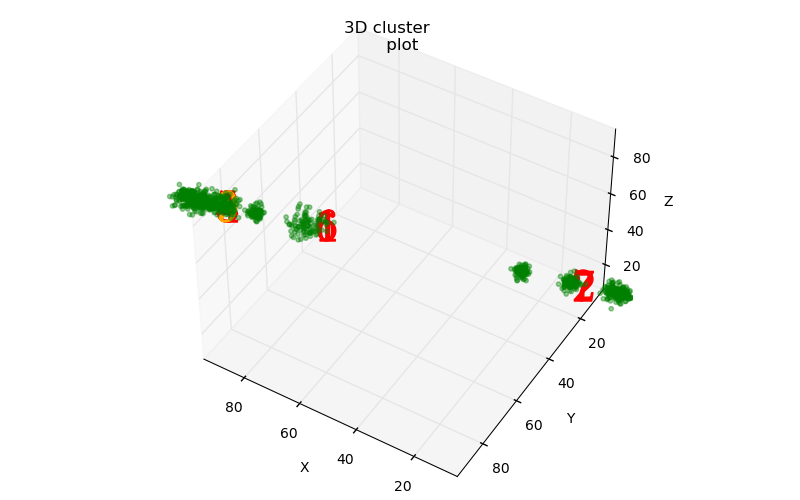

In [114]:
# Import libraries
from mpl_toolkits import mplot3d  

%matplotlib notebook 
#https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph/47311878

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")
 
# Creating plot

size_marker = 500
ax.scatter3D(y1[0], y1[1], y1[2],s=size_marker , marker='$1$',color = "red",label="centroids final 1",zorder=10)
ax.scatter3D(y2[0], y2[1], y2[2],s=size_marker, marker='$2$',color = "red",label="centroids final 2",zorder=10)
ax.scatter3D(y3[0], y3[1], y3[2],s=size_marker, marker='$3$' ,color = "red",label="centroids final 1",zorder=10)
ax.scatter3D(y4[0], y4[1], y4[2],s=size_marker, marker='$4$',color = "red",label="centroids final 2",zorder=10)
ax.scatter3D(y5[0], y5[1], y5[2],s=size_marker, marker='$5$',color = "red",label="centroids final 2",zorder=10)

ax.scatter3D(y6[0], y6[1], y6[2],s=size_marker , marker='$6$',color = "red",label="centroids final 1",zorder=10)
ax.scatter3D(y7[0], y7[1], y7[2],s=size_marker, marker='$7$',color = "red",label="centroids final 2",zorder=10)
ax.scatter3D(y8[0], y8[1], y8[2],s=size_marker, marker='$8$' ,color = "red",label="centroids final 1",zorder=10)
ax.scatter3D(y9[0], y9[1], y9[2],s=size_marker, marker='$9$',color = "orange",label="centroids final 2",zorder=10)
#x.scatter3D(y5[0], y5[1], y5[2],s=400, marker='$5$',color = "red",label="centroids final 2",zorder=10)


ax.scatter3D(gaussian3_x, gaussian3_y, gaussian3_z,s=10, color = "green",label="Data",zorder=1,alpha=.4)

plt.title("3D cluster     \n plot")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z') 

# The fix
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
ax.view_init(elev=25., azim=105)

if False:
    ax.legend(loc="best")
    
plt.savefig("DA_3D_v1.pdf")
plt.savefig("DA_3D_v1.png") 
# show plot
plt.show()


In [172]:
count =0 
cor = []
for name, hex in matplotlib.colors.cnames.items():
    #print(name)
    if count<10:
        cor.append(name)
        
    count = count +1    
print(cor)

(['aliceblue',
  'antiquewhite',
  'aqua',
  'aquamarine',
  'azure',
  'beige',
  'bisque',
  'black',
  'blanchedalmond',
  'blue'],
 10)

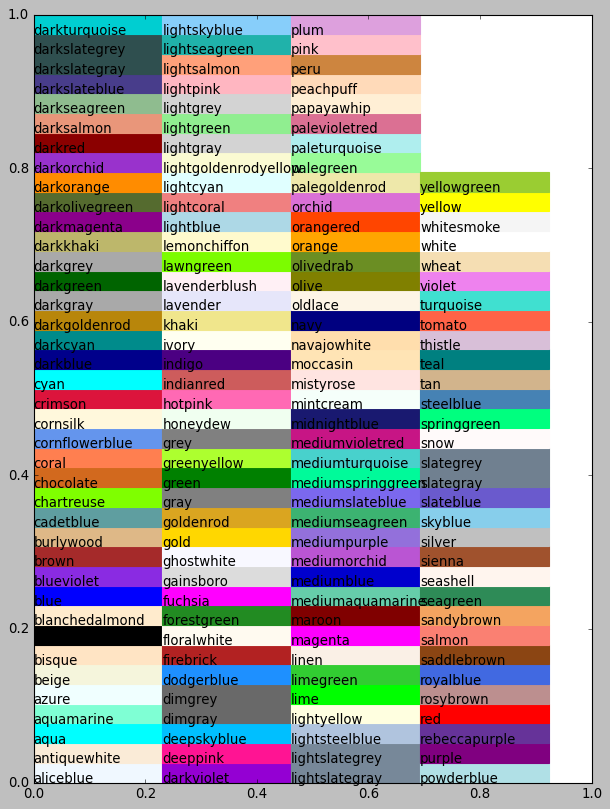

In [243]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import math


fig = plt.figure(figsize=(9,12))
ax = fig.add_subplot(111)

ratio = 1.0 / 3.0
count = math.ceil(math.sqrt(len(colors.cnames)))
x_count = count * ratio
y_count = count / ratio
x = 0
y = 0
w = 1 / x_count
h = 1 / y_count

for c in colors.cnames:
    pos = (x / x_count, y / y_count)
    ax.add_patch(patches.Rectangle(pos, w, h, color=c))
    ax.annotate(c, xy=pos)
    if y >= y_count-1:
        x += 1
        y = 0
    else:
        y += 1
plt.savefig("colors.pdf")
plt.show()

In [260]:
a = np.array([[1, 0],
              [0, 1]])
b = np.array([1, 2])
np.matmul(a, b)

np.matmul(b, a)

array([1, 2])

In [261]:
a = np.array([[1, 0],
              [0, 1]])
b = np.array([1, 2])
np.matmul(a, b)

np.matmul(b, a)

array([1, 2])

In [264]:
a = np.array([[1, 2],
              [3, 1]])
b = np.array([1, 2])
print(np.matmul(a, b))

print(np.matmul(b, a))

[5 5]
[7 4]


In [266]:
a = np.array([[1, 2],
              [3, 1]])
b = np.array([1, 2])
print(np.matmul(a, b))

print(np.matmul(b, a))

[5 5]
[5 5]


In [305]:
a = np.array([[1, 2]])
b = np.array([3, 5])
print(np.matmul(a, b))
b_T= b.reshape((-1, 1)) #https://backtobazics.com/python/transposing-numpy-array/
print("b_t",b_T)
print("np.matmul(b_T, a)",np.matmul(b_T, a))


c=a-b
print("c",c)
print("np.matmul(b, c)",np.matmul(c, b))
print("np.matmul(b.T, c)",np.matmul(b.reshape((-1, 1)), c))
print("np.matmul(b, c.T)",np.matmul(b, c.reshape((-1, 1))))
print("np.matmul(c,b.T )",np.matmul(c,b.reshape((-1, 1))))

print("np.matmul(c, c.reshape((-1, 1)))",np.matmul(c, c.reshape((-1, 1))))
print("np.matmul(c.reshape((-1, 1)),c )",np.matmul(c.reshape((-1, 1)), c))

[13]
b_t [[3]
 [5]]
np.matmul(b_T, a) [[ 3  6]
 [ 5 10]]
c [[-2 -3]]
np.matmul(b, c) [-21]
np.matmul(b.T, c) [[ -6  -9]
 [-10 -15]]
np.matmul(b, c.T) [-21]
np.matmul(c,b.T ) [[-21]]
np.matmul(c, c.reshape((-1, 1))) [[13]]
np.matmul(c.reshape((-1, 1)),c ) [[4 6]
 [6 9]]


In [272]:
a = np.array([5,4])[np.newaxis]  #https://stackoverflow.com/questions/5954603/transposing-a-numpy-array
print(a)
print(a.T)

[[5 4]]
[[5]
 [4]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# To make things reproducible...
np.random.seed(1977)

fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

# And finally we get to plot things...
colors = ('Green', 'Red', 'Blue')
for ax, color in zip(axes, colors):
    data = np.random.random(1) * np.random.random(10)
    ax.plot(data, marker='o', linestyle='none', color=color)
    ax.set_ylabel('%s Thing' % color, color=color)
    ax.tick_params(axis='y', colors=color)
axes[0].set_xlabel('X-axis')


Text(0.5, 0, 'X-axis')

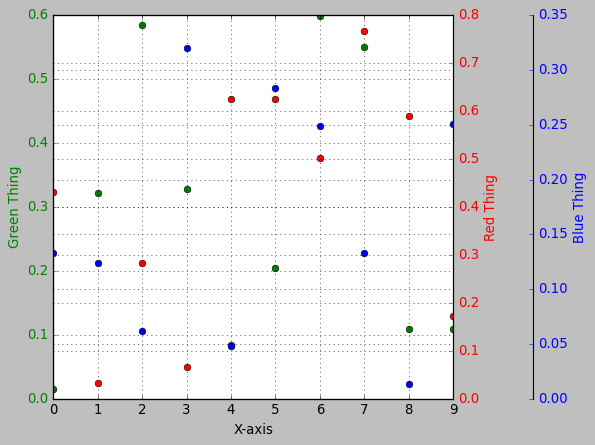

In [60]:
import matplotlib.pyplot as plt
import numpy as np
# To make things reproducible...
np.random.seed(1977)

fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)


# And finally we get to plot things...
colors = ('Green', 'Red', 'Blue')
count =0
for ax, color in zip(axes, colors):
    if count ==0:
        ax.plot(cluster0_evol_1D,label="cluster "+str(cluster),color=cor[cluster], marker='o') #..
    
    
    data = np.random.random(1) * np.random.random(10)
    ax.plot(data, marker='o', linestyle='none', color=color)
    ax.set_ylabel('%s Thing' % color, color=color)
    ax.tick_params(axis='y', colors=color)
    ax.grid(True)
    count = count +1
axes[0].set_xlabel('X-axis')

